In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.cm as cm
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

from IPython.core.pylabtools import figsize

import numpy.random as r
from pylab import *
from matplotlib.gridspec import GridSpec

import sys
sys.path.insert(0, '../../utils')
import splicing_utils as spu
import single_cell_plots as scp
from single_cell_plots import *

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.facecolor"] = 'white'

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams["mathtext.fontset"] = "stix"


In [2]:
%run -i 'load_data.py'

In [3]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

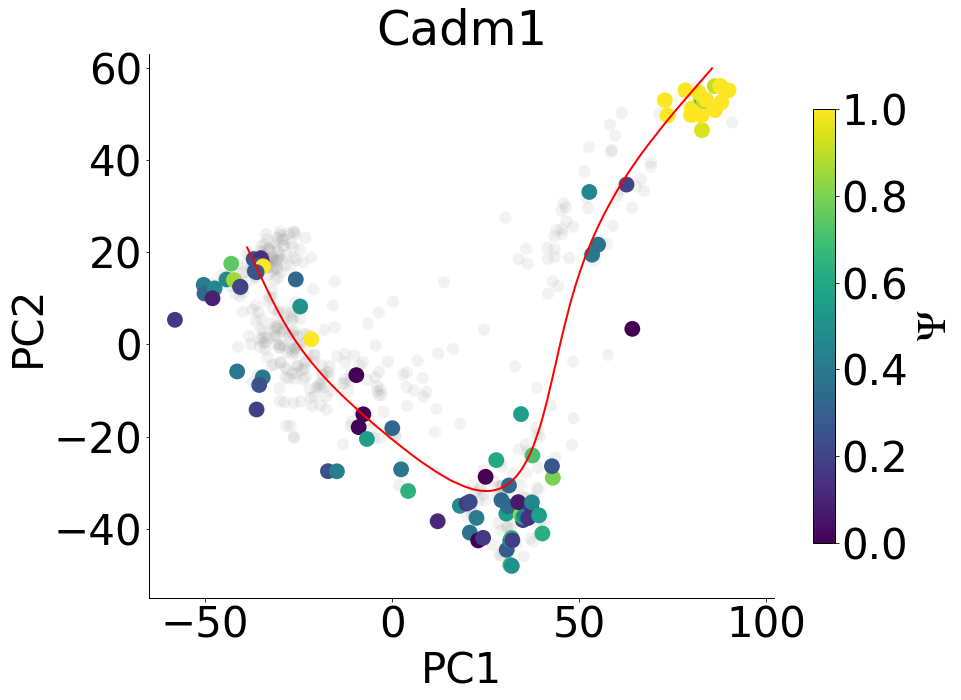

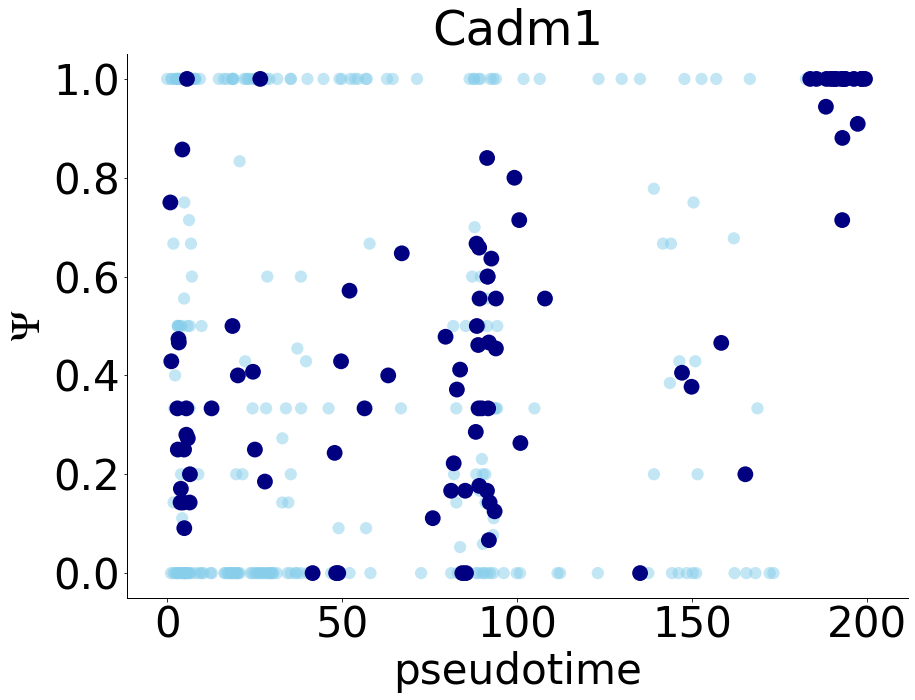

In [4]:
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
             'Cadm1_2', 10, plot_dir='plots_review/figure3/events/')
# scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
#              'Cadm1_2', 10, plot_dir='plots_review/figure3/events/', filter_cells=False)



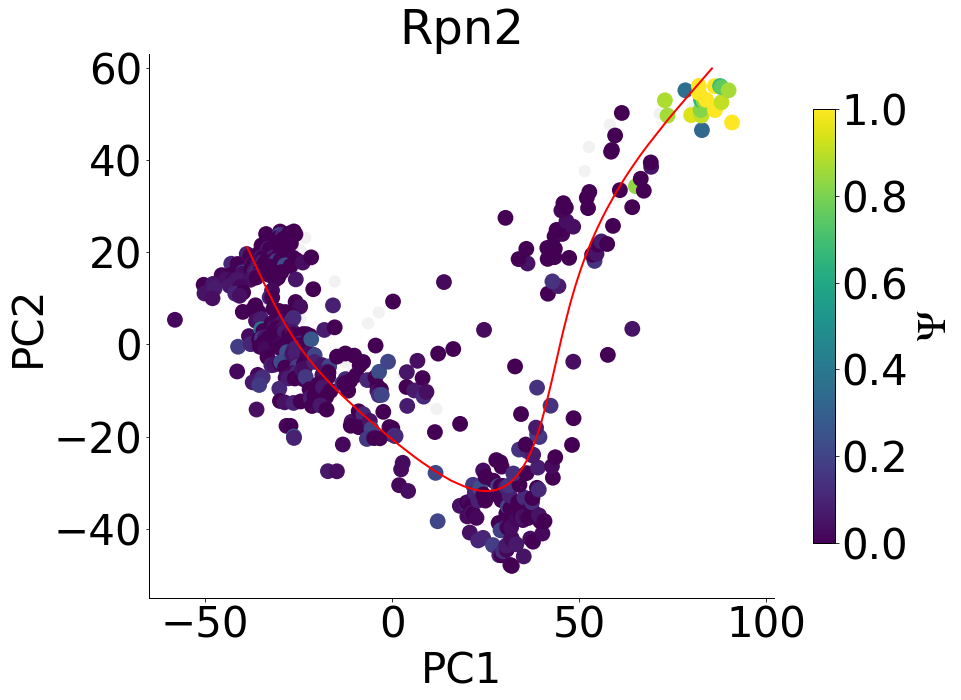

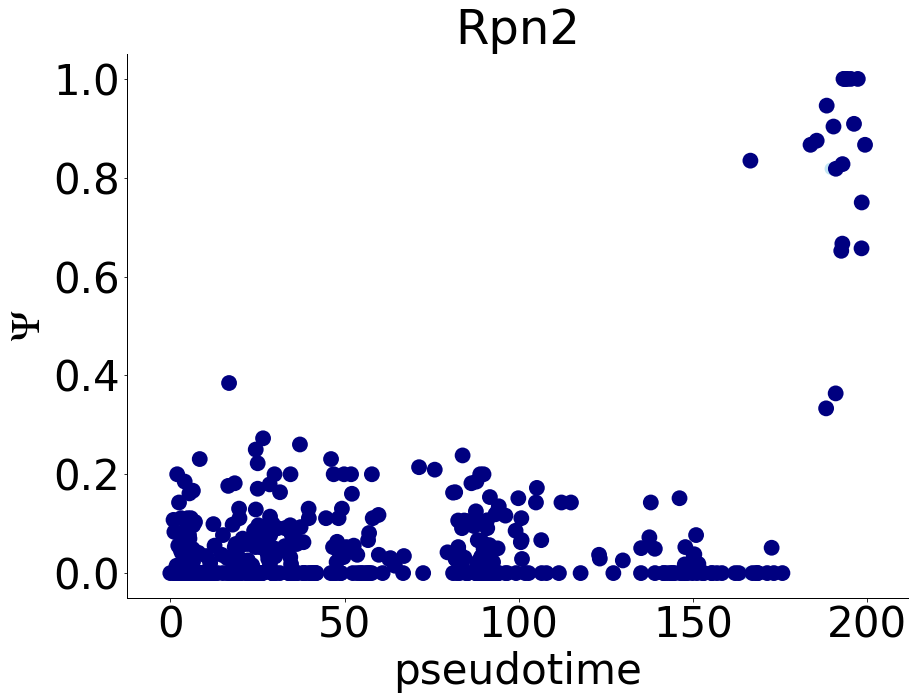

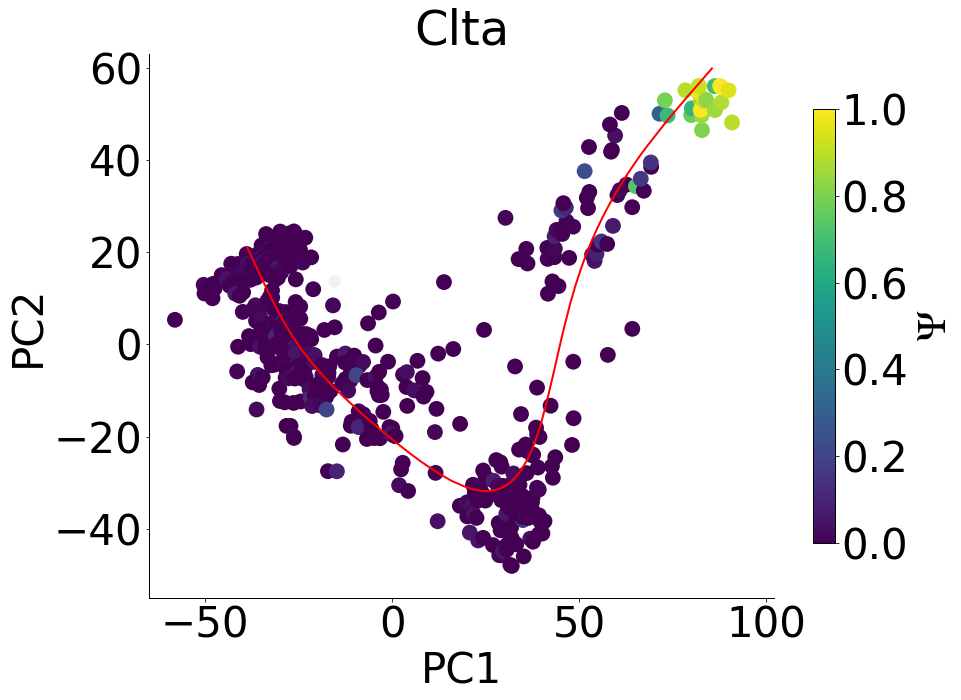

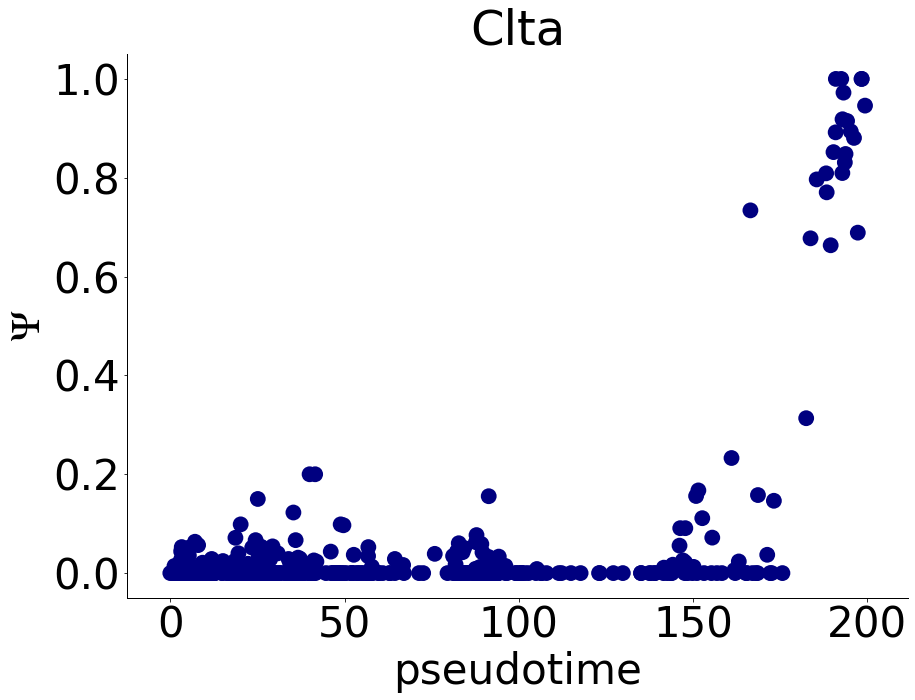

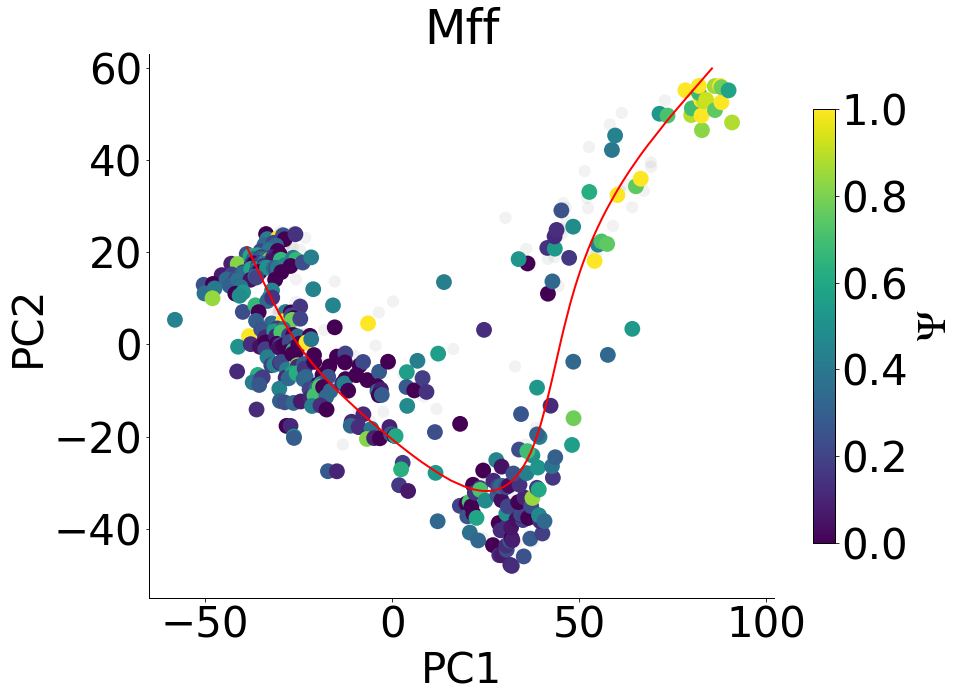

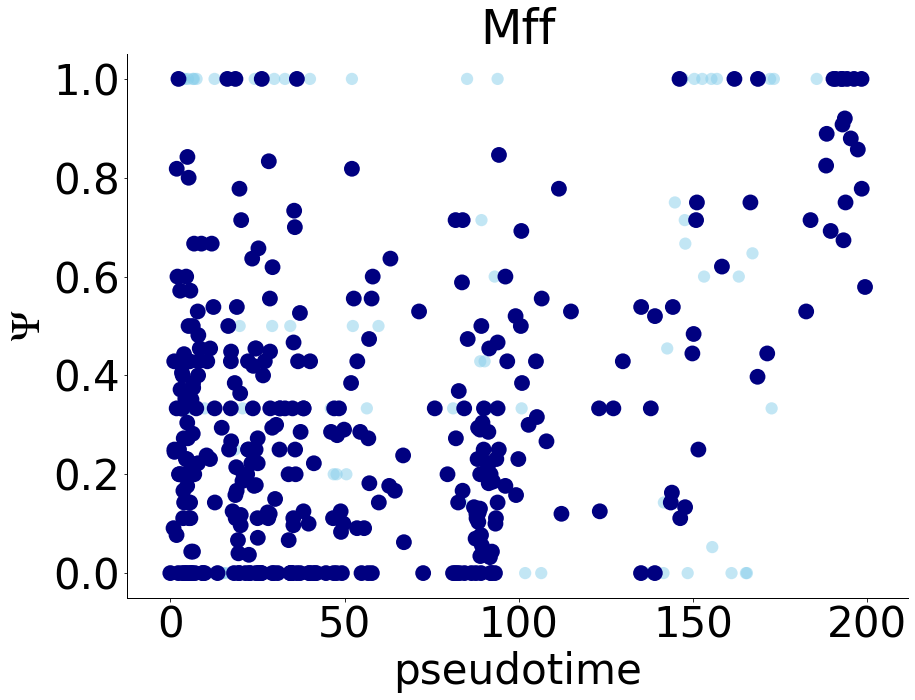

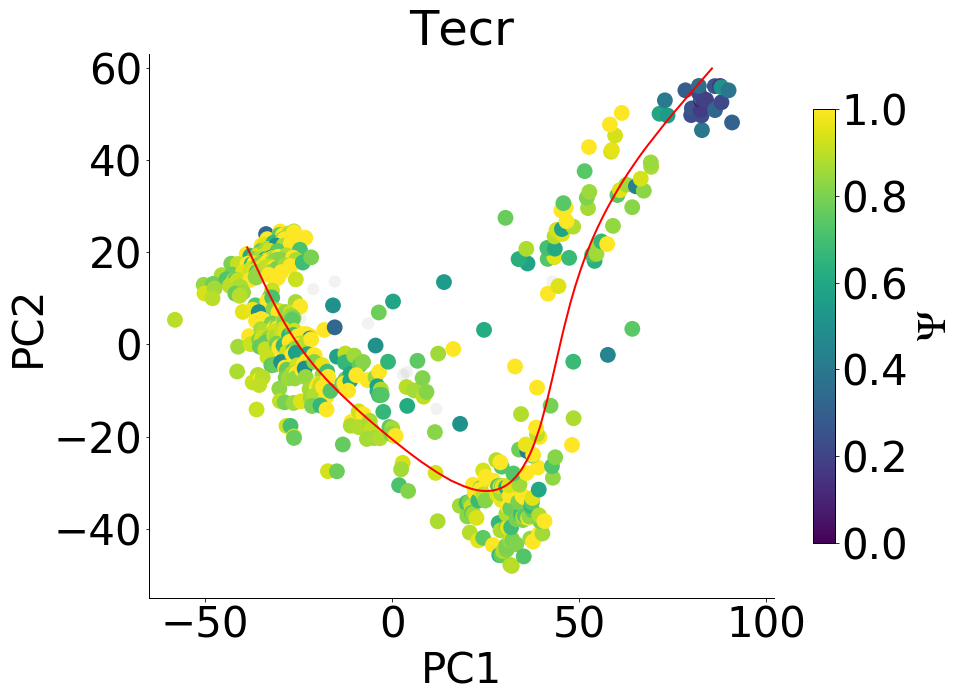

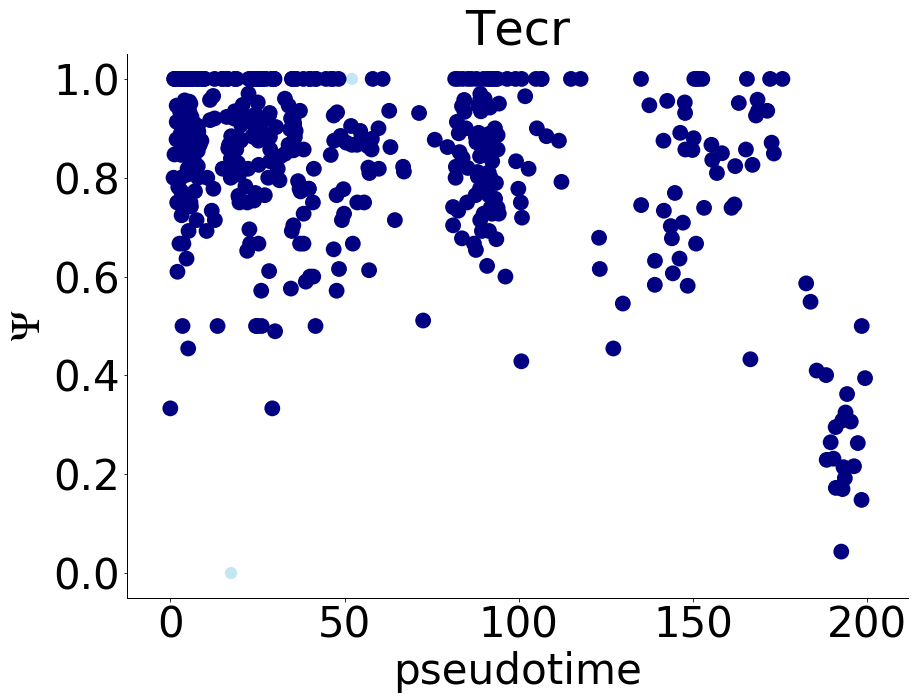

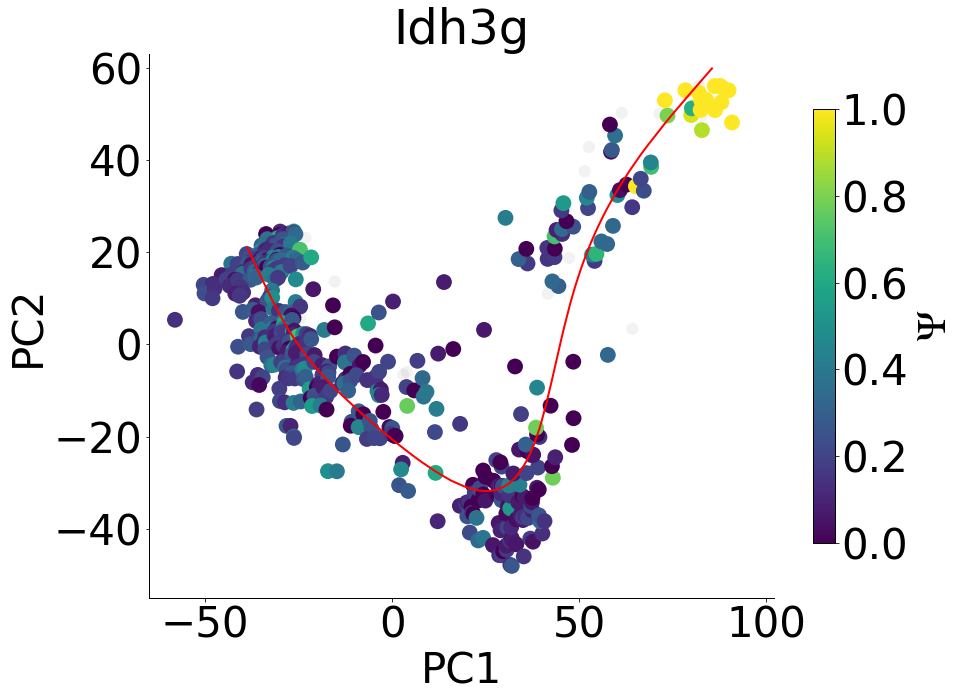

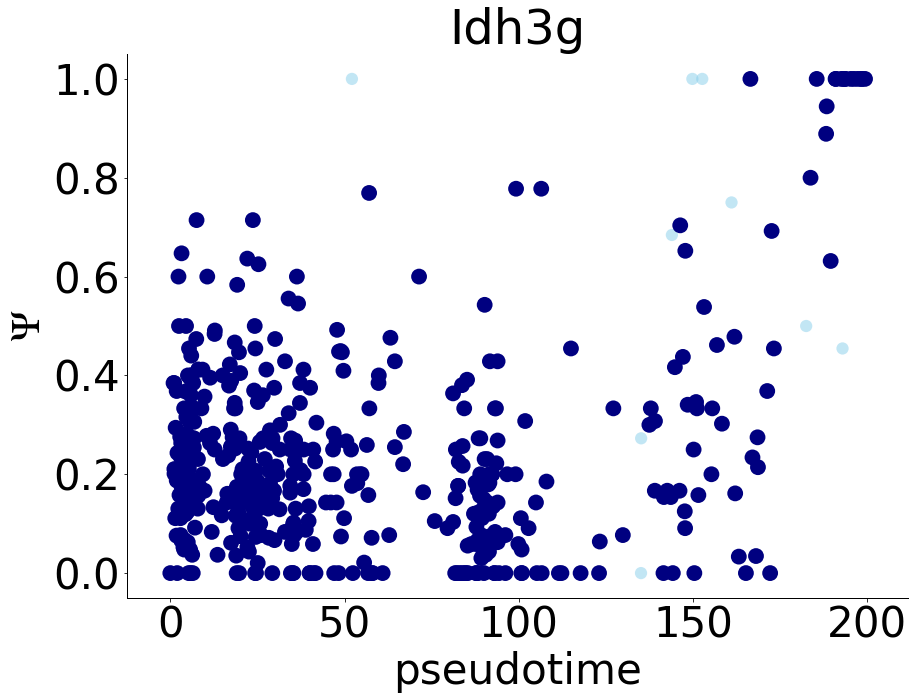

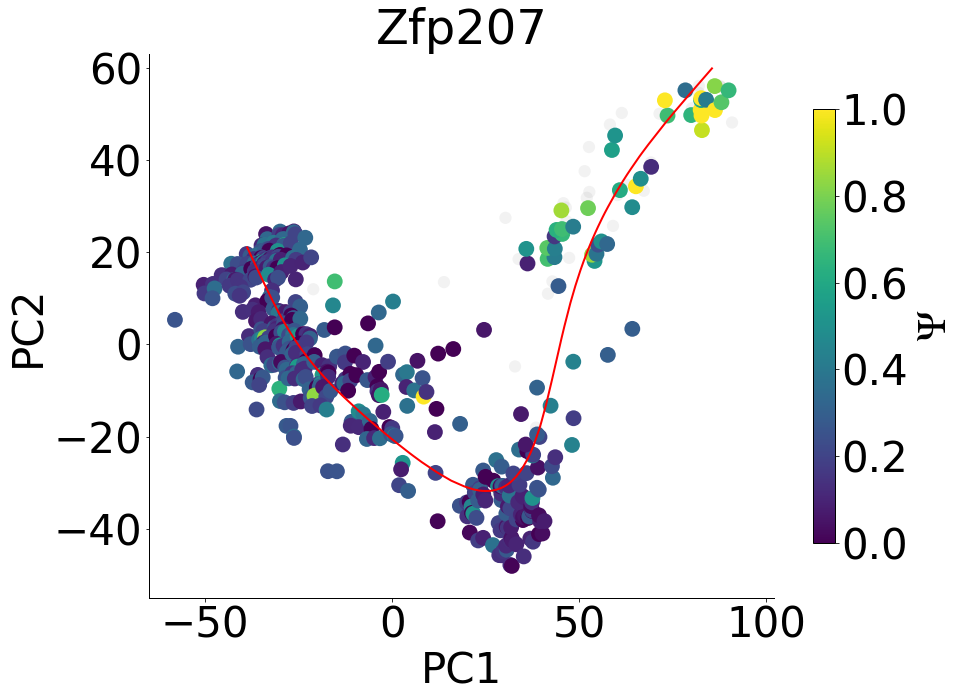

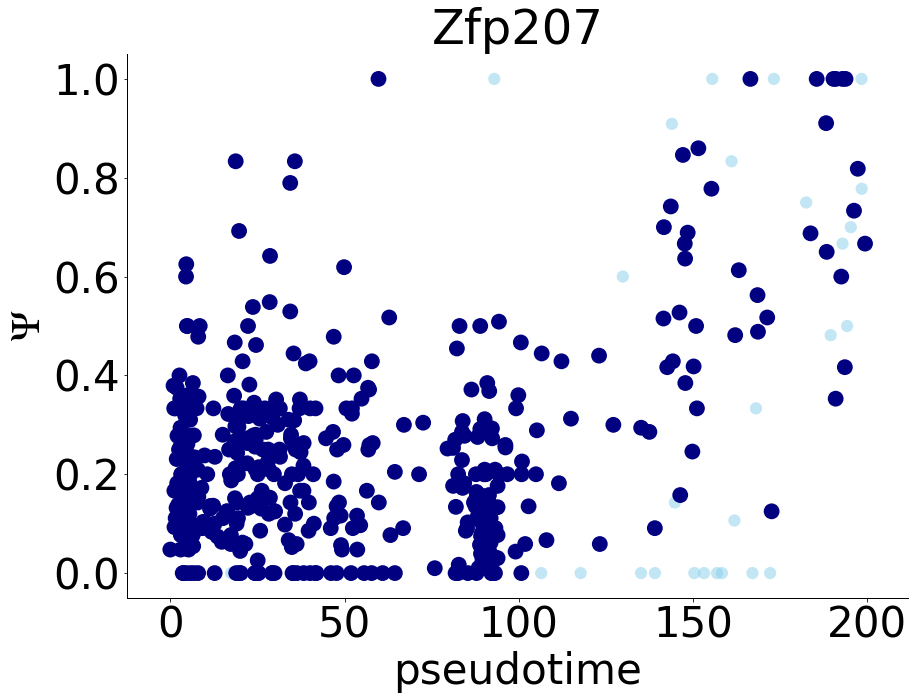

In [5]:
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
             'Rpn2_1', 10, plot_dir='plots_review/figure3/events/')
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
             'Clta_4', 10, plot_dir='plots_review/figure3/events/')
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
             'Mff_3', 10, plot_dir='plots_review/figure3/events/')
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
             'Tecr_4', 10, plot_dir='plots_review/figure3/events/')
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
             'Idh3g_1', 10, plot_dir='plots_review/figure3/events/')
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
             'Zfp207_1', 10, plot_dir='plots_review/figure3/events/')


In [6]:
from sklearn.decomposition import PCA
from scipy.stats import spearmanr
import rpy2
import rpy2.robjects.packages as rpackages
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri as rpyn
from statsmodels.stats.multitest import multipletests
dt = rpy2.robjects.packages.importr('diptest')

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


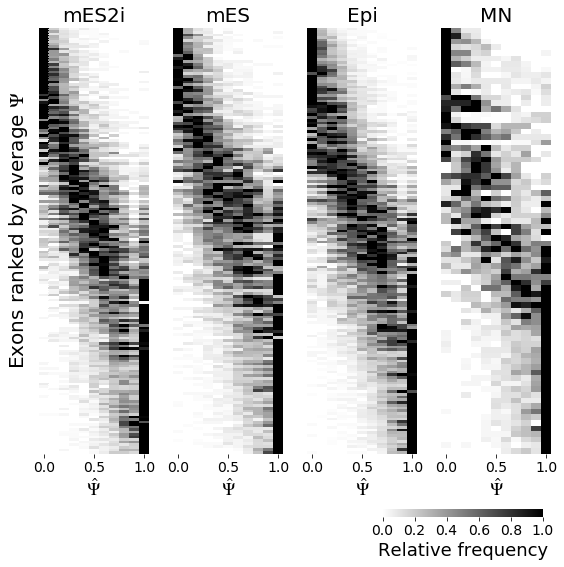

In [7]:
chen_ES2i_filtered = process_subpop(chen_ES2i, chen_PSI, chen_mrna_counts, 
                                    mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.1, 10)
chen_ES_filtered = process_subpop(chen_ES, chen_PSI, chen_mrna_counts, 
                                  mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.1, 10)
chen_Epi_filtered = process_subpop(chen_Epi, chen_PSI, chen_mrna_counts, 
                                   mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.1, 10)
chen_MN_filtered = process_subpop(chen_MN, chen_PSI, chen_mrna_counts, 
                                  mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.1, 10)

hist_list = [chen_ES2i_filtered[4], chen_ES_filtered[4], chen_Epi_filtered[4], chen_MN_filtered[4]]

dset_name_list = ['mES2i', 'mES', 'Epi', 'MN']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots_review/figure1/', plot_name = 'chen_filtered_distributions_cell_type',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20, nbins=11)

plt.show()

In [8]:
print(chen_ES2i_filtered[0].shape)
print(chen_ES_filtered[0].shape)
print(chen_Epi_filtered[0].shape)
print(chen_MN_filtered[0].shape)

(168, 111)
(145, 120)
(154, 183)
(76, 74)


In [9]:
len(set(list(chen_ES2i_filtered[0].index) + list(chen_ES_filtered[0].index) + list(chen_Epi_filtered[0].index) + list(chen_MN_filtered[0].index) ))

257

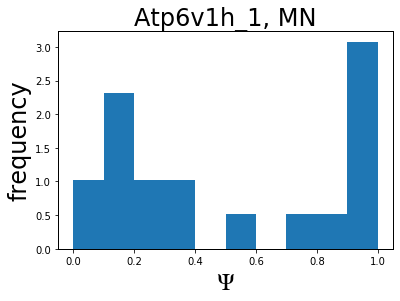

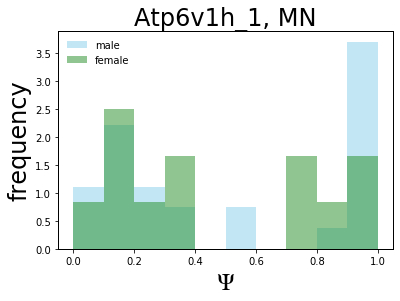

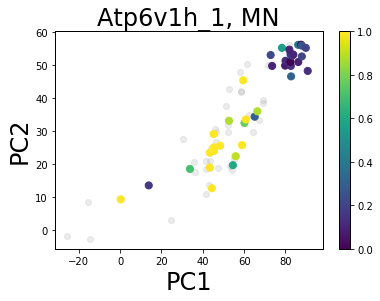

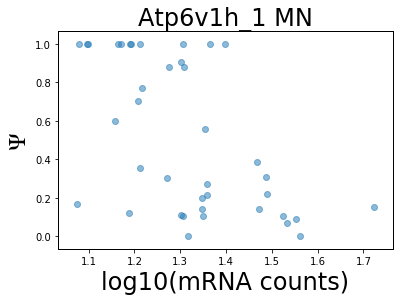

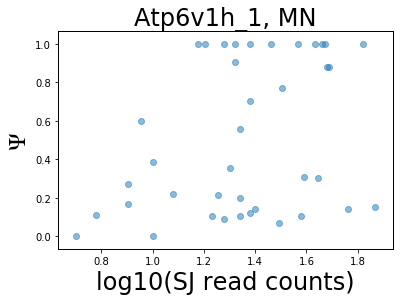

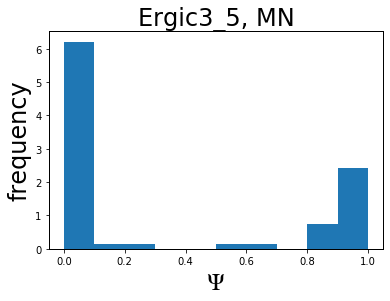

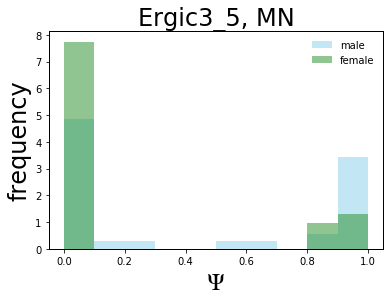

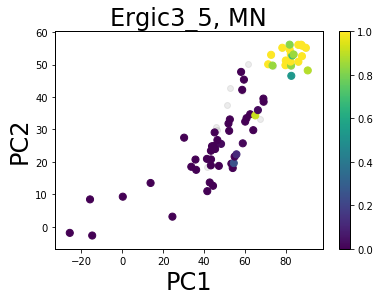

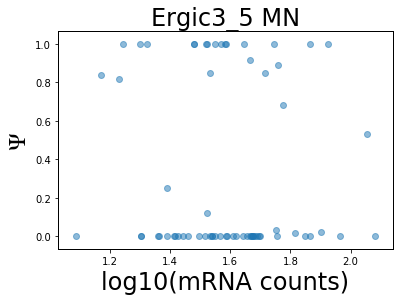

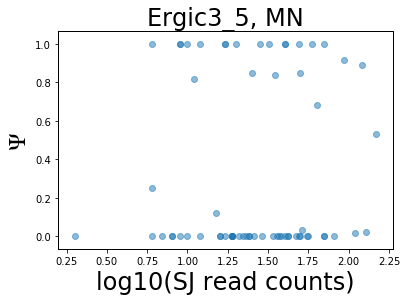

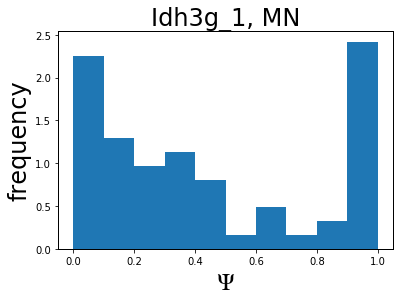

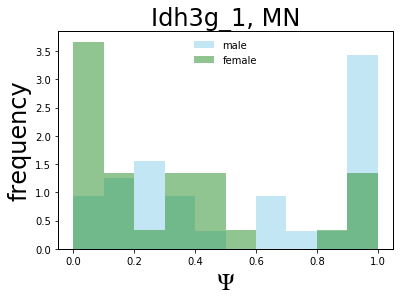

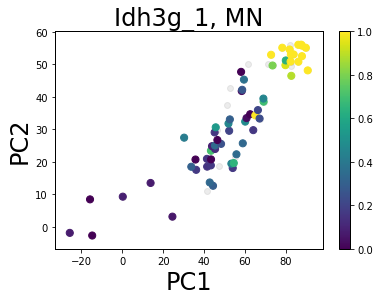

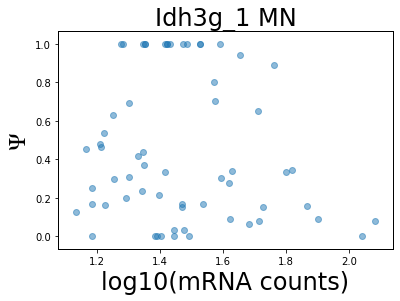

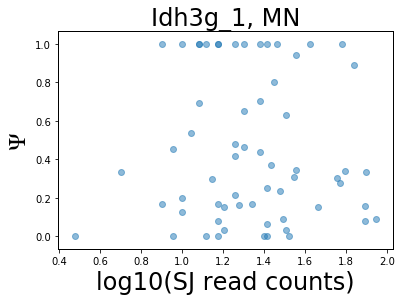

In [11]:
figsize(6, 4)
filtered_bimodal([chen_ES2i_filtered, chen_ES_filtered, chen_Epi_filtered, chen_MN_filtered], 
                 ['ES2i', 'ES', 'Epi', 'MN'], chen_pca, mrna_per_event_chen, 
                     chen_read_counts, quantile = 0.25, psi_lim = 0.25)

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return bound(*args, **kwds)


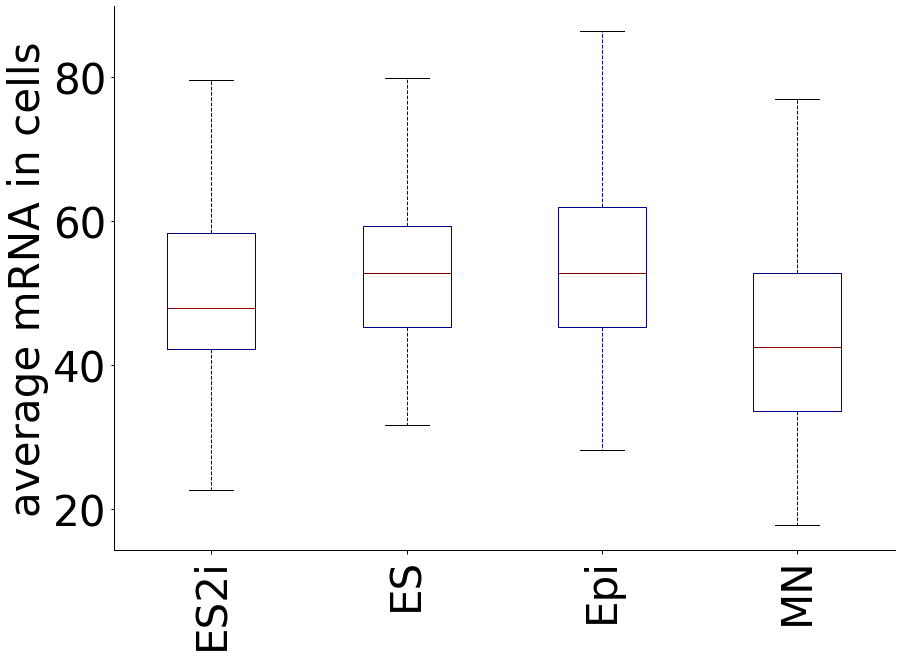

In [12]:


dset_names = ['ES2i', 'ES', 'Epi', 'MN']

scp.plot_boxplot([chen_ES2i_filtered[2].mean(),chen_ES_filtered[2].mean(), 
                  chen_Epi_filtered[2].mean(), chen_MN_filtered[2].mean()], 
                 'average mRNA in cells', dset_names, 
                 'chen_mean_mrna_cell_types',
                 xlocs = np.array([1, 2, 3, 4]), save_dir='plots_review/figure3/')

plt.show()

In [13]:
# figsize(4,3)
# hartigan_multiple_test([chen_ES2i_filtered, chen_ES_filtered, chen_Epi_filtered, chen_MN_filtered], 
#                  ['ES2i', 'ES', 'Epi', 'MN'], chen_pca, mrna_per_event_chen, 
#                      chen_read_counts, quantile = 0.25, psi_lim = 0.25)

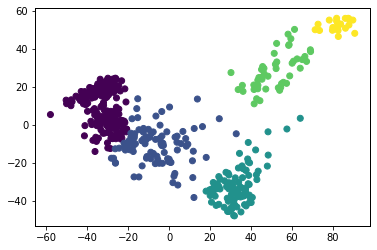

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


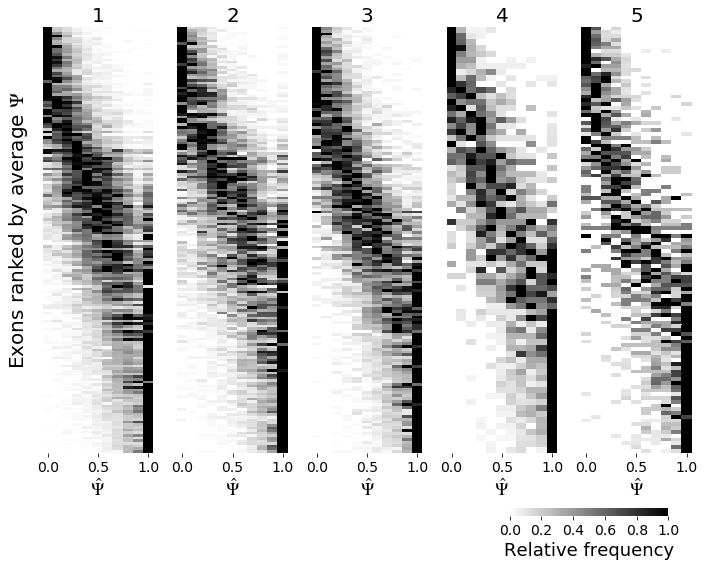

In [14]:
# from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=5)
ac_clusters = ac.fit_predict(chen_pca[['PC1', 'PC2']])

figsize(6,4)
plt.scatter(chen_pca.PC1, chen_pca.PC2, c=ac_clusters)
plt.show()

chen_pca_clust = chen_pca.copy()
chen_pca_clust['AC'] = ac_clusters

chen_clust_filter = []
for cluster in chen_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = chen_pca_clust.index[chen_pca_clust.AC == cluster]
    
    chen_filter = process_subpop(clust_subpop, chen_PSI, chen_mrna_counts, mrna_per_event_chen, 
                                 chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.1, 10, 0, cell_min=0.5)
    
    chen_clust_filter.append(chen_filter)
    
    
hist_list = [x[4] for x in chen_clust_filter]

dset_name_list = ['1', '2', '3', '4', '5']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots_review/figure3/', plot_name = 'chen_PSI_distributions_filtered_clusters',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20, nbins=11)

plt.show()

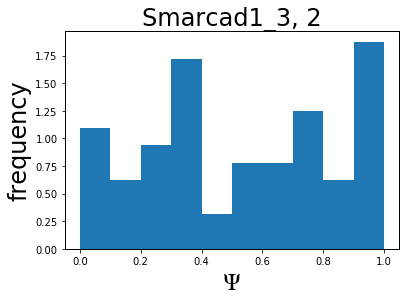

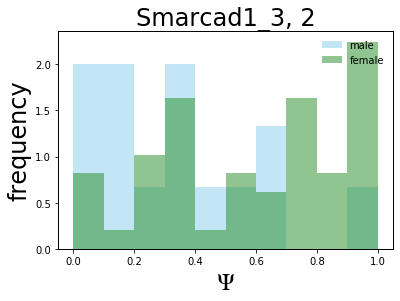

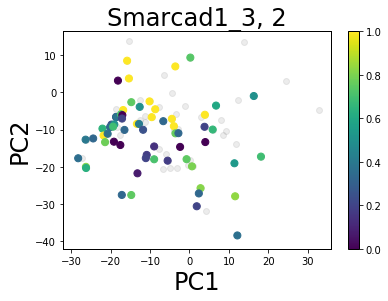

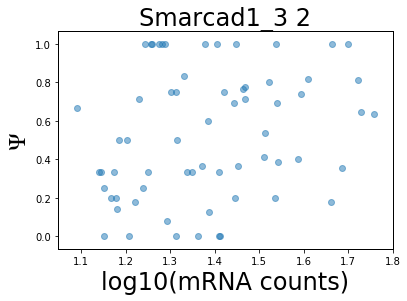

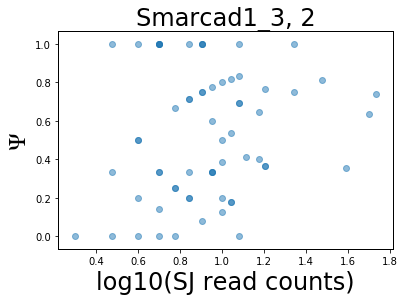

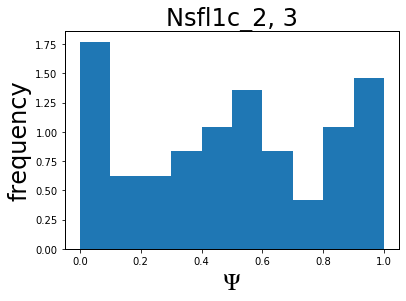

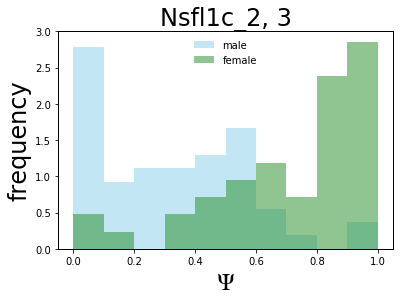

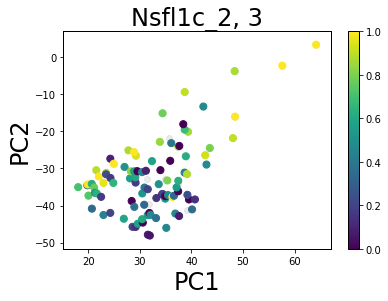

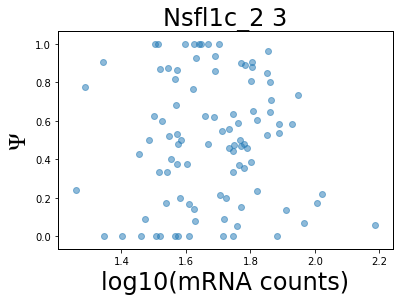

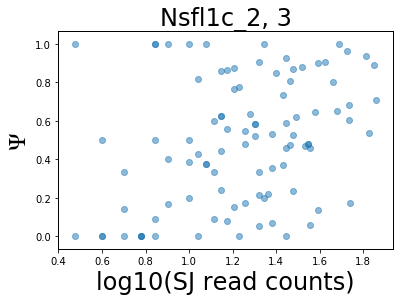

In [15]:
figsize(6, 4)
filtered_bimodal(chen_clust_filter, dset_name_list, chen_pca, mrna_per_event_chen, 
                     chen_read_counts, quantile = 0.25, psi_lim = 0.25)

In [16]:
[x[0].shape[0] for x in chen_clust_filter]

[160, 163, 146, 71, 113]

In [17]:
ex_list = []
for x in chen_clust_filter:
    ex_list.extend(list(x[0].index))
    
print(len(set(ex_list)))

319


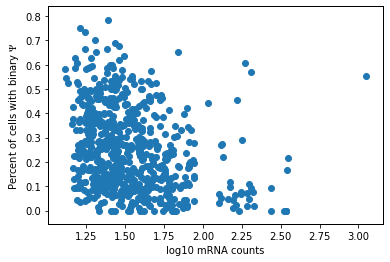

(-0.2956954662279252, 1.2111497560413672e-14)


In [18]:
x_axis = []
y_axis = []

for i in range(5):
    x_axis.extend(list(np.log10(chen_clust_filter[i][2].median(axis=1))))
    y_axis.extend((np.abs(0.5 - chen_clust_filter[i][0]) == 0.5).sum(axis=1) / ((~chen_clust_filter[i][0].isna()).sum(axis=1)))
    
    
figsize(6,4)
plt.scatter(x_axis,y_axis)
plt.xlabel('log10 mRNA counts')
plt.ylabel('Percent of cells with binary $\Psi$')
plt.show()

print(pearsonr(x_axis,y_axis))

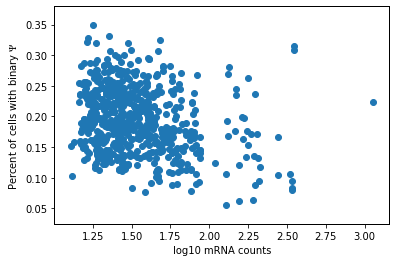

(-0.26247734253506705, 9.472966578426996e-12)


In [19]:
x_axis = []
y_axis = []

for i in range(5):
    x_axis.extend(list(np.log10(chen_clust_filter[i][2].median(axis=1))))
    y_axis.extend(list(chen_clust_filter[i][0].std(axis=1)))
    
    
figsize(6,4)
plt.scatter(x_axis,y_axis)
plt.xlabel('log10 mRNA counts')
plt.ylabel('Percent of cells with binary $\Psi$')
plt.show()

print(pearsonr(x_axis,y_axis))

In [20]:
chen_clust_filter[0][2].mean(axis=1)

0610010K14Rik_2     41.459905
0610010K14Rik_3     38.350338
0610010K14Rik_4     39.176456
0610010K14Rik_6     38.057577
1110038B12Rik_1     57.611036
2610318N02Rik_1     27.224195
Acly_1              24.737165
Alg13_10            48.174888
Alg3_5              18.247293
Alkbh7_1            22.205125
Anapc16_2           25.900150
Apobec3_2           23.658989
Atrx_4              34.097787
Atrx_5              37.581299
Bag6_1              20.859597
Bclaf1_3            17.253512
Cars_1              35.344516
Cdk11b_2            15.547149
Cdk2_1              21.331437
Cenpa_6             72.515763
Cenpa_nmdSE_1       72.515763
Chmp2a_1            43.137016
Chtop_2             29.535953
Clk1_1              28.000259
Csde1_6             34.101936
Csnk1a1_3           28.001666
Cuedc2_1            23.487622
Cuta_1              50.314205
Dnaja3_2            16.775088
Dph3_1              55.900565
                      ...    
Thyn1_1             29.199379
Timm9_2             24.252647
Tmem134_1 

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return bound(*args, **kwds)


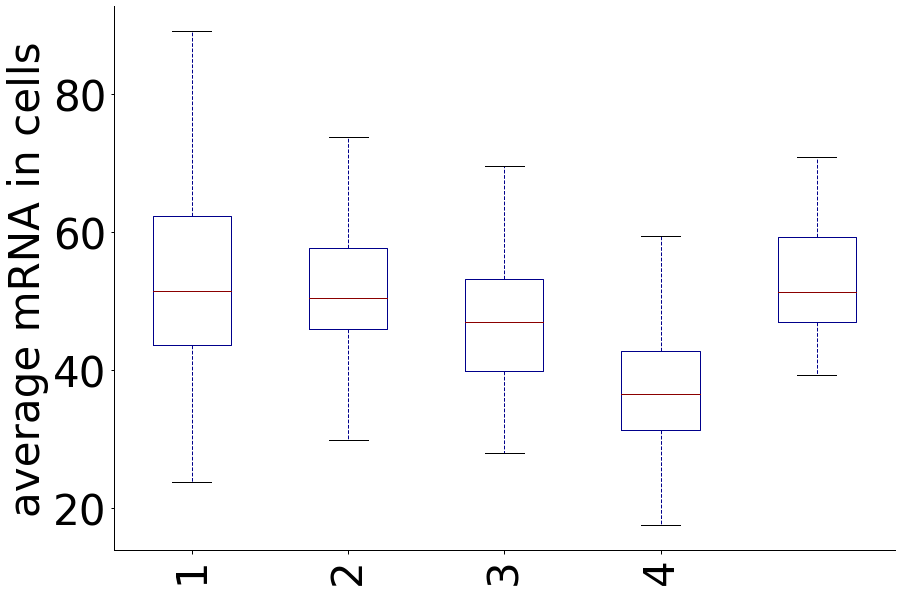

In [21]:
scp.plot_boxplot([x[2].mean() for x in chen_clust_filter], 
                 'average mRNA in cells', dset_name_list, 
                 'chen_mean_mrna_filtered_clusters',
                 xlocs = np.array([1, 2, 3, 4]), save_dir='plots_review/figure3/')

plt.show()

In [22]:
# figsize(6, 4)
# hartigan_multiple_test(chen_clust_filter, dset_name_list, chen_pca, mrna_per_event_chen, 
#                      chen_read_counts, quantile = 0.25, psi_lim = 0.25)

In [23]:
# chen_filtered = process_subpop(chen_PSI.columns, chen_PSI, chen_mrna_counts, 
#                                     mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.05, 10)

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


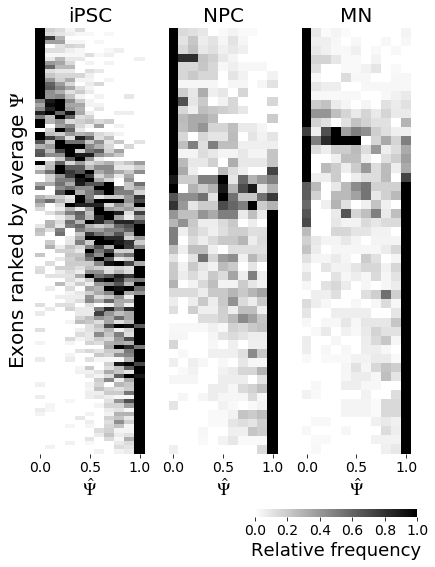

In [24]:
song_iPSC_filtered = process_subpop(song_iPSC, song_PSI, song_mrna_counts, 
                                    mrna_per_event_song, song_read_counts, song_coverage_tab['SJ_coverage'], 0.1, 10)
song_NPC_filtered = process_subpop(song_NPC, song_PSI, song_mrna_counts, 
                                  mrna_per_event_song, song_read_counts, song_coverage_tab['SJ_coverage'], 0.1, 10)
song_MN_filtered = process_subpop(song_MN, song_PSI, song_mrna_counts, 
                                  mrna_per_event_song, song_read_counts, song_coverage_tab['SJ_coverage'], 0.1, 10)

hist_list = [song_iPSC_filtered[4], song_NPC_filtered[4], song_MN_filtered[4]]

dset_name_list = ['iPSC', 'NPC', 'MN']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots_review/figure1/', plot_name = 'song_filtered_distributions_cell_type',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20, nbins=11)

plt.show()

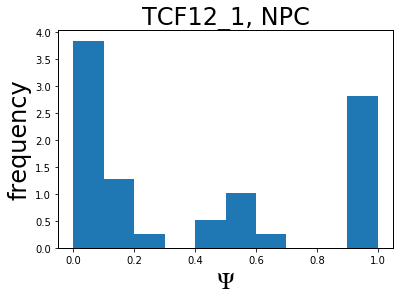

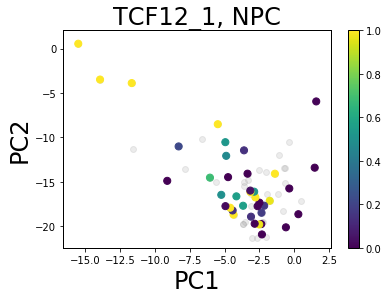

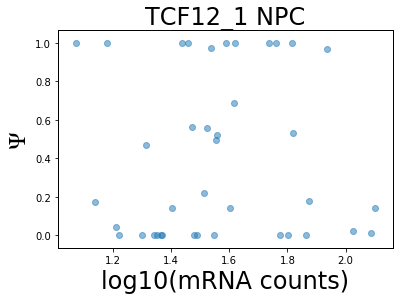

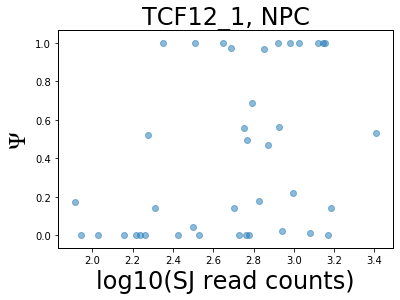

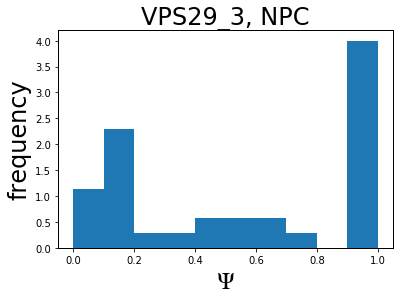

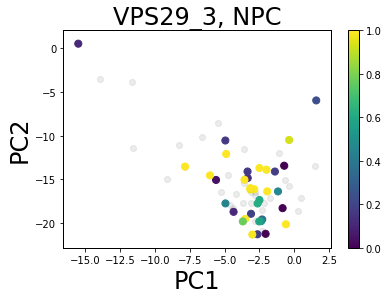

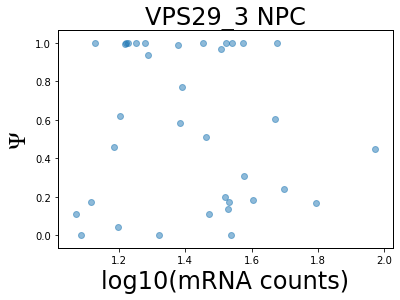

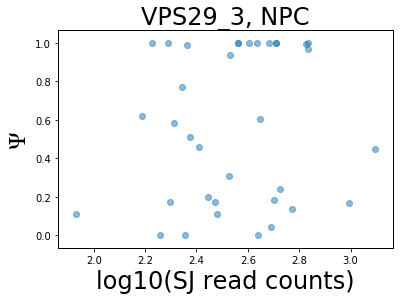

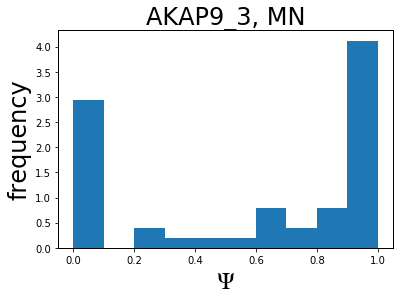

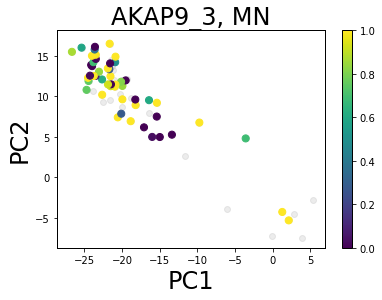

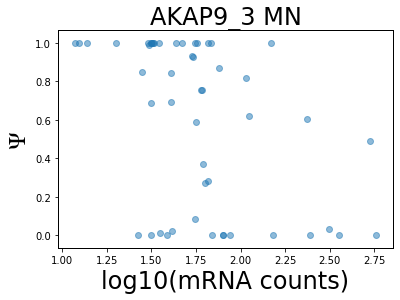

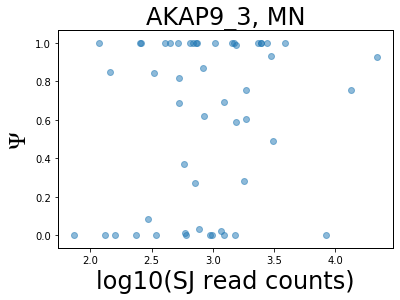

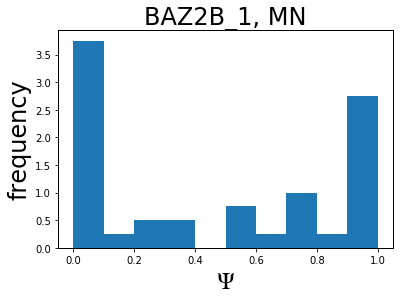

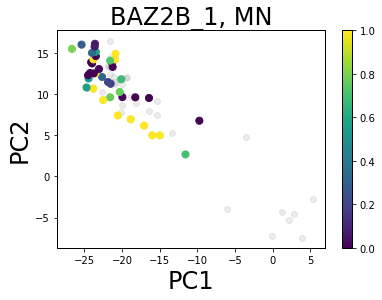

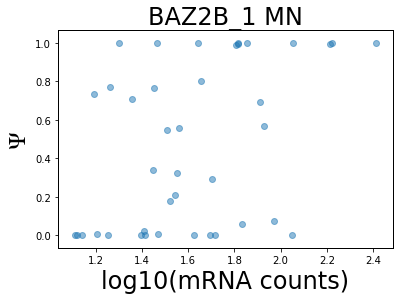

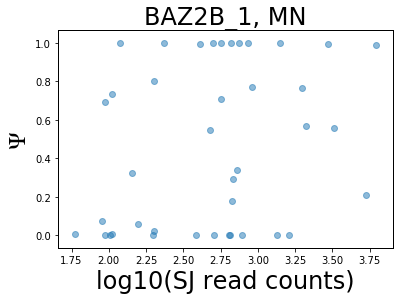

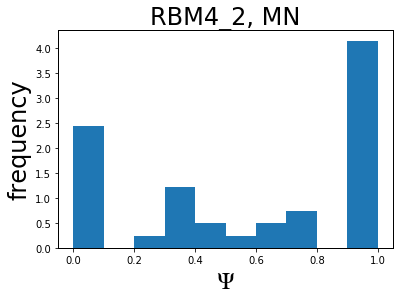

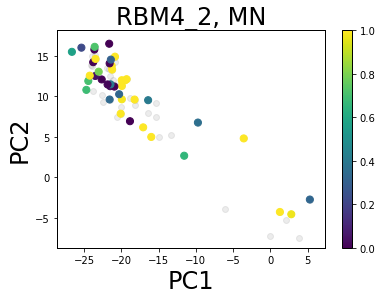

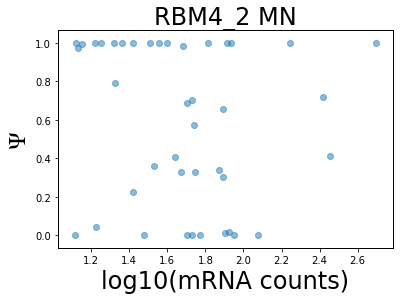

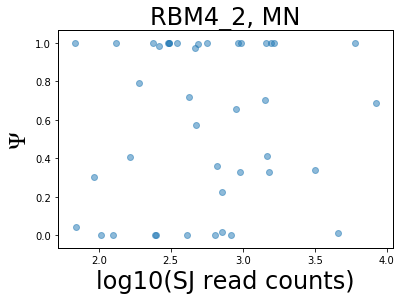

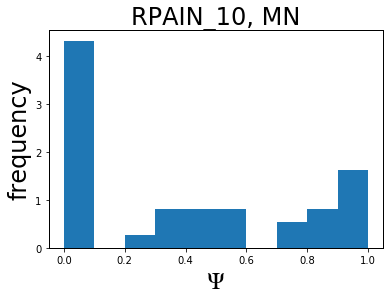

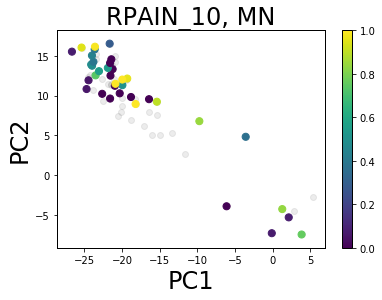

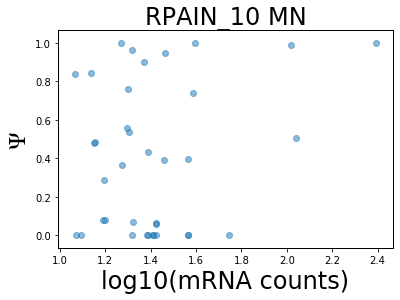

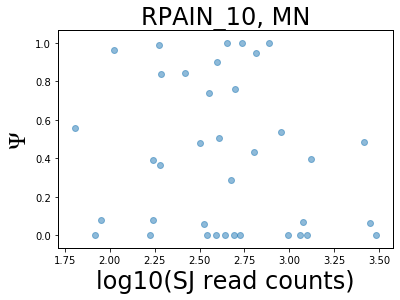

In [25]:
figsize(6, 4)
filtered_bimodal([song_iPSC_filtered, song_NPC_filtered, song_MN_filtered], 
                 ['iPSC', 'NPC', 'MN'], song_pca, mrna_per_event_song, 
                     song_read_counts, quantile = 0.25, psi_lim = 0.25)

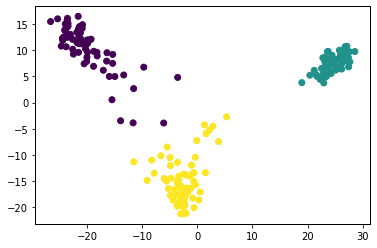

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


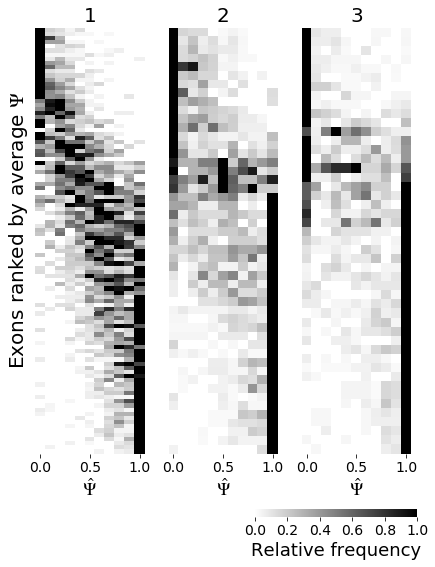

In [26]:
# from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3)
ac_clusters = ac.fit_predict(song_pca[['PC1', 'PC2']])

figsize(6,4)
plt.scatter(song_pca.PC1, song_pca.PC2, c=ac_clusters)
plt.show()

song_pca_clust = song_pca.copy()
song_pca_clust['AC'] = ac_clusters

song_clust_filter = []
for cluster in song_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = song_pca_clust.index[song_pca_clust.AC == cluster]
    
    song_filter = process_subpop(clust_subpop, song_PSI, song_mrna_counts, mrna_per_event_song, 
                                 song_read_counts, song_coverage_tab['SJ_coverage'], 0.1, 10, 0, cell_min=0.5)
    
    song_clust_filter.append(song_filter)
    
    
hist_list = [x[4] for x in song_clust_filter]

dset_name_list = ['1', '2', '3']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots_review/figure3/', plot_name = 'song_PSI_distributions_filtered_clusters',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20, nbins=11)

plt.show()

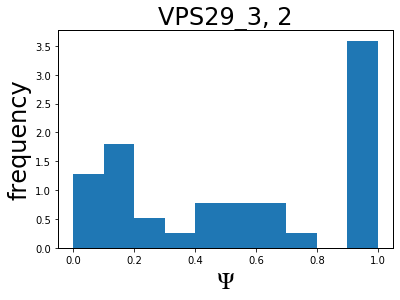

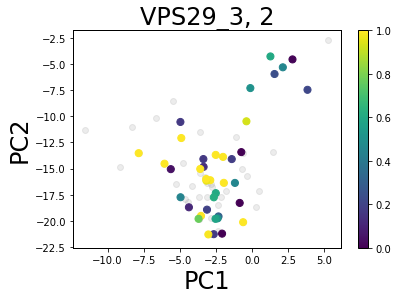

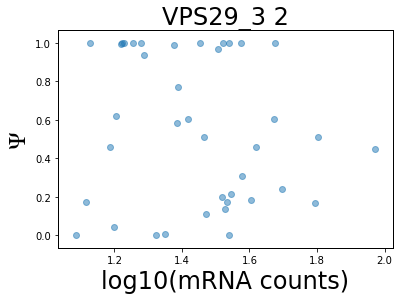

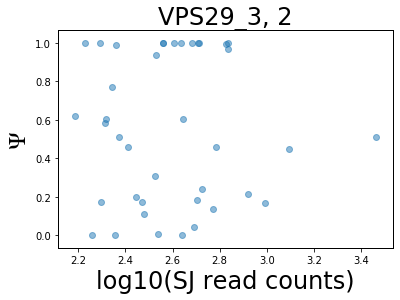

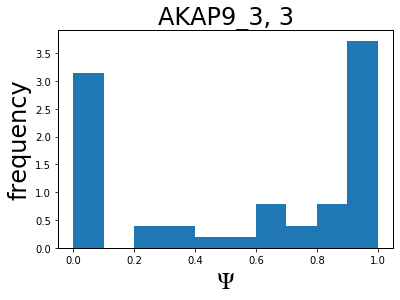

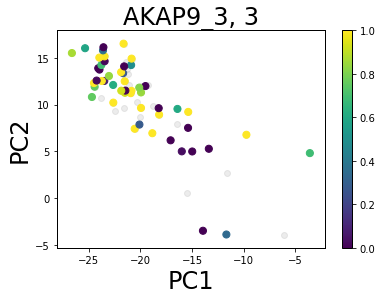

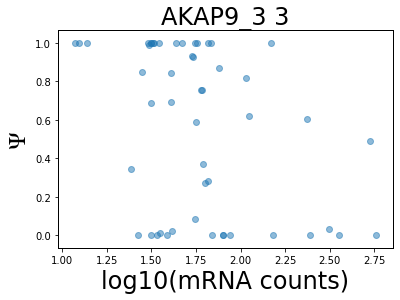

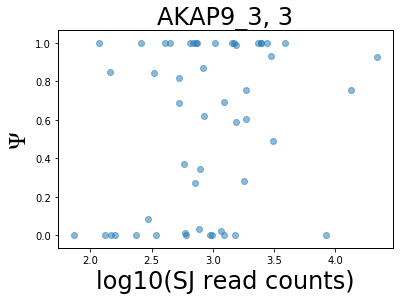

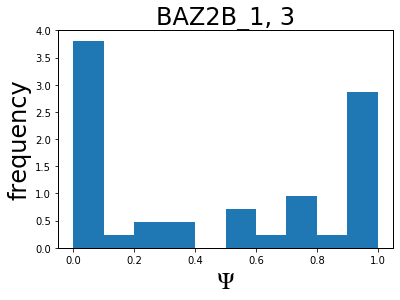

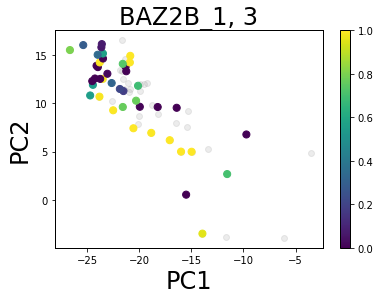

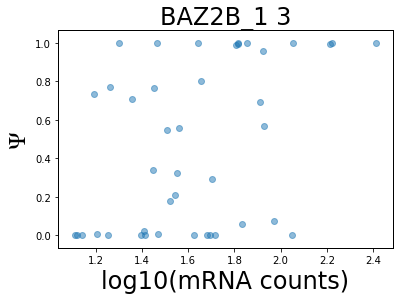

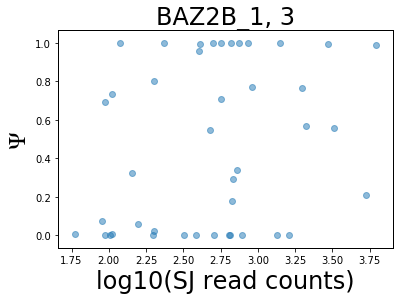

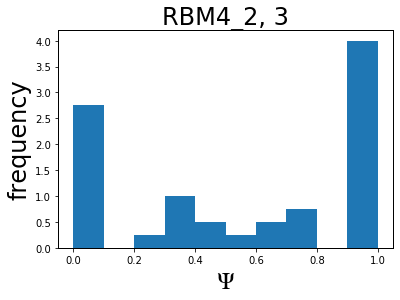

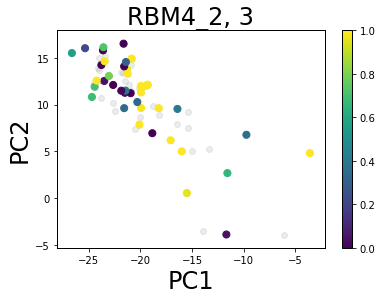

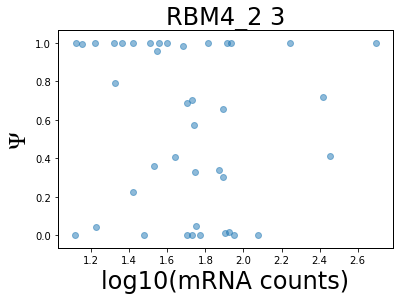

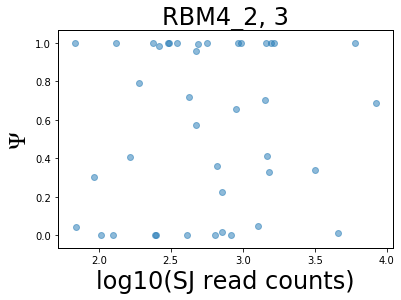

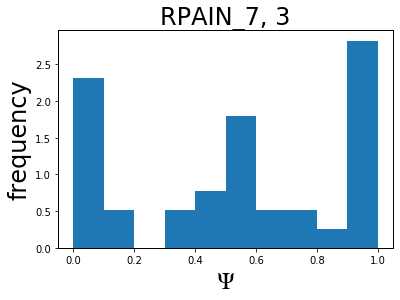

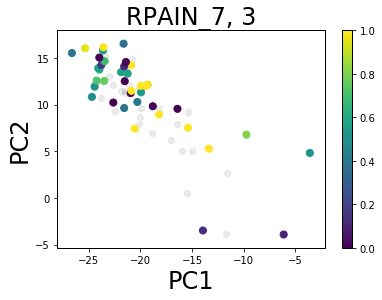

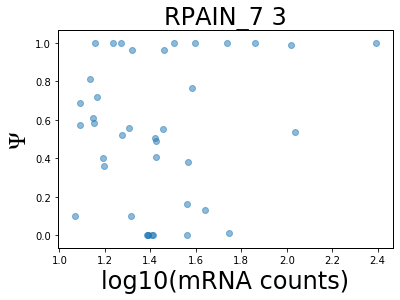

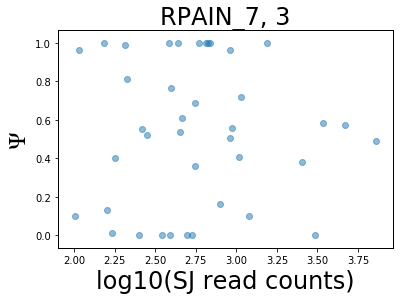

In [27]:
figsize(6, 4)
filtered_bimodal(song_clust_filter, dset_name_list, song_pca, mrna_per_event_song, 
                     song_read_counts, quantile = 0.25, psi_lim = 0.25)

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


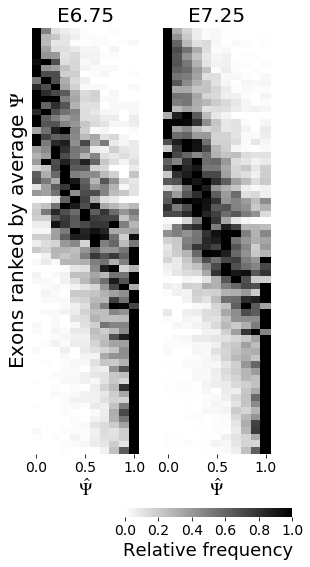

In [28]:
lescroart_E6_filtered = process_subpop(lescroart_E6, lescroart_PSI, lescroart_mrna_counts, 
                                    mrna_per_event_lescroart, lescroart_read_counts, 
                                       lescroart_coverage_tab['SJ_coverage'], 0.1, 10)
lescroart_E7_filtered = process_subpop(lescroart_E7, lescroart_PSI, lescroart_mrna_counts, 
                                  mrna_per_event_lescroart, lescroart_read_counts, 
                                       lescroart_coverage_tab['SJ_coverage'], 0.1, 10)

hist_list = [lescroart_E6_filtered[4], lescroart_E7_filtered[4]]

dset_name_list = ['E6.75', 'E7.25']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots_review/figure1/', plot_name = 'lescroart_filtered_distributions_cell_type',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20, nbins=11)

plt.show()

In [29]:
figsize(6, 4)
filtered_bimodal([lescroart_E6_filtered, lescroart_E7_filtered], 
                 ['6', '7'], song_pca, mrna_per_event_song, 
                     song_read_counts, quantile = 0.25, psi_lim = 0.25)

In [30]:
print(lescroart_E6_filtered[0].shape[0])
print(lescroart_E7_filtered[0].shape[0])
print(len(set(list(lescroart_E6_filtered[0].index)+list(lescroart_E7_filtered[0].index))))

68
65
77


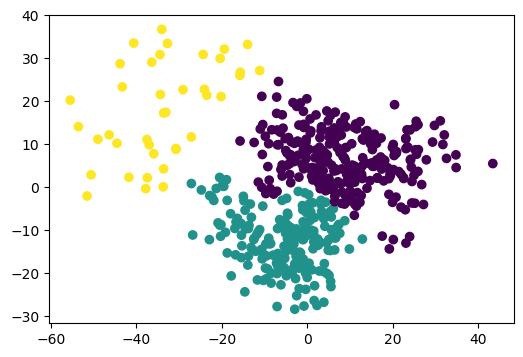

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


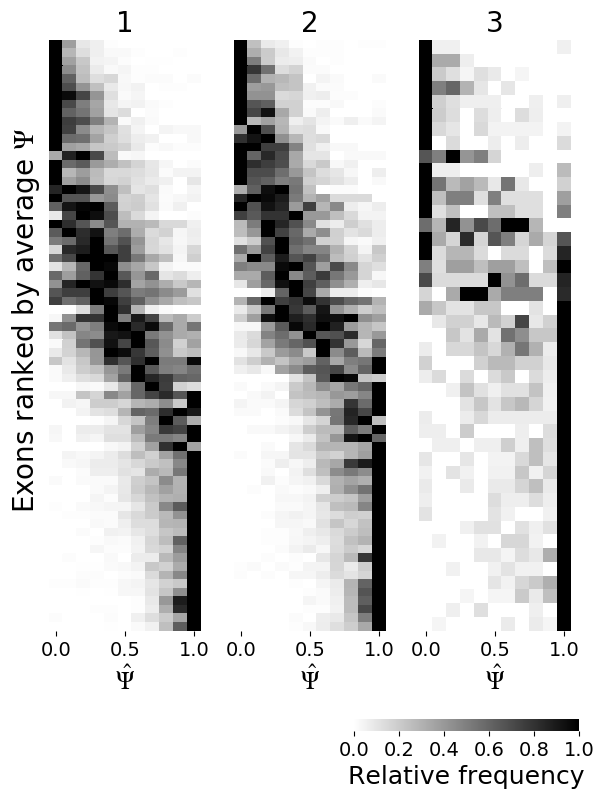

In [304]:
# from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3)
ac_clusters = ac.fit_predict(lescroart_pca[['PC1', 'PC2']])

figsize(6,4)
plt.scatter(lescroart_pca.PC1, lescroart_pca.PC2, c=ac_clusters)
plt.show()

lescroart_pca_clust = lescroart_pca.copy()
lescroart_pca_clust['AC'] = ac_clusters

lescroart_clust_filter = []
for cluster in range(3):
    clust_subpop = lescroart_pca_clust.index[lescroart_pca_clust.AC == cluster]
    
    lescroart_filter = process_subpop(clust_subpop, lescroart_PSI, lescroart_mrna_counts, mrna_per_event_lescroart, 
                                 lescroart_read_counts, lescroart_coverage_tab['SJ_coverage'], 0.1, 10, 0, cell_min=0.5)
    
    lescroart_clust_filter.append(lescroart_filter)
    
    
hist_list = [x[4] for x in lescroart_clust_filter]

dset_name_list = ['1', '2', '3']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots_review/figure3/', plot_name = 'lescroart_PSI_distributions_filtered_clusters',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20, nbins=11)

plt.show()

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


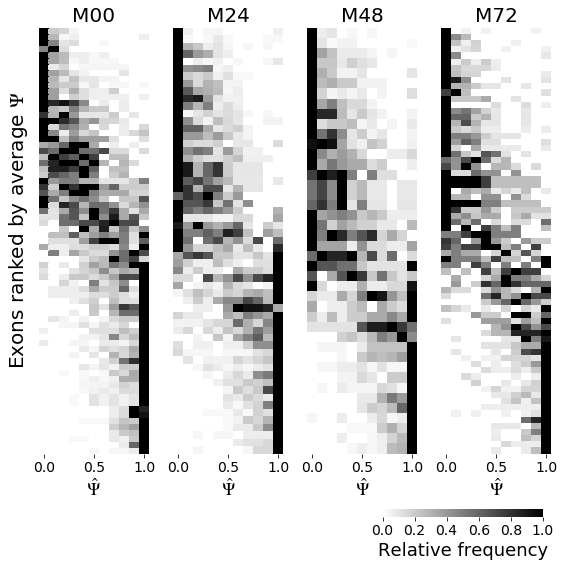

In [32]:
trapnell_M00_filtered = process_subpop(trapnell_M00, trapnell_PSI, trapnell_mrna_counts, 
                                    mrna_per_event_trapnell, trapnell_read_counts, 
                                       trapnell_coverage_tab['SJ_coverage'], 0.1, 10)
trapnell_M24_filtered = process_subpop(trapnell_M24, trapnell_PSI, trapnell_mrna_counts, 
                                  mrna_per_event_trapnell, trapnell_read_counts, 
                                       trapnell_coverage_tab['SJ_coverage'], 0.1, 10)
trapnell_M48_filtered = process_subpop(trapnell_M48, trapnell_PSI, trapnell_mrna_counts, 
                                    mrna_per_event_trapnell, trapnell_read_counts, 
                                       trapnell_coverage_tab['SJ_coverage'], 0.1, 10)
trapnell_M72_filtered = process_subpop(trapnell_M72, trapnell_PSI, trapnell_mrna_counts, 
                                  mrna_per_event_trapnell, trapnell_read_counts, 
                                       trapnell_coverage_tab['SJ_coverage'], 0.1, 10)

hist_list = [trapnell_M00_filtered[4], trapnell_M24_filtered[4], trapnell_M48_filtered[4], trapnell_M72_filtered[4]]

dset_name_list = ['M00', 'M24', 'M48', 'M72']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots_review/figure1/', plot_name = 'trapnell_filtered_distributions_cell_type',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20, nbins=11)

plt.show()

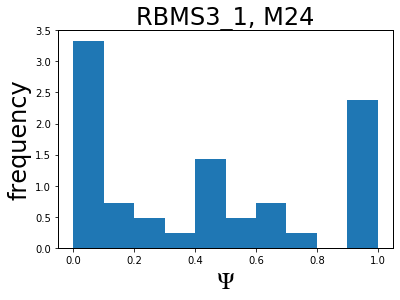

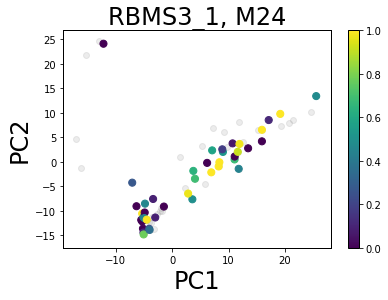

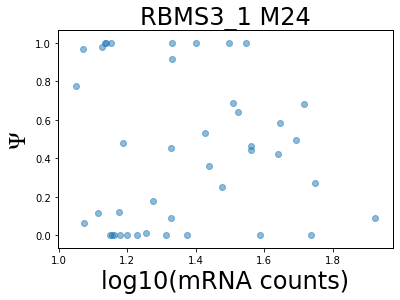

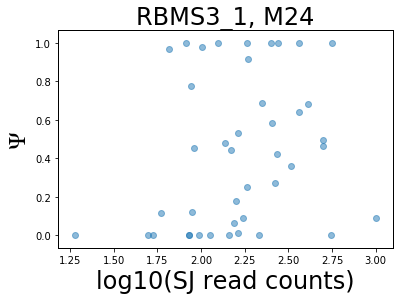

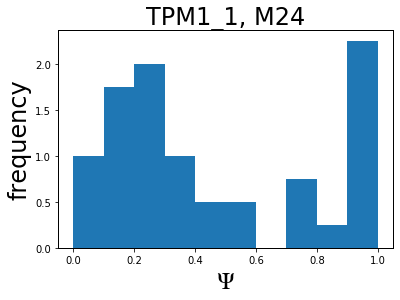

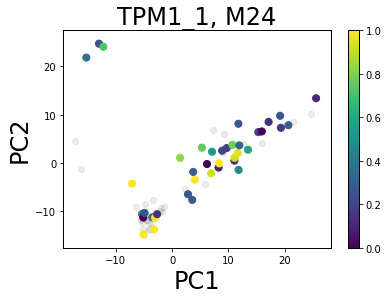

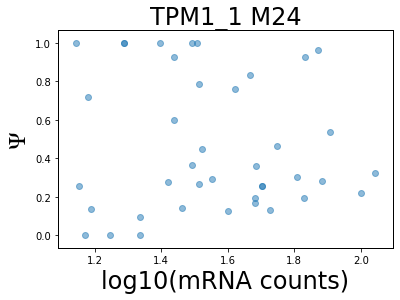

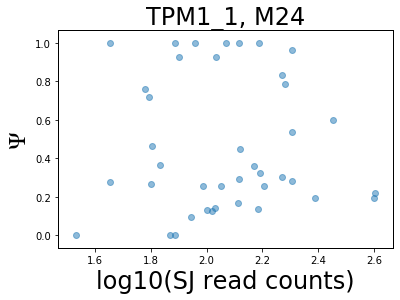

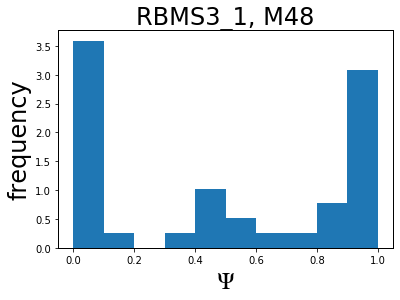

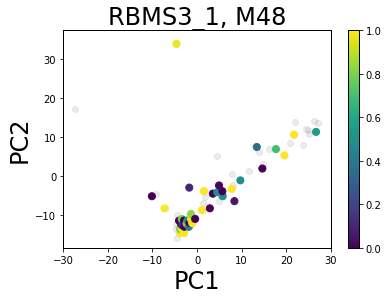

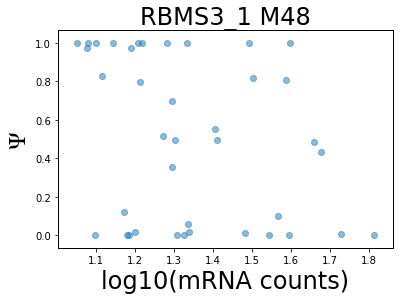

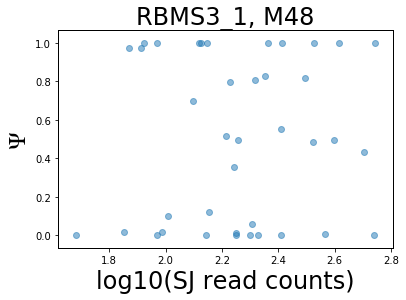

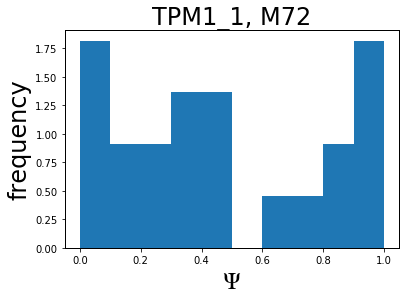

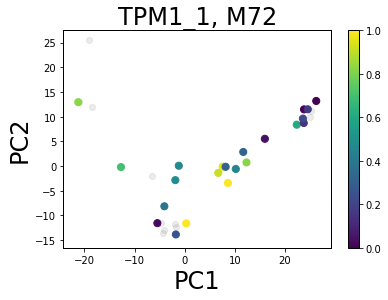

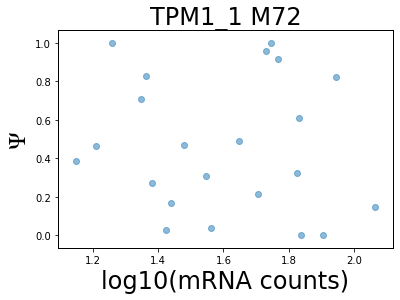

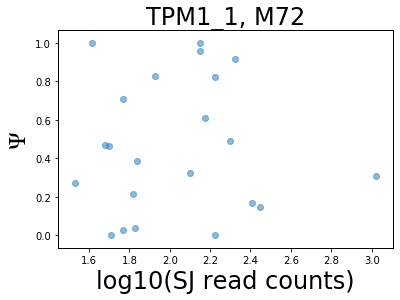

In [33]:
trapnell_groups = [trapnell_M00_filtered, trapnell_M24_filtered, trapnell_M48_filtered, trapnell_M72_filtered]
figsize(6, 4)
filtered_bimodal(trapnell_groups, ['M00', 'M24', 'M48', 'M72'], trapnell_pca, mrna_per_event_trapnell, 
                     trapnell_read_counts, quantile = 0.25, psi_lim = 0.25)

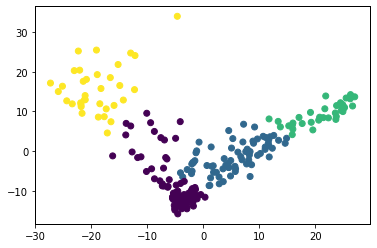

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


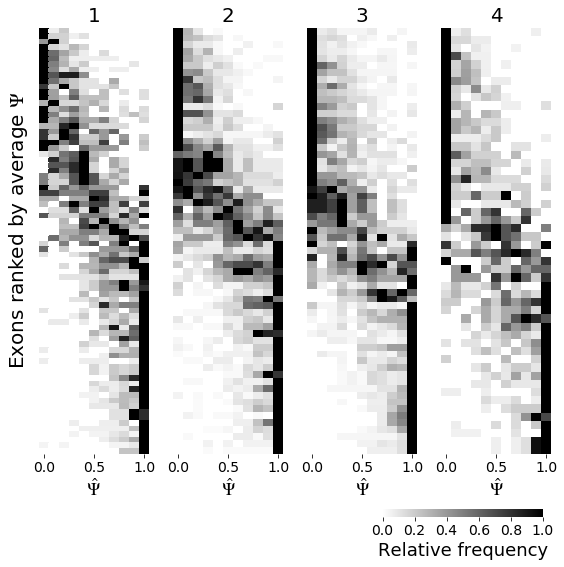

In [34]:
# from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=4)
ac_clusters = ac.fit_predict(trapnell_pca[['PC1', 'PC2']])

figsize(6,4)
plt.scatter(trapnell_pca.PC1, trapnell_pca.PC2, c=ac_clusters)
plt.show()

trapnell_pca_clust = trapnell_pca.copy()
trapnell_pca_clust['AC'] = ac_clusters

trapnell_clust_filter = []
for cluster in trapnell_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = trapnell_pca_clust.index[trapnell_pca_clust.AC == cluster]
    
    trapnell_filter = process_subpop(clust_subpop, trapnell_PSI, trapnell_mrna_counts, mrna_per_event_trapnell, 
                                 trapnell_read_counts, trapnell_coverage_tab['SJ_coverage'], 0.1, 10, 0, cell_min=0.5)
    
    trapnell_clust_filter.append(trapnell_filter)
    
    
hist_list = [x[4] for x in trapnell_clust_filter]

dset_name_list = ['1', '2', '3', '4']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots_review/figure3/', plot_name = 'trapnell_PSI_distributions_filtered_clusters',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20, nbins=11)

plt.show()

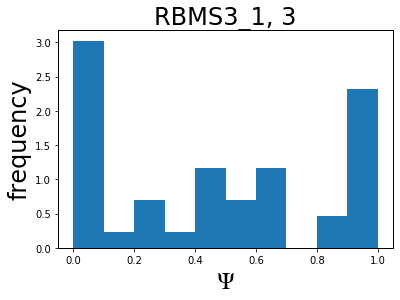

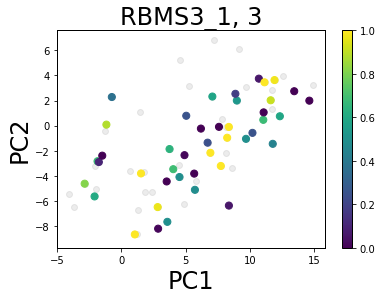

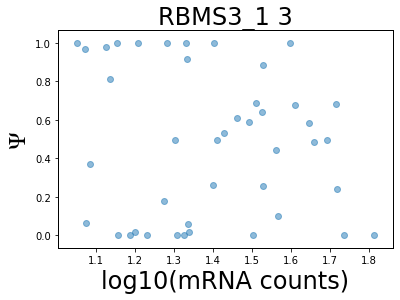

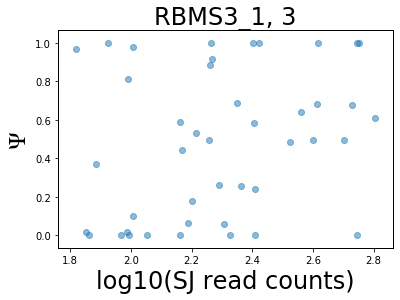

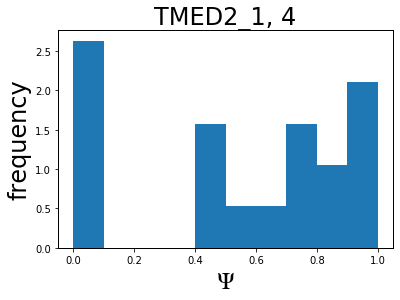

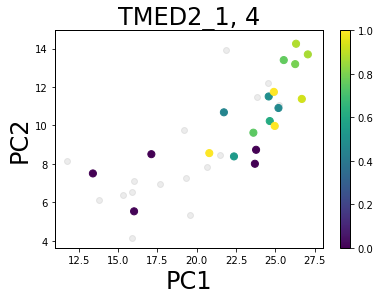

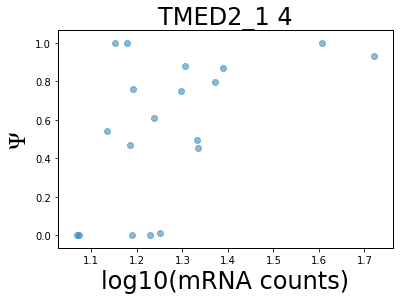

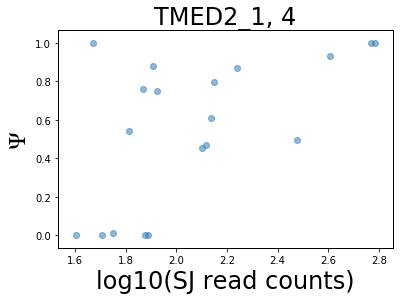

In [35]:
figsize(6, 4)
filtered_bimodal(trapnell_clust_filter, dset_name_list, trapnell_pca, mrna_per_event_trapnell, 
                     trapnell_read_counts, quantile = 0.25, psi_lim = 0.25)

In [36]:
trapnell_clust_filter[0][0].index

Index(['AKR1A1_1', 'ALDOA_1', 'ANAPC11_5', 'ANAPC11_6', 'ANXA2_2', 'AP2M1_5',
       'ATP6V0B_2', 'CD59_6', 'CDKN3_1', 'CHRNA1_1', 'CHURC1_2', 'CHURC1_3',
       'CKLF_1', 'DGUOK_5', 'EIF3M_5', 'EIF4A2_2', 'EIF4A2_3',
       'EIF4A2_nmdSE_1', 'EIF4G2_1', 'EIF6_5', 'EMC4_3', 'FN1_1', 'FN1_2',
       'FN1_7', 'GAS5_1', 'HNRNPA2B1_4', 'HNRNPC_2', 'HNRNPR_1', 'HNRNPR_7',
       'ITGB1BP1_2', 'LAMP2_1', 'LRRC75A-AS1_10', 'LRRC75A-AS1_4',
       'LRRC75A-AS1_5', 'LRRC75A-AS1_8', 'MORF4L2_7', 'MORF4L2_8', 'MRPL33_1',
       'MRPS18C_5', 'MTCH2_1', 'MYL6_2', 'NQO1_3', 'NUSAP1_2', 'PCBP2_2',
       'PCBP2_9', 'PDZD11_1', 'RBM39_nmdSE_2', 'RHOC_2', 'RHOC_3', 'RHOC_4',
       'RHOC_5', 'RHOC_6', 'RPLP0_1', 'RPLP0_3', 'RPS24_1', 'SEPT2_14',
       'SEPT7_1', 'SEPT7_11', 'SEPT7_2', 'SEPT7_6', 'SNHG5_12',
       'SRSF10_nmdSE_1', 'SRSF7_5', 'SRSF7_nmdSE_1', 'SYNCRIP_1', 'TFPI_12',
       'TFPI_4', 'TPM1_2', 'TXN2_2', 'VKORC1_1', 'VPS29_3', 'VPS29_6',
       'VPS29_9', 'ZFAS1_1', 'ZFAS1_3', 'ZNF207_1

In [37]:
song_modalities = pd.read_csv('../../../data/song/song_event_modalities.tab', sep='\t', index_col = 0)

AASS_11
excluded


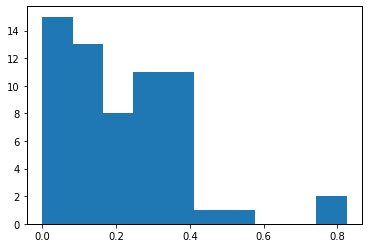

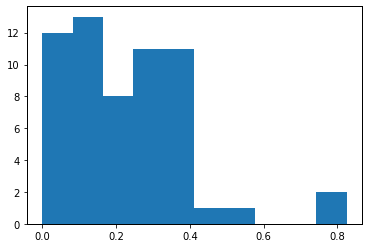

AASS_9
included


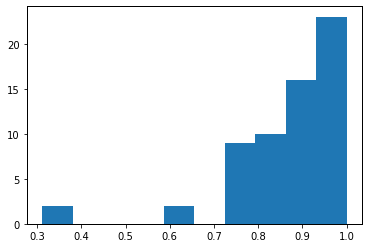

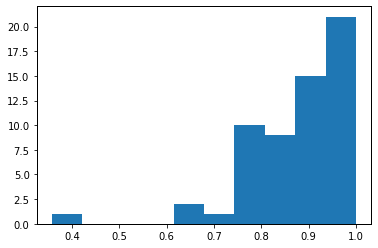

ACP1_1
included


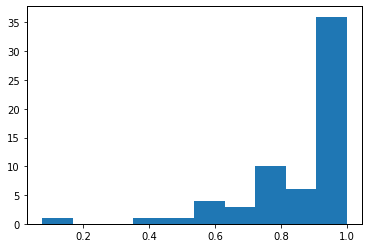

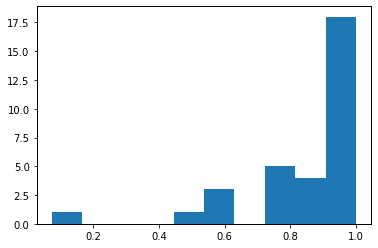

ACP1_2
excluded


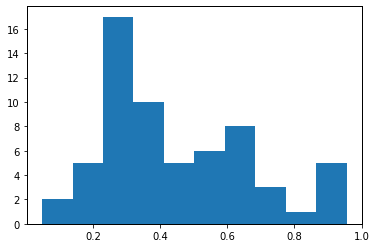

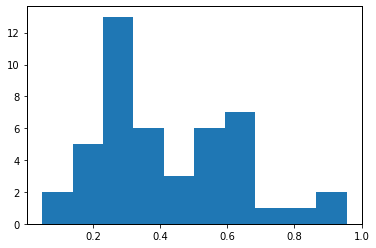

ADSL_1
included


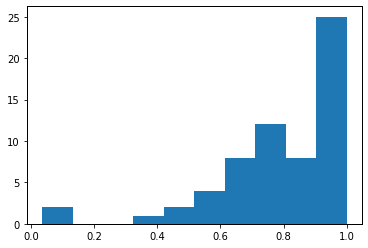

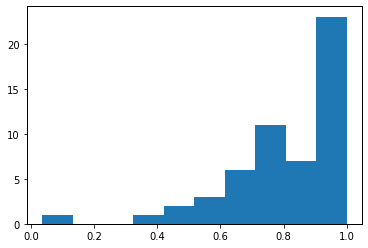

AKR1A1_1
uncategorized


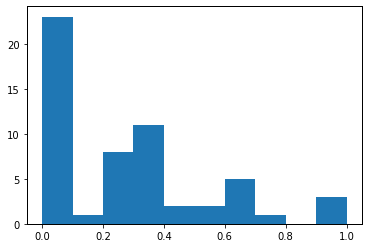

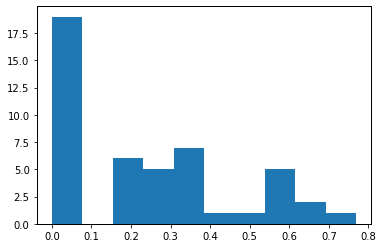

AKR1A1_5
uncategorized


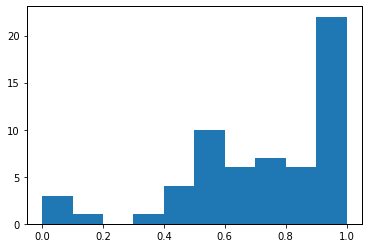

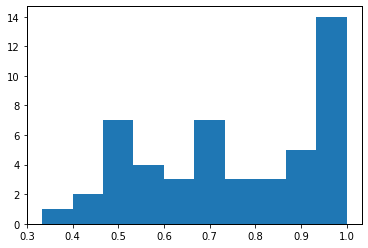

ALDOA_1
excluded


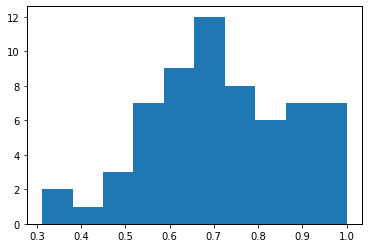

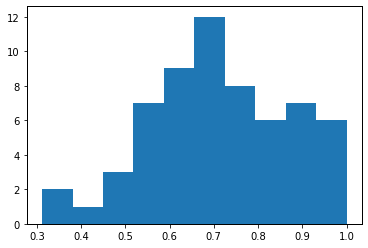

ANAPC11_3
bimodal


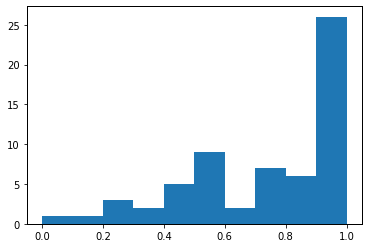

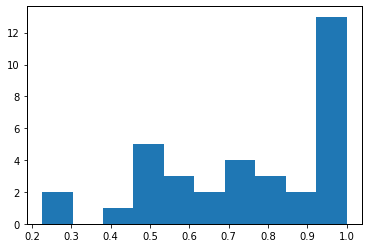

ANAPC11_6
uncategorized


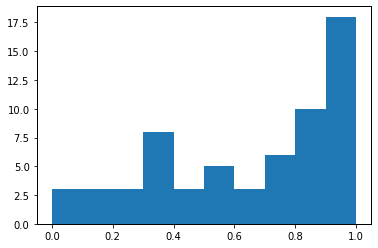

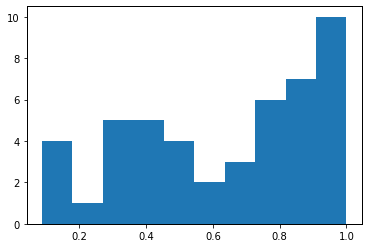

C8orf59_1
included


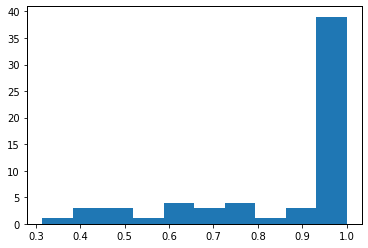

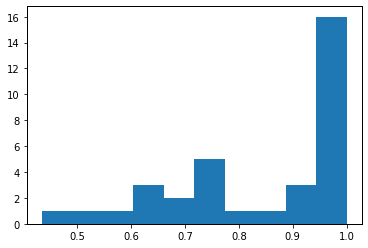

C8orf59_2
uncategorized


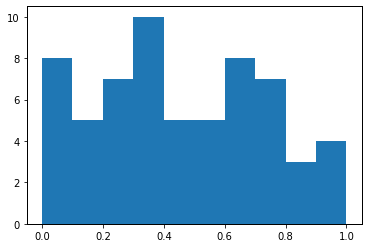

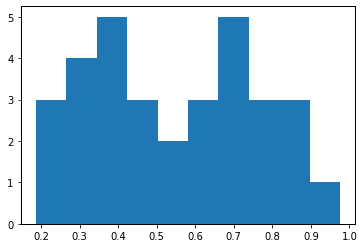

COA1_1
excluded


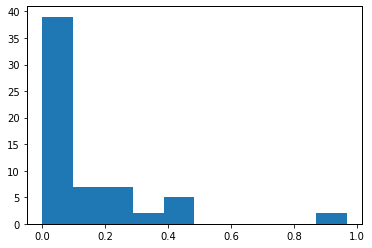

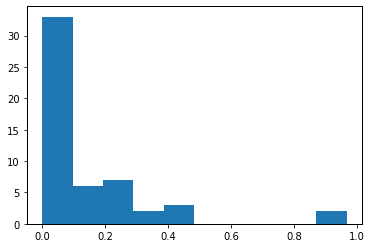

COA4_1
excluded


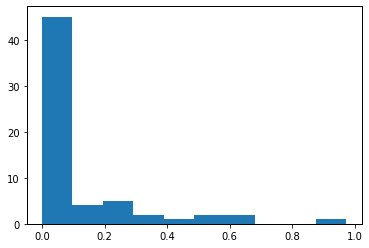

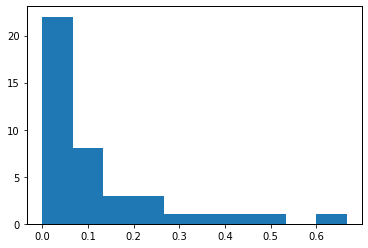

CSDE1_4
excluded


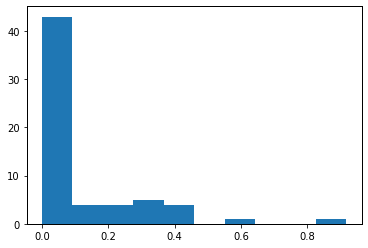

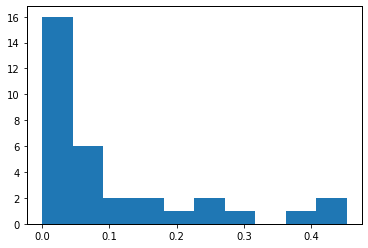

CSNK1A1_4
excluded


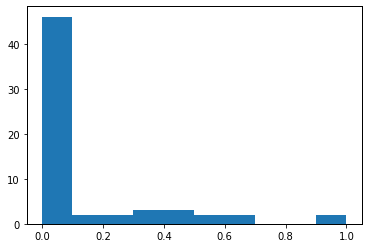

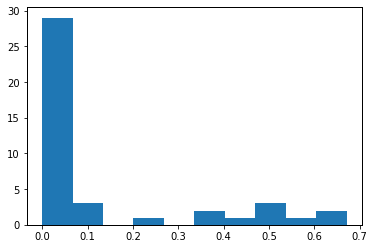

DGUOK_3
included


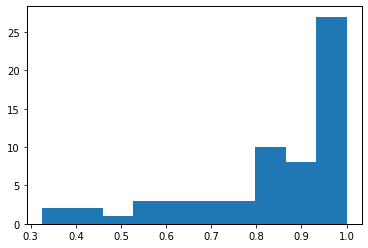

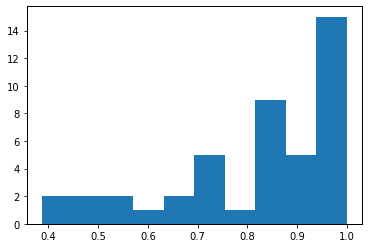

DGUOK_7
excluded


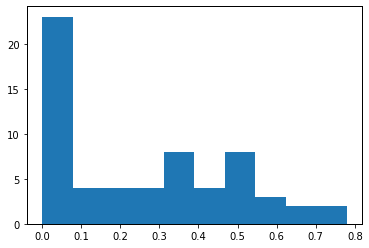

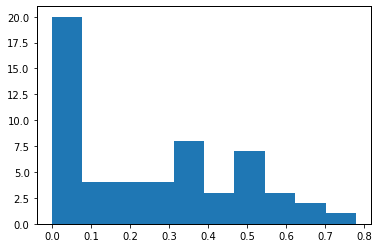

DGUOK_9
excluded


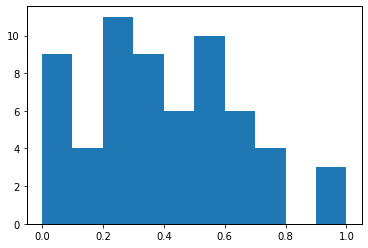

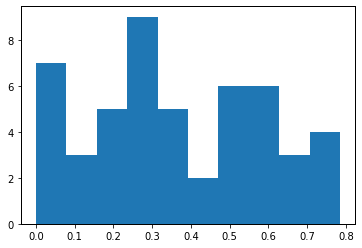

DMKN_18
uncategorized


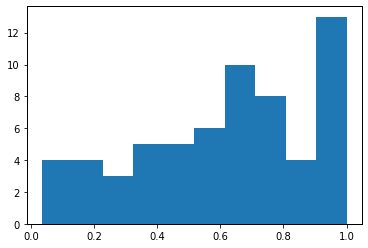

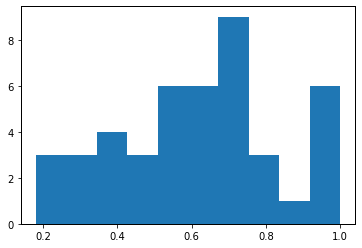

DMKN_23
excluded


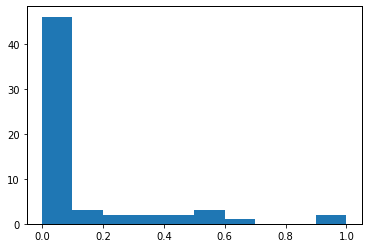

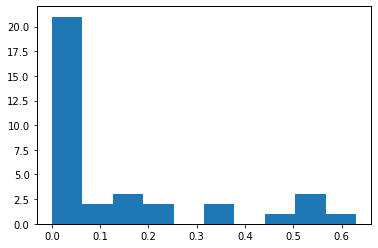

DNAJC19_5
bimodal


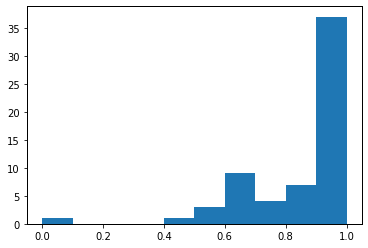

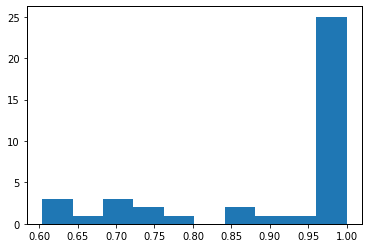

DNMT1_13
excluded


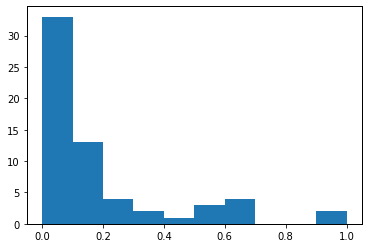

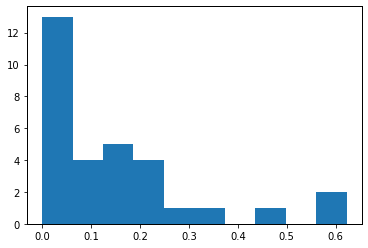

DNMT3B_2
bimodal


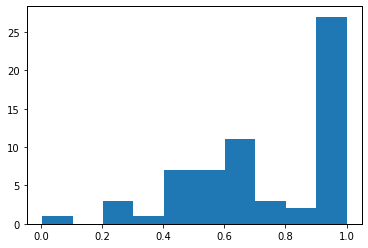

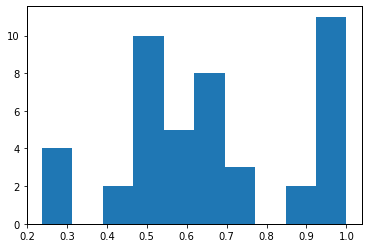

DNMT3B_4
excluded


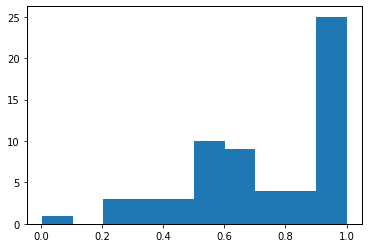

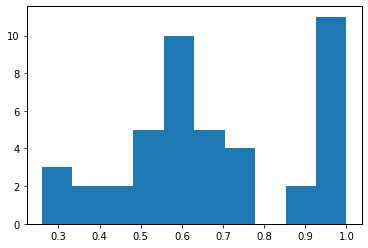

EIF3K_1
included


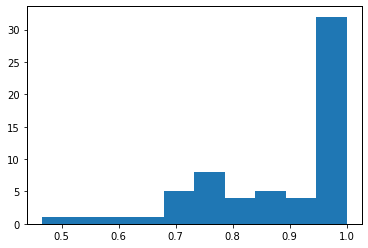

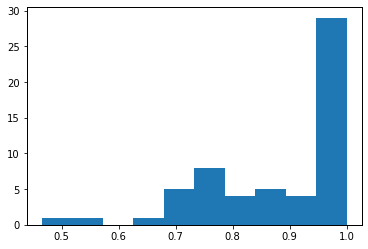

EIF4A2_3
bimodal


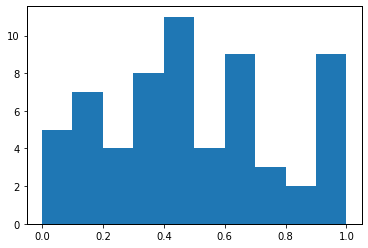

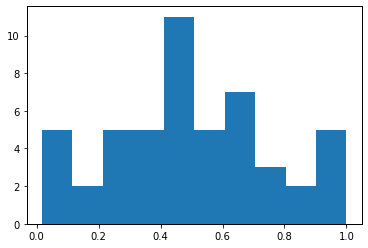

EIF4A2_4
uncategorized


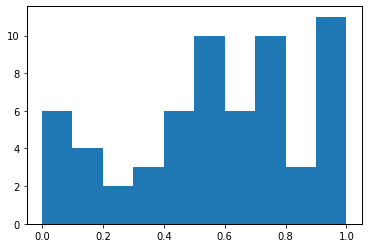

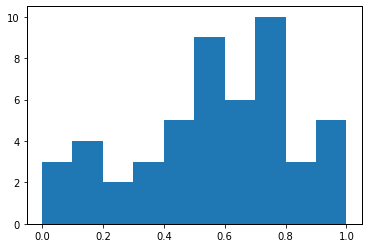

EIF4A2_7
uncategorized


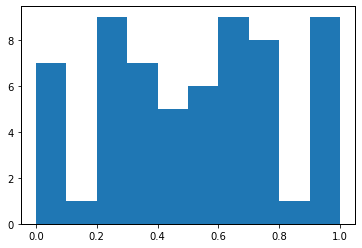

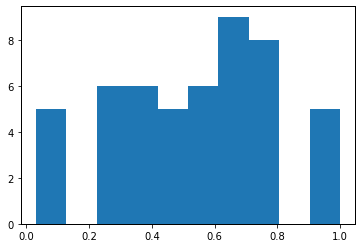

EIF4E2_2
included


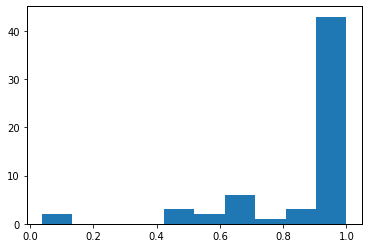

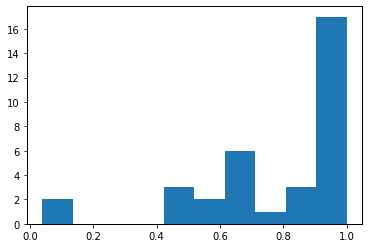

EIF4G2_1
included


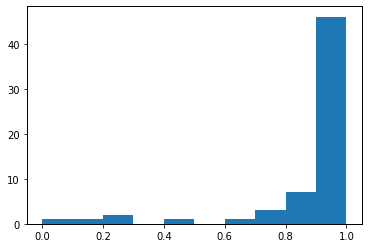

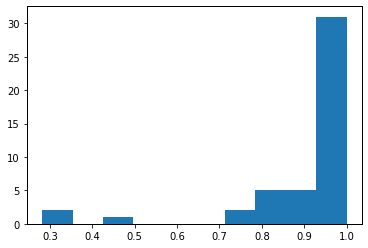

EIF6_1
included


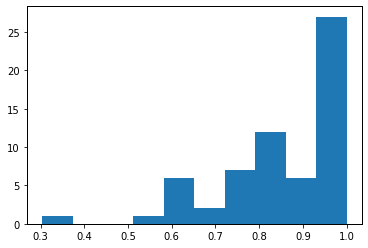

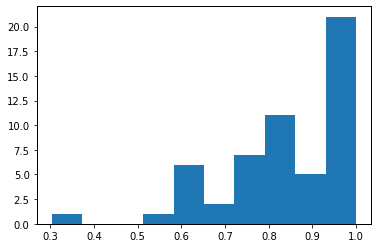

EMC4_3
included


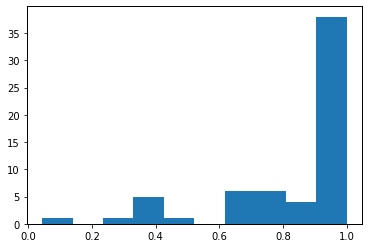

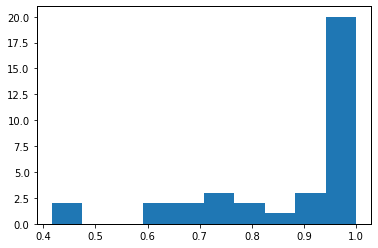

FDPS_3
bimodal


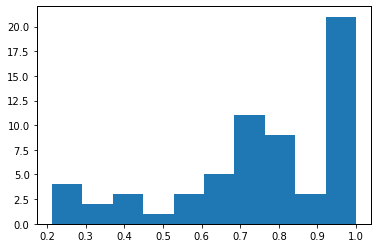

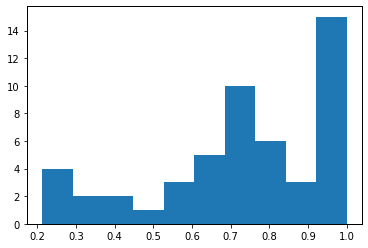

FDPS_4
included


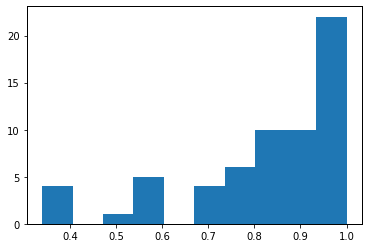

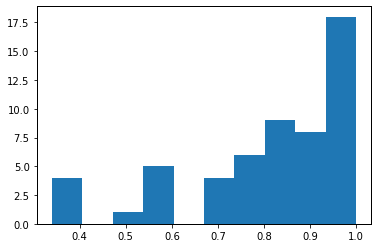

FIBP_1
bimodal


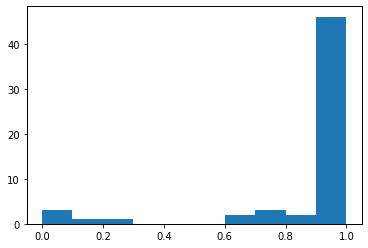

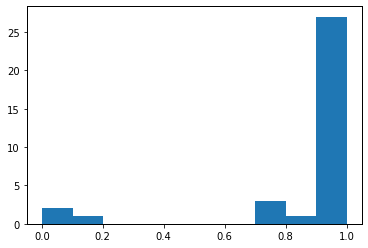

GGCT_3
uncategorized


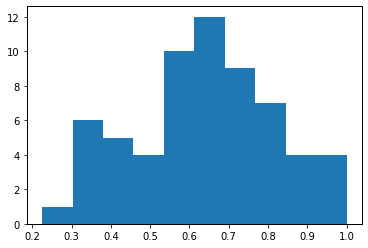

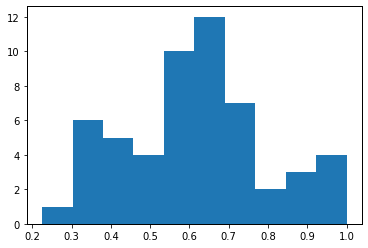

GNAS_6
bimodal


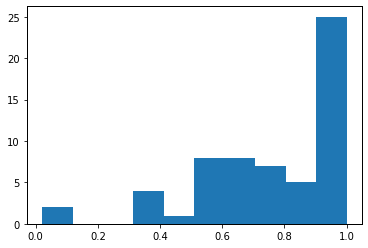

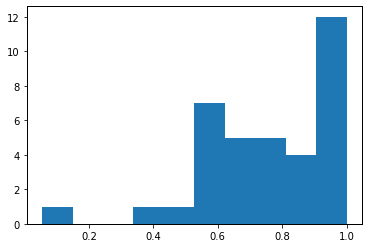

HDDC2_1
uncategorized


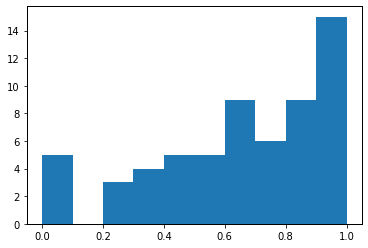

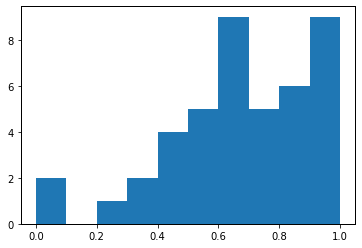

HMGN5_8
included


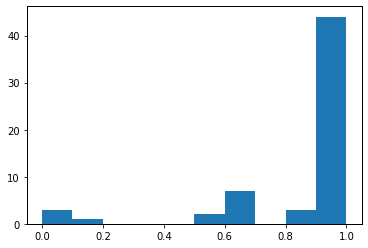

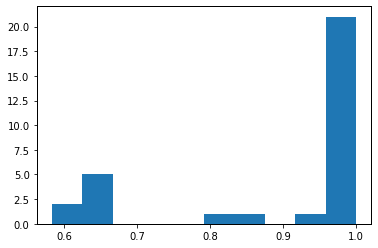

HNRNPA2B1_1
excluded


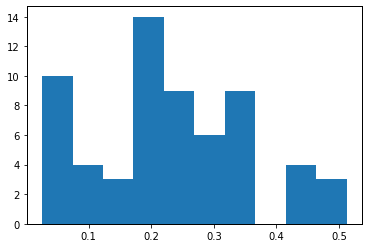

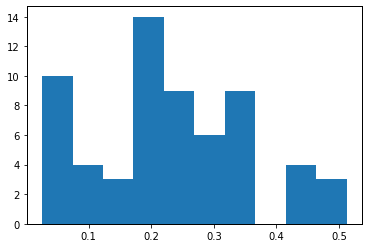

HNRNPC_1
included


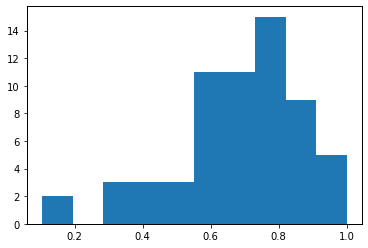

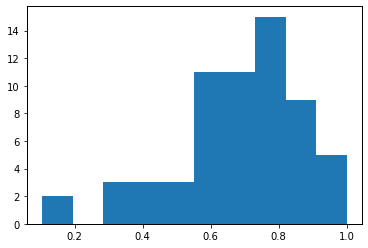

HNRNPD_4
uncategorized


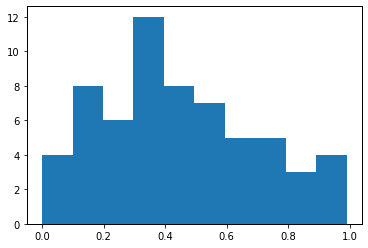

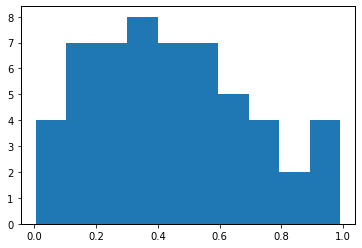

HNRNPR_6
uncategorized


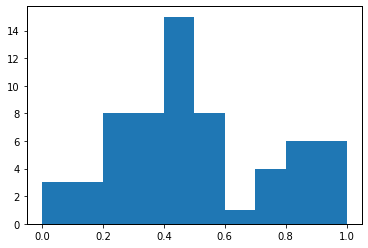

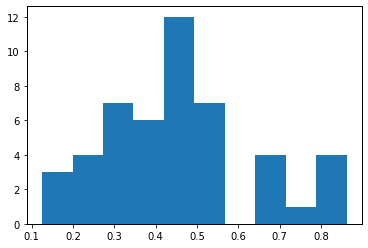

HNRNPR_7
uncategorized


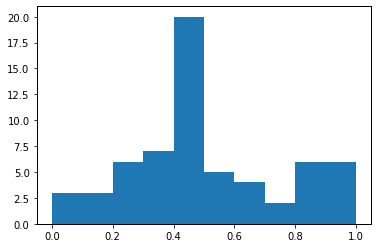

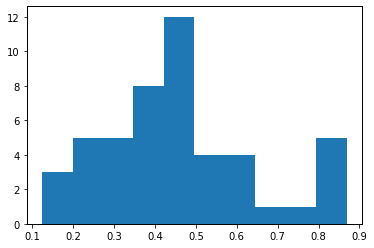

JMJD1C_7
bimodal


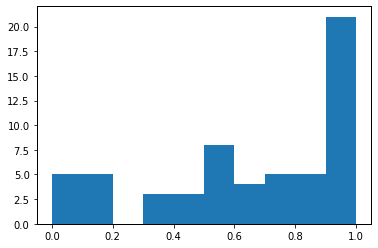

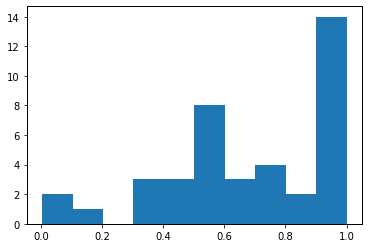

LINC00458_1
bimodal


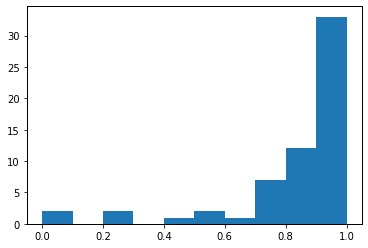

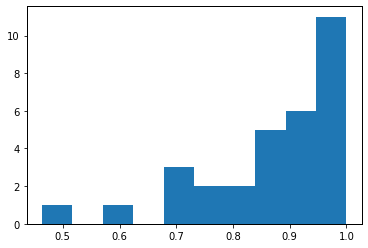

LRRC75A-AS1_12
excluded


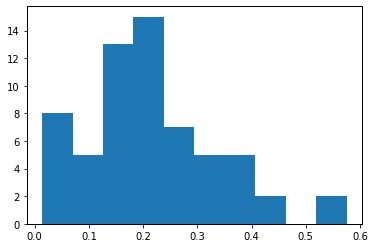

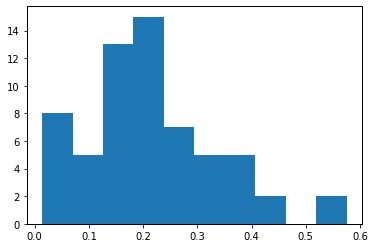

LRRC75A-AS1_2
excluded


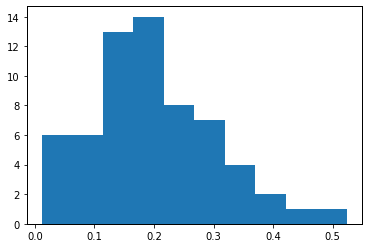

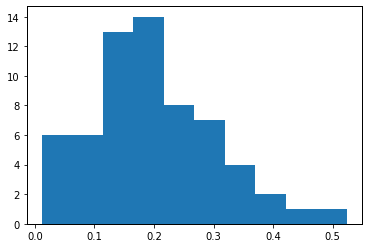

LRRC75A-AS1_3
excluded


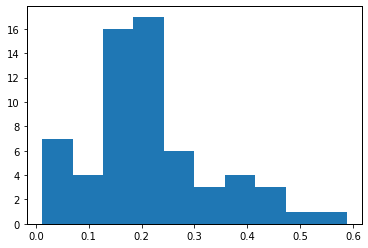

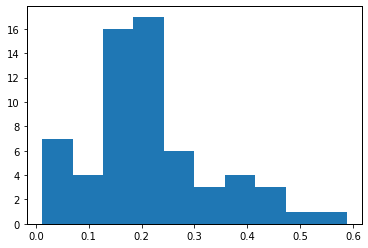

MATR3_1
bimodal


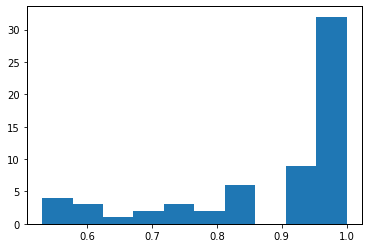

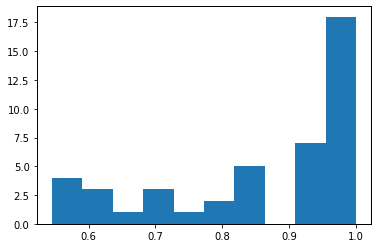

MATR3_10
bimodal


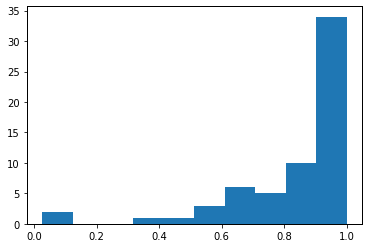

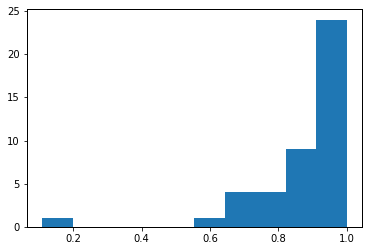

MORF4L2_8
excluded


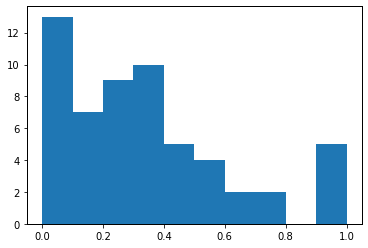

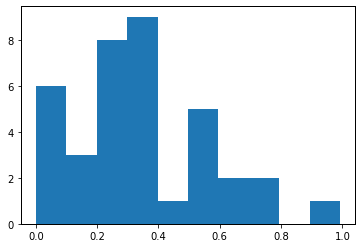

MRPL22_1
included


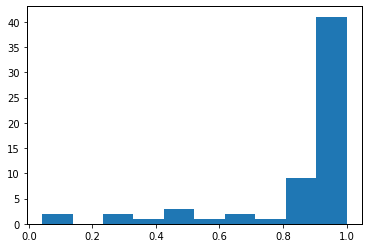

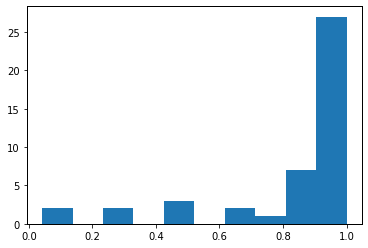

MRPL22_2
bimodal


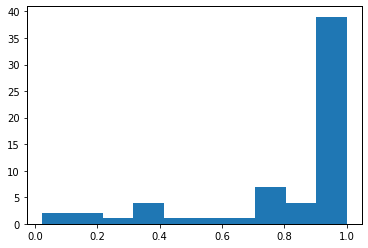

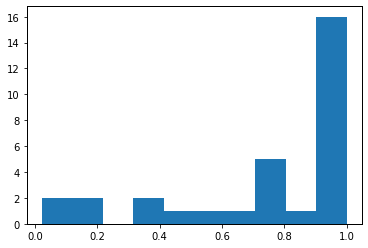

MRPL33_3
uncategorized


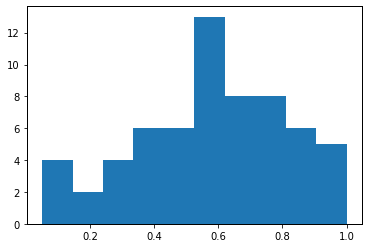

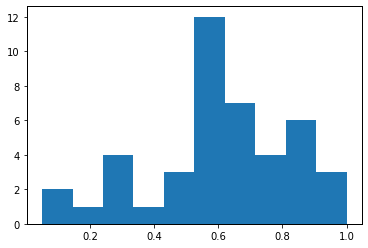

MTHFD2_3
included


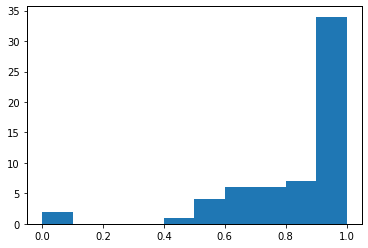

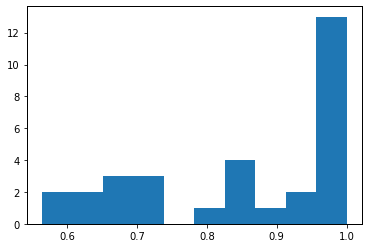

MYL6_3
excluded


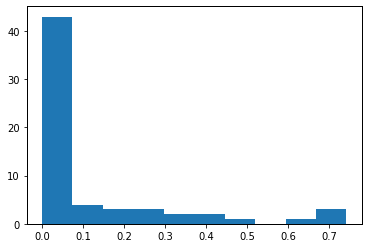

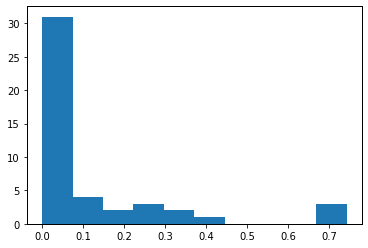

MYL6_4
bimodal


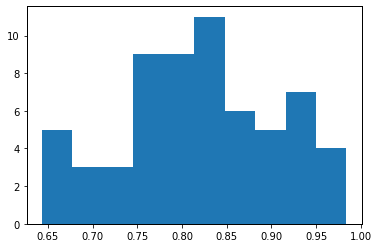

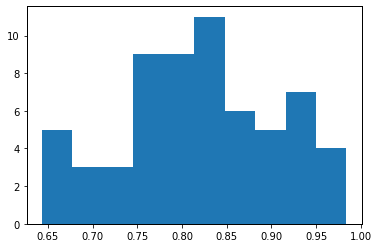

MYL6_7
excluded


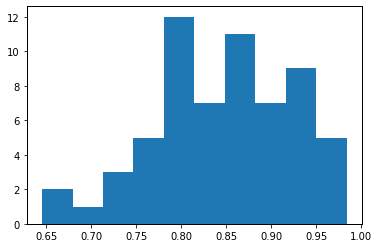

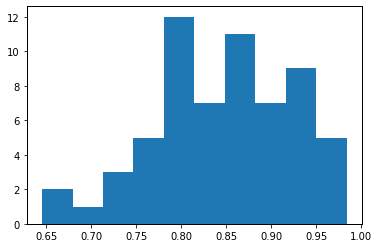

NASP_1
included


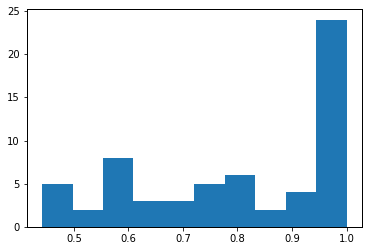

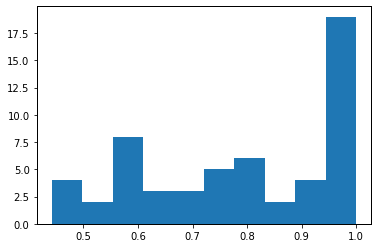

NDUFB3_2
excluded


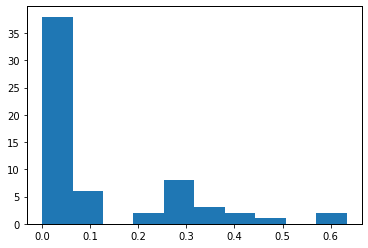

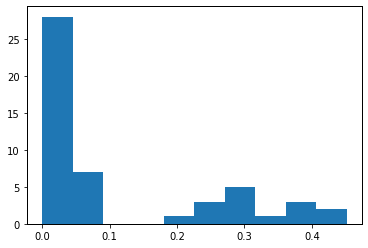

NQO2_11
bimodal


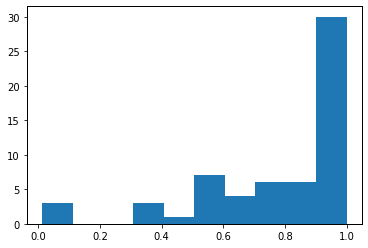

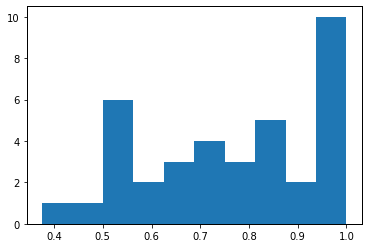

OCIAD2_9
included


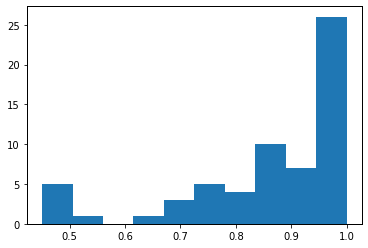

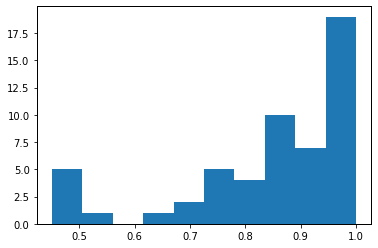

PCBP2_11
bimodal


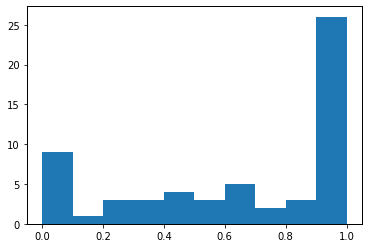

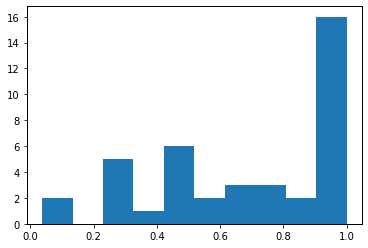

PCBP2_5
bimodal


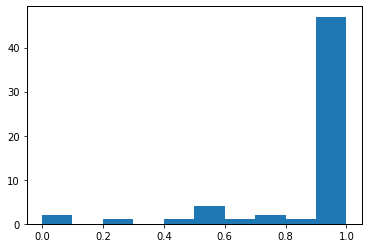

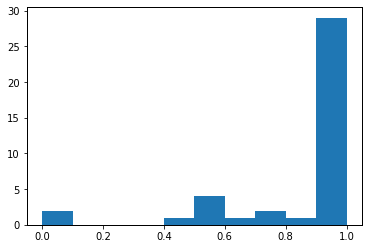

PCBP2_9
uncategorized


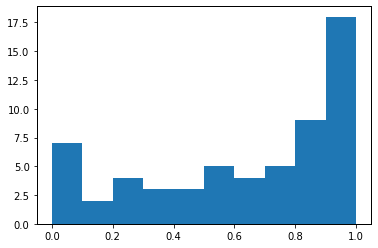

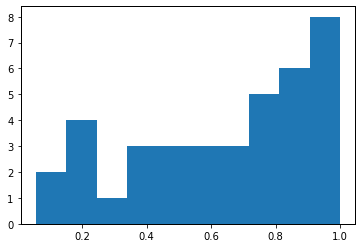

PDCD10_8
excluded


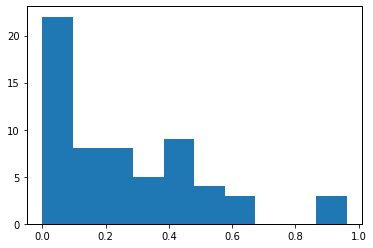

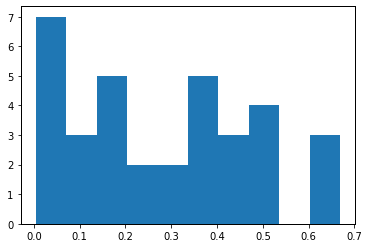

PFDN5_4
excluded


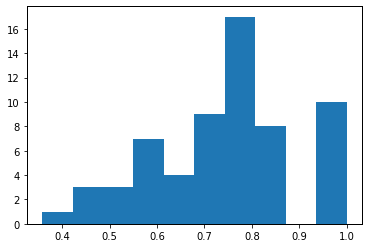

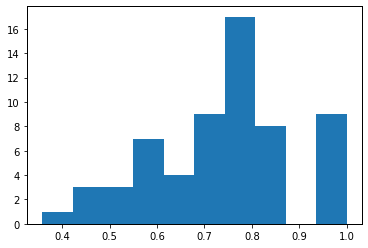

PFDN5_7
excluded


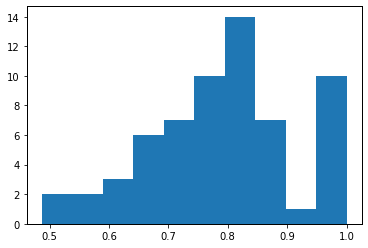

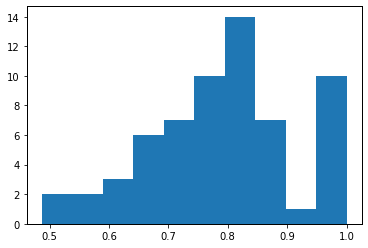

PSAT1_4
included


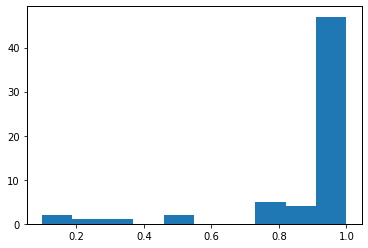

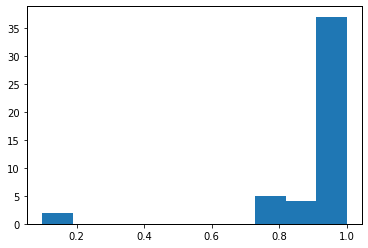

RBM39_nmdSE_2
uncategorized


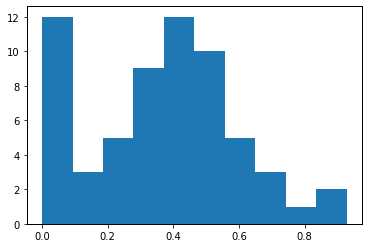

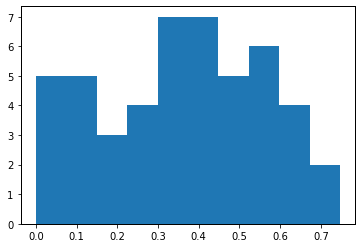

RBM4_2
uncategorized


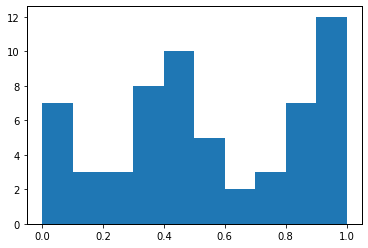

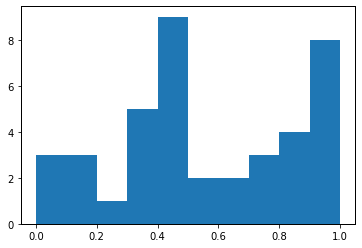

RPL17_2
excluded


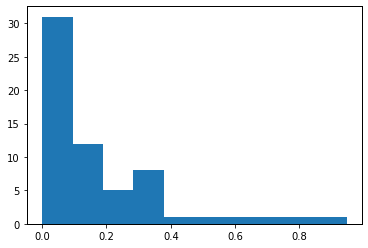

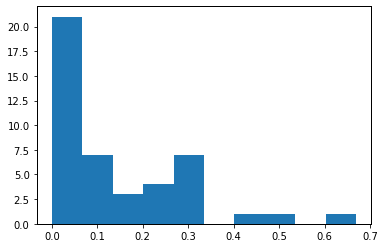

RPS24_1
middle


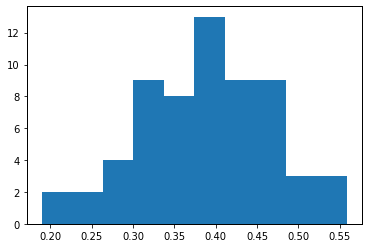

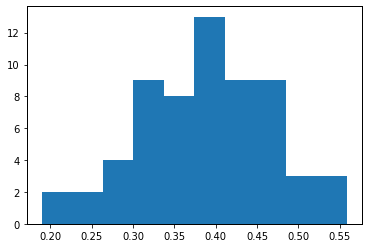

SEPT2_3
excluded


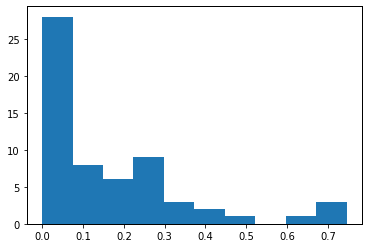

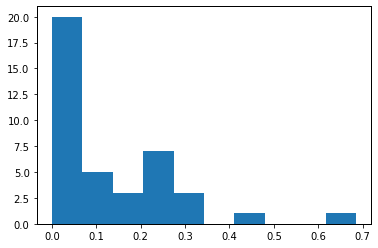

SNHG16_2
uncategorized


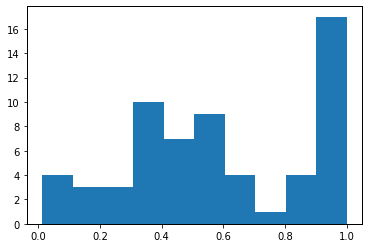

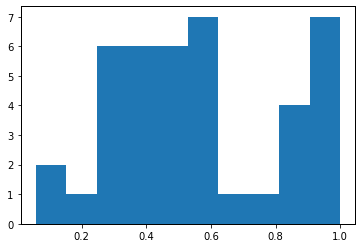

SNHG1_3
bimodal


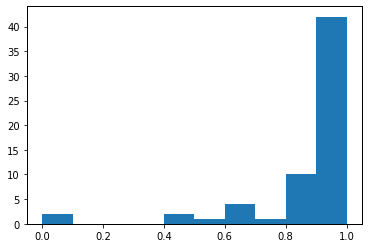

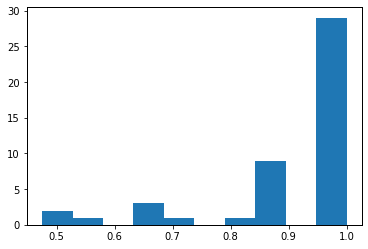

SNHG5_11
included


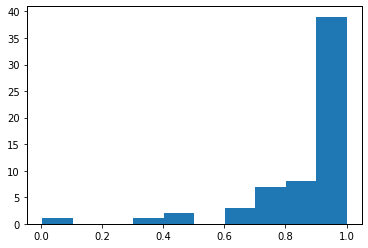

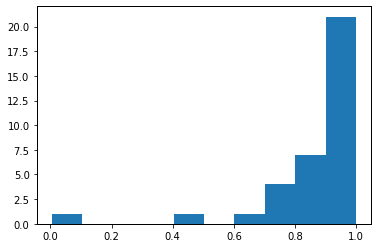

SNHG6_1
included


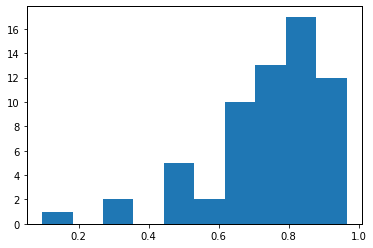

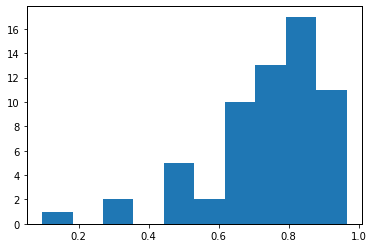

SNRPA1_4
excluded


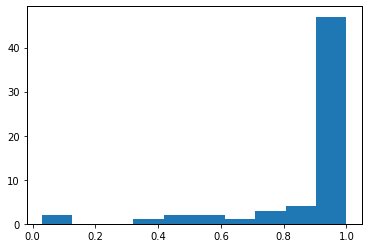

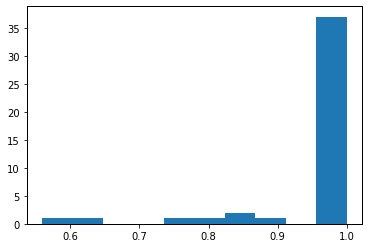

SNRPN_3
excluded


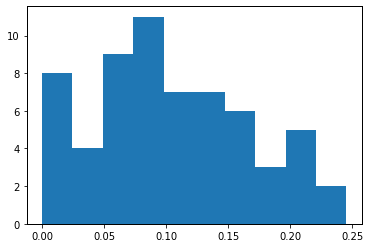

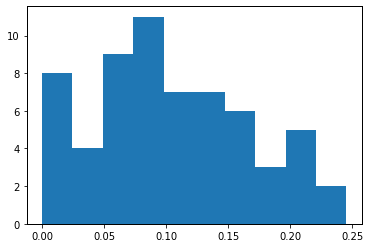

SNU13_1
excluded


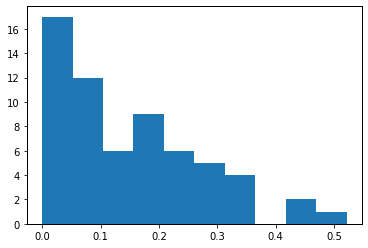

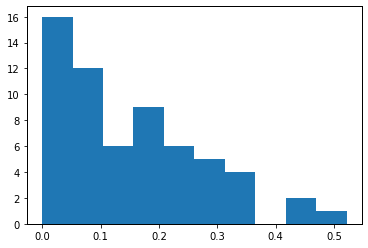

SRP9_3
excluded


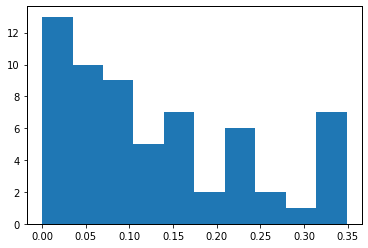

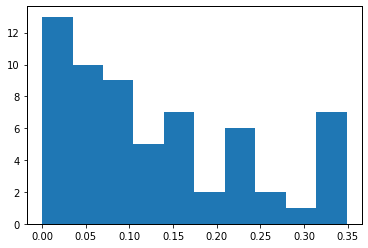

SRSF7_4
included


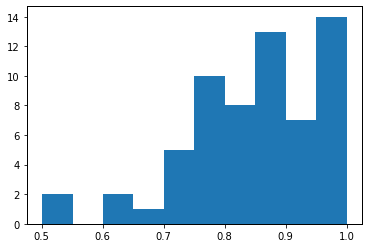

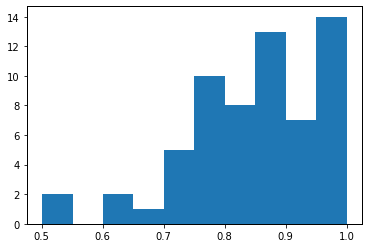

SYNCRIP_4
uncategorized


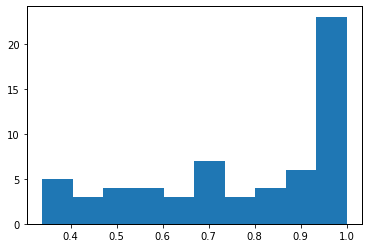

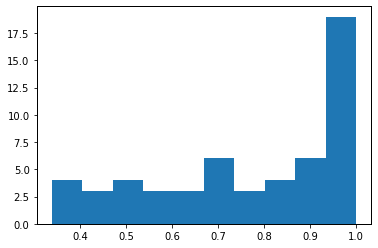

TERF1_1
uncategorized


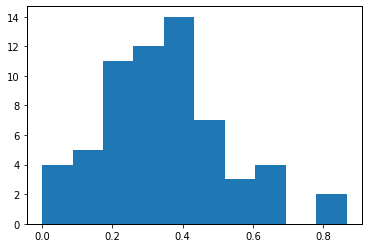

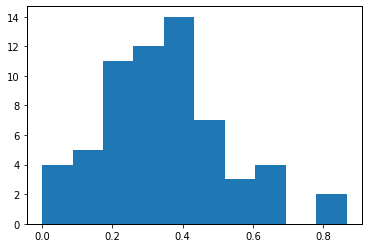

THYN1_1
uncategorized


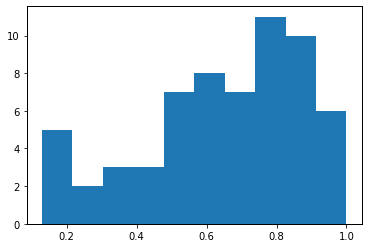

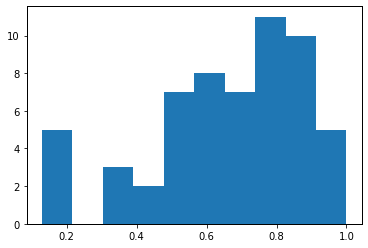

TIMM8B_1
excluded


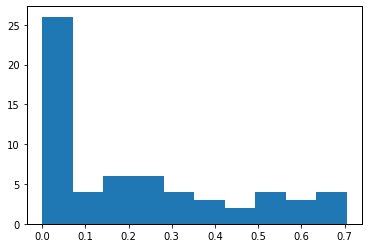

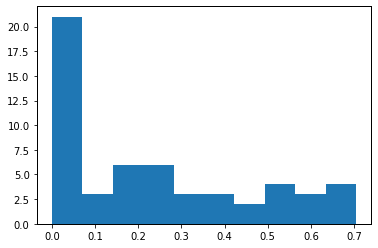

TIMM8B_2
excluded


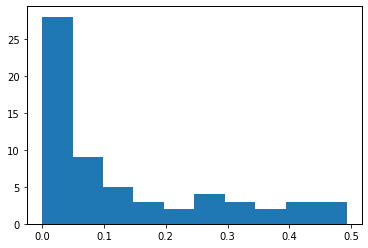

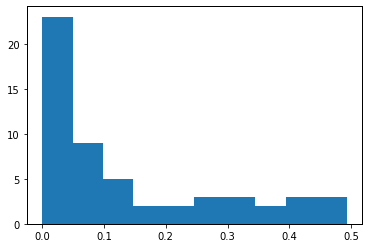

TPM1_1
excluded


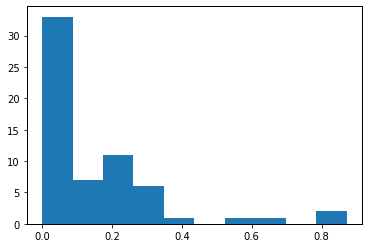

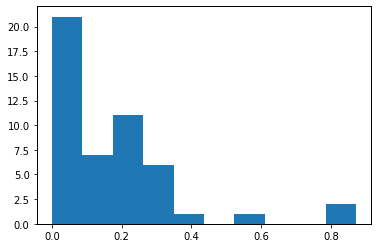

TPM1_5
excluded


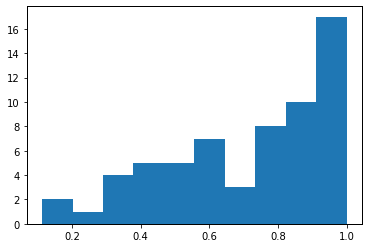

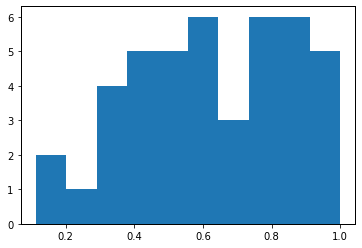

UFC1_1
included


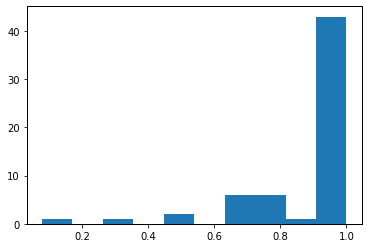

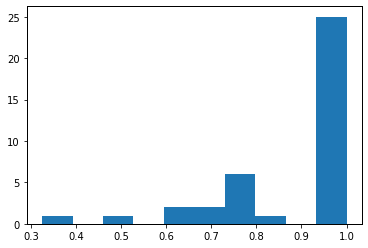

UGP2_1
excluded


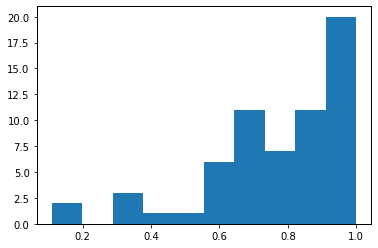

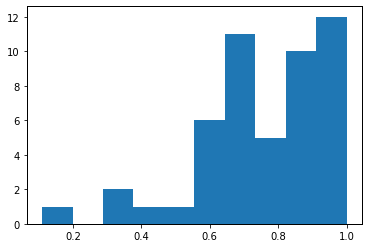

YWHAB_4
excluded


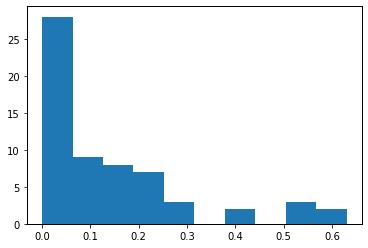

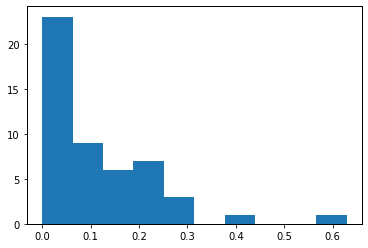

YWHAZ_2
excluded


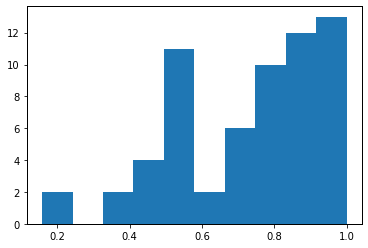

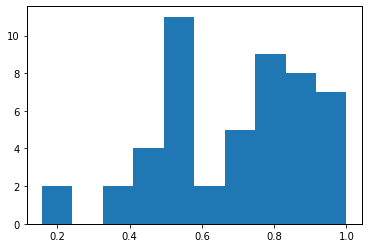

ZBTB8OS_28
uncategorized


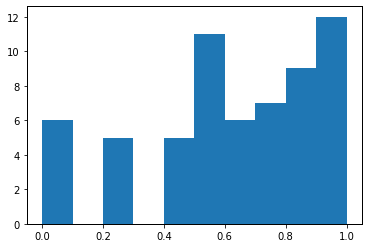

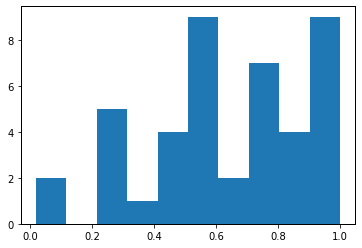

ZFAS1_2
uncategorized


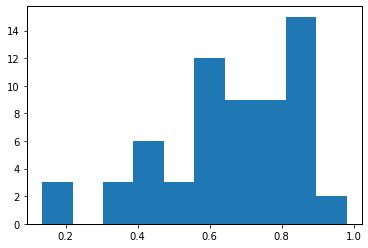

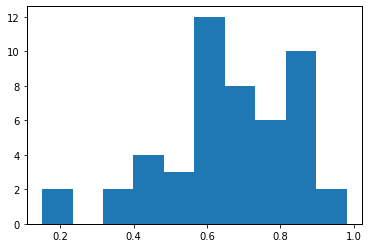

ZFAS1_3
uncategorized


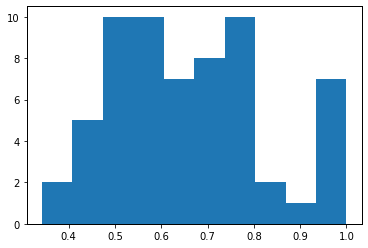

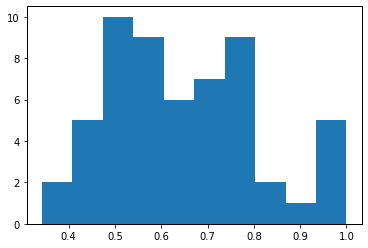

ZNF207_1
uncategorized


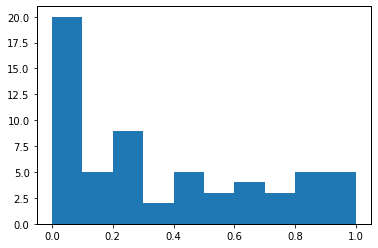

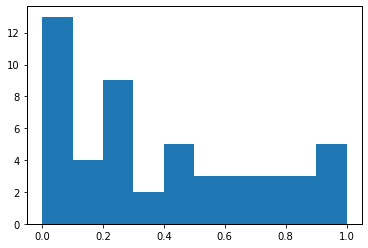

In [38]:
for evento in [x for x in song_iPSC_filtered[0].index if x in song_modalities.index]:
    print(evento)
    print(song_modalities.loc[evento, 'iPSC'])
    plt.hist(song_PSI.loc[evento, song_iPSC].dropna())
    plt.show()
    plt.hist(song_iPSC_filtered[0].loc[evento].dropna())
    plt.show()

In [39]:
for evento in [x for x in song_iPSC_filtered[0].index if x in song_modalities.index]:
    if song_modalities.loc[evento, 'iPSC'] == 'bimodal':
        print(evento)
        print(song_modalities.loc[evento, 'iPSC'])
        
        
        quantile_25 = song_iPSC_filtered[0].loc[evento].quantile(0.25)
        quantile_75 = song_iPSC_filtered[0].loc[evento].quantile(0.75)
        
        if (quantile_25 <= 0.25) and (quantile_75 >= 0.75):
            plt.hist(song_iPSC_filtered[0].loc[evento].dropna())
            plt.show()
            
        else:
            print(quantile_25)
            print(quantile_75)
            
            
        
        quantile_25_unfiltered = song_PSI.loc[evento, song_iPSC].quantile(0.25)
        quantile_75_unfiltered = song_PSI.loc[evento, song_iPSC].quantile(0.75)
        if (quantile_25_unfiltered <= 0.25) and (quantile_75_unfiltered >= 0.75):
            plt.hist(song_PSI.loc[evento, song_iPSC].dropna())
            plt.show()

ANAPC11_3
bimodal
0.5491878551340182
0.9805188263890616
DNAJC19_5
bimodal
0.8133779797496612
1.0
DNMT3B_2
bimodal
0.5087281795511222
0.8908575478384124
EIF4A2_3
bimodal
0.35387488328664796
0.6629011882947415
FDPS_3
bimodal
0.61358591116993
0.9466579299702724
FIBP_1
bimodal
0.9671843182034446
1.0
GNAS_6
bimodal
0.605388502173068
0.9959220363313803
JMJD1C_7
bimodal
0.5324346981876913
0.959044633755906
LINC00458_1
bimodal
0.8123773834145414
0.9610840314330196
MATR3_1
bimodal
0.7472061313608414
0.9918809201623816
MATR3_10
bimodal
0.8303176525748222
1.0
MRPL22_2
bimodal
0.5969624375237726
1.0
MYL6_4
bimodal
0.7720286922140681
0.8818604012442557
NQO2_11
bimodal
0.6087808702469619
0.9396984924623116
PCBP2_11
bimodal
0.452467200161993
0.9982983607790809
PCBP2_5
bimodal
0.8364288177641312
1.0
SNHG1_3
bimodal
0.8612409148770173
1.0


In [40]:
len([x for x in song_iPSC_filtered[0].index if x in song_modalities.index])

100

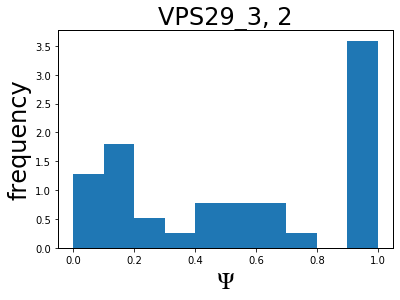

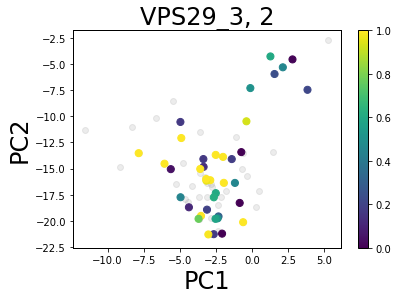

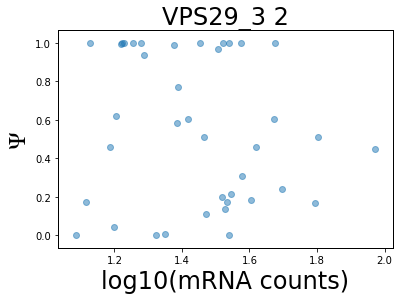

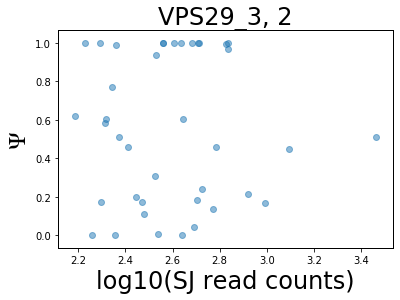

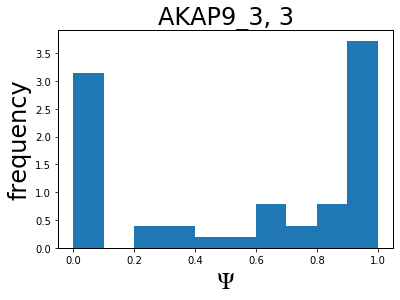

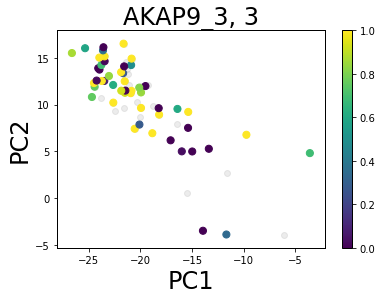

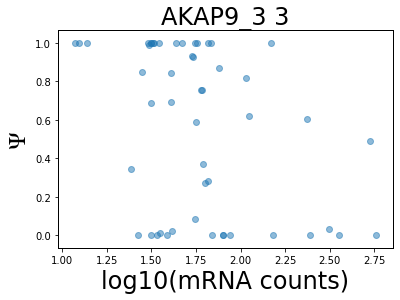

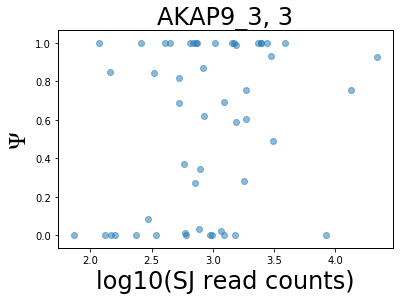

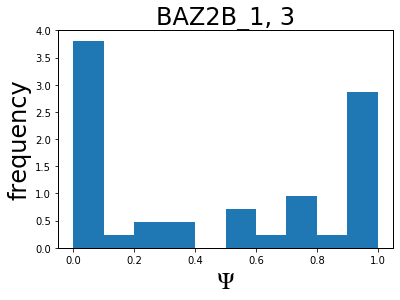

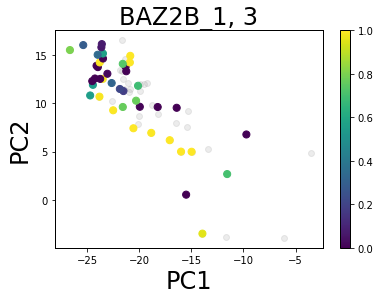

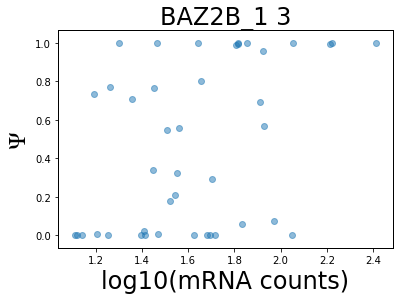

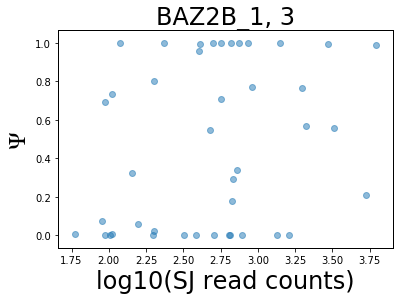

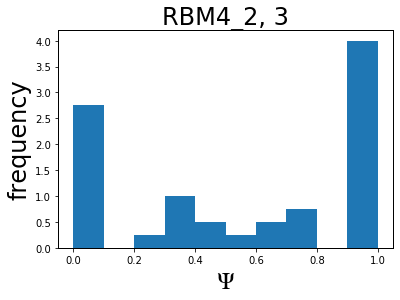

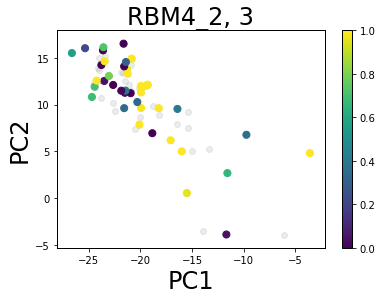

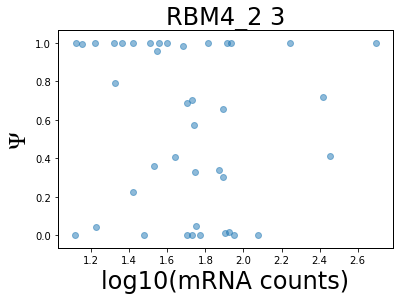

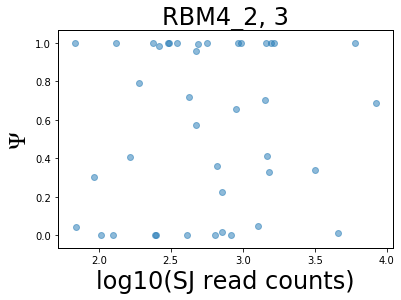

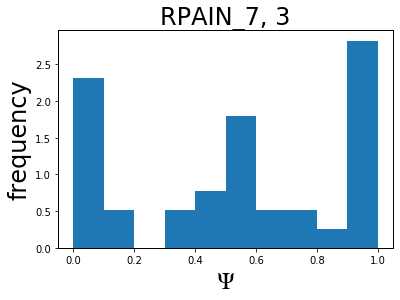

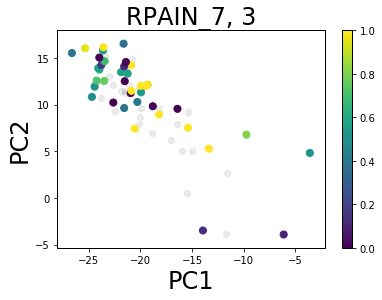

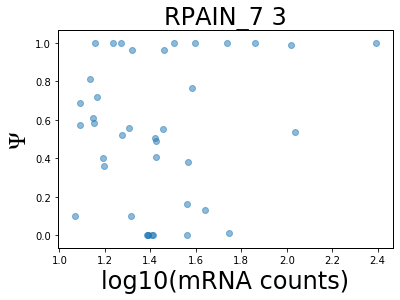

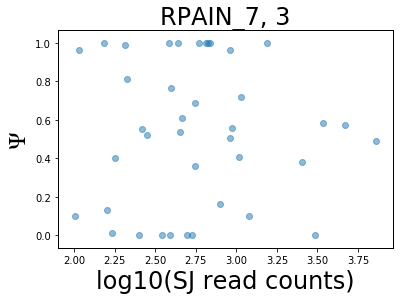

In [41]:
figsize(6, 4)
filtered_bimodal(song_clust_filter, dset_name_list, song_pca, mrna_per_event_song, 
                     song_read_counts, quantile = 0.25, psi_lim = 0.25)

In [42]:
((song_iPSC_filtered[0].quantile(0.25, axis=1) <= 0.25) & (song_iPSC_filtered[0].quantile(0.75, axis=1) >= 0.75)).sum()

0

TCF12_1
bimodal


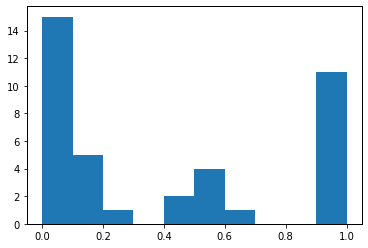

VPS29_3
bimodal


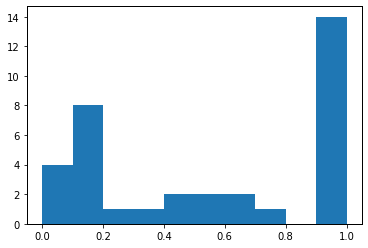

In [43]:
song_NPC_bimodal = song_NPC_filtered[0].loc[((song_NPC_filtered[0].quantile(0.25, axis=1) <= 0.25) & (song_NPC_filtered[0].quantile(0.75, axis=1) >= 0.75))].index
for event in song_NPC_bimodal:
    if event in song_modalities.index:
        print(event)
        print(song_modalities.loc[event, 'NPC'])
        plt.hist(song_NPC_filtered[0].loc[event].dropna())
        plt.show()

AKAP9_3
bimodal


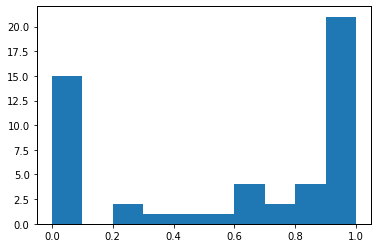

BAZ2B_1
bimodal


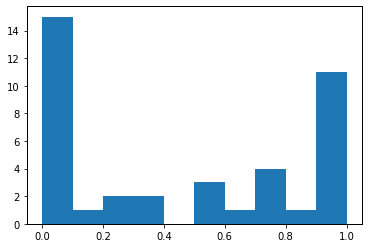

RBM4_2
bimodal


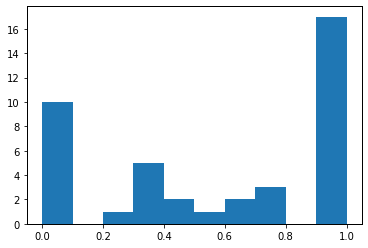

RPAIN_10
excluded


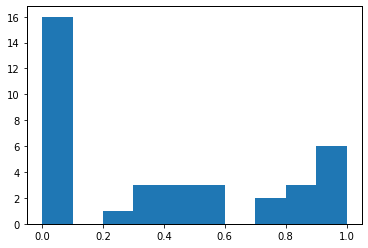

In [44]:
song_MN_bimodal = song_MN_filtered[0].loc[((song_MN_filtered[0].quantile(0.25, axis=1) <= 0.25) & (song_MN_filtered[0].quantile(0.75, axis=1) >= 0.75))].index
for event in song_MN_bimodal:
    if event in song_modalities.index:
        print(event)
        print(song_modalities.loc[event, 'MN'])
        plt.hist(song_MN_filtered[0].loc[event].dropna())
        plt.show()

In [45]:
song_modalities.loc['VPS29_3']

song_annotation    exon:chr12:110939854-110939897:-@exon:chr12:11...
iPSC                                                        excluded
NPC                                                          bimodal
MN                                                          excluded
Name: VPS29_3, dtype: object

In [46]:
song_NPC_filtered[0].shape

(49, 70)

In [47]:
((song_MN_filtered[0].quantile(0.25, axis=1) <= 0.25) & (song_MN_filtered[0].quantile(0.75, axis=1) >= 0.75)).sum()

4

TCF12_1
bimodal
0.000907528442630275
0.9712759524289458


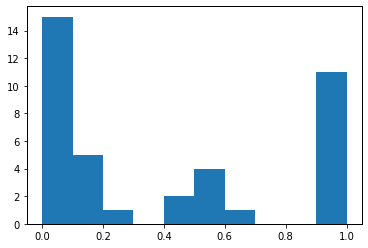

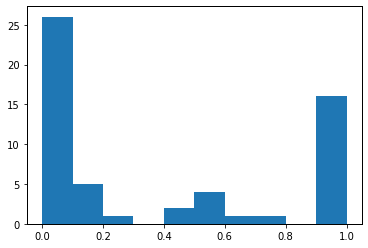

0.000907528442630275
0.9712759524289458
VPS29_3
bimodal
0.17162698412698413
1.0


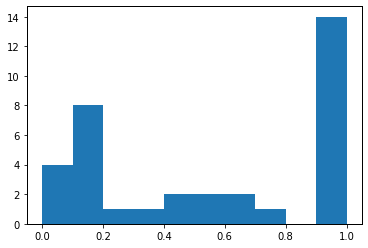

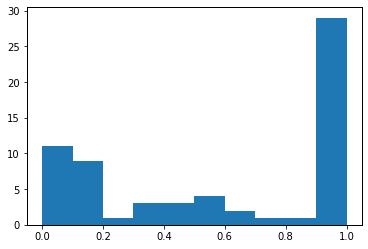

0.17162698412698413
1.0


In [48]:
for evento in [x for x in song_NPC_filtered[0].index if x in song_modalities.index]:
    if song_modalities.loc[evento, 'NPC'] == 'bimodal':
        
        
        quantile_25 = song_NPC_filtered[0].loc[evento].quantile(0.25)
        quantile_75 = song_NPC_filtered[0].loc[evento].quantile(0.75)
        
        if (quantile_25 <= 0.25) and (quantile_75 >= 0.75):
            
            print(evento)
            print(song_modalities.loc[evento, 'NPC'])
        
            print(quantile_25)
            print(quantile_75)
            plt.hist(song_NPC_filtered[0].loc[evento].dropna())
            plt.show()
            
            
            quantile_25_unfiltered = song_PSI.loc[evento, song_NPC].quantile(0.25)
            quantile_75_unfiltered = song_PSI.loc[evento, song_NPC].quantile(0.75)
            #if (quantile_25_unfiltered <= 0.25) and (quantile_75_unfiltered >= 0.75):
            plt.hist(song_PSI.loc[evento, song_NPC].dropna())
            plt.show()
            
#         else:
            print(quantile_25)
            print(quantile_75)
            
            
        
        

AKAP9_3
bimodal
0.028111416151910318
1.0


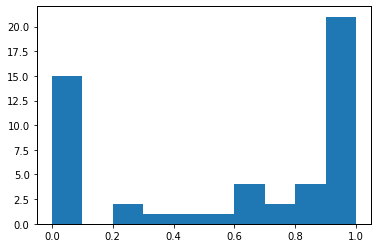

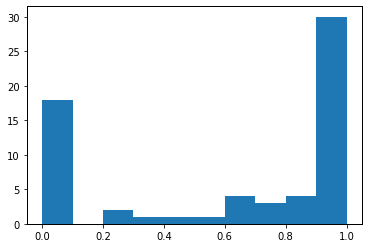

0.028111416151910318
1.0
BAZ2B_1
bimodal
0.003993833327961667
0.9910456369994731


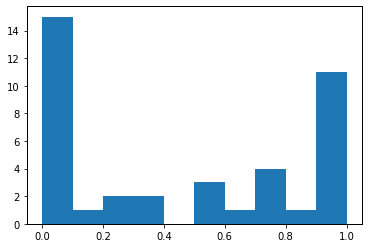

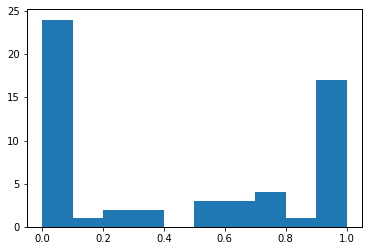

0.003993833327961667
0.9910456369994731
RBM4_2
bimodal
0.22508591065292094
1.0


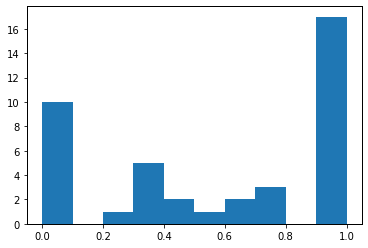

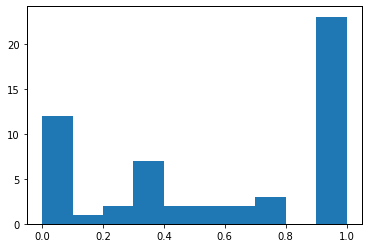

0.22508591065292094
1.0
RPAIN_10
excluded
0.0
0.7584369449378331


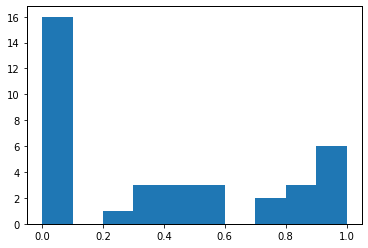

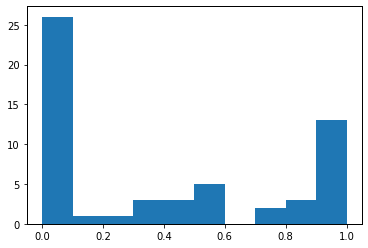

0.0
0.7584369449378331


In [49]:
for evento in [x for x in song_MN_filtered[0].index if x in song_modalities.index]:
    if song_modalities.loc[evento, 'MN'] == 'bimodal':
        
        
        quantile_25 = song_MN_filtered[0].loc[evento].quantile(0.25)
        quantile_75 = song_MN_filtered[0].loc[evento].quantile(0.75)
        
        if (quantile_25 <= 0.25) and (quantile_75 >= 0.75):
            
            print(evento)
            print(song_modalities.loc[evento, 'MN'])
        
            print(quantile_25)
            print(quantile_75)
            plt.hist(song_MN_filtered[0].loc[evento].dropna())
            plt.show()
            
            
            quantile_25_unfiltered = song_PSI.loc[evento, song_MN].quantile(0.25)
            quantile_75_unfiltered = song_PSI.loc[evento, song_MN].quantile(0.75)
            #if (quantile_25_unfiltered <= 0.25) and (quantile_75_unfiltered >= 0.75):
            plt.hist(song_PSI.loc[evento, song_MN].dropna())
            plt.show()
            
#         else:
            print(quantile_25)
            print(quantile_75)
            
            
    else:
        
        
        quantile_25 = song_MN_filtered[0].loc[evento].quantile(0.25)
        quantile_75 = song_MN_filtered[0].loc[evento].quantile(0.75)
        
        if (quantile_25 <= 0.25) and (quantile_75 >= 0.75):
            
            print(evento)
            print(song_modalities.loc[evento, 'MN'])
        
            print(quantile_25)
            print(quantile_75)
            plt.hist(song_MN_filtered[0].loc[evento].dropna())
            plt.show()
            
            
            quantile_25_unfiltered = song_PSI.loc[evento, song_MN].quantile(0.25)
            quantile_75_unfiltered = song_PSI.loc[evento, song_MN].quantile(0.75)
            #if (quantile_25_unfiltered <= 0.25) and (quantile_75_unfiltered >= 0.75):
            plt.hist(song_PSI.loc[evento, song_MN].dropna())
            plt.show()
            
#         else:
            print(quantile_25)
            print(quantile_75)
            
        
        

In [50]:
print((song_modalities.iPSC == 'bimodal').sum())
print((len(song_modalities) - (song_modalities.iPSC == '-').sum()))
print((song_modalities.iPSC == 'bimodal').sum() / (len(song_modalities) - (song_modalities.iPSC == '-').sum()))

2835
8895
0.31871838111298484


In [51]:
print((song_modalities.NPC == 'bimodal').sum())
print((len(song_modalities) - (song_modalities.NPC == '-').sum()))
print((song_modalities.NPC == 'bimodal').sum() / (len(song_modalities) - (song_modalities.NPC == '-').sum()))

1981
6539
0.3029515216393944


In [52]:
print((song_modalities.MN == 'bimodal').sum())
print((len(song_modalities) - (song_modalities.MN == '-').sum()))
print((song_modalities.MN == 'bimodal').sum() / (len(song_modalities) - (song_modalities.MN == '-').sum()))

1131
4156
0.27213666987487967


In [53]:
song_outrigger = pd.read_csv('song_outrigger_psi.tab', index_col = 0)

In [54]:
outrigger_iPSC = [x for x in list(song_outrigger.index) if x[0] == 'P']
outrigger_NPC = [x for x in list(song_outrigger.index) if ((x[0] == 'C') or (x[0] == 'N'))]
outrigger_MN = [x for x in list(song_outrigger.index) if x[0] == 'M']

In [55]:
print(song_iPSC_filtered[0].shape)
print(song_NPC_filtered[0].shape)
print(song_MN_filtered[0].shape)

(102, 62)
(49, 70)
(47, 70)


AKAP9_3
bimodal
0.028111416151910318
1.0


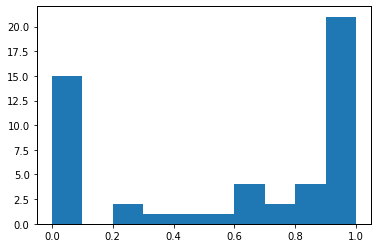

BAZ2B_1
bimodal
0.003993833327961667
0.9910456369994731


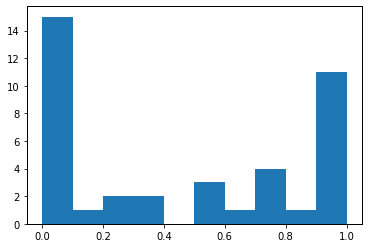

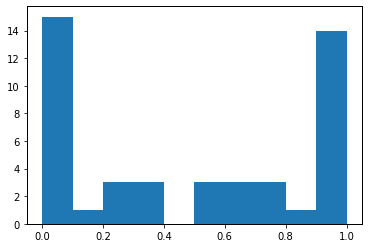

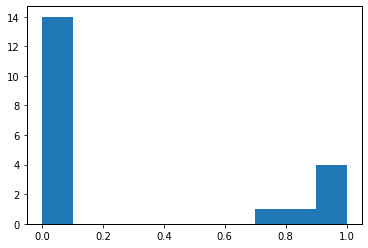

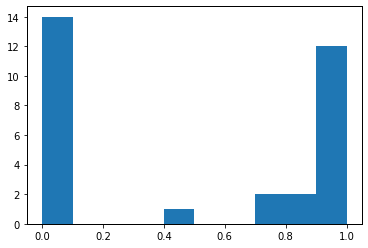

RBM4_2
bimodal
0.22508591065292094
1.0


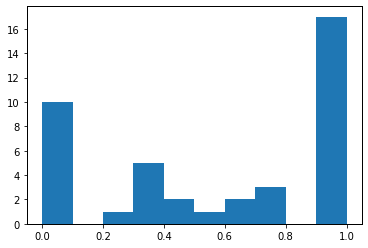

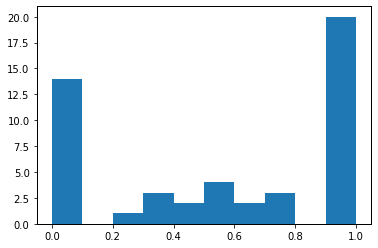

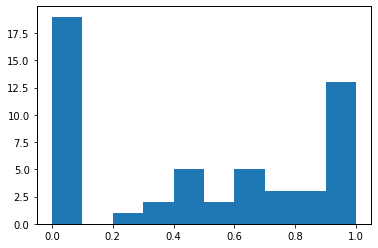

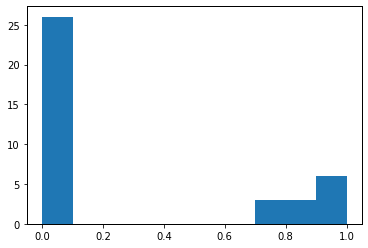

In [56]:
for evento in [x for x in song_MN_filtered[0].index if x in song_modalities.index]:
    if song_modalities.loc[evento, 'MN'] == 'bimodal':
        
        
        quantile_25 = song_MN_filtered[0].loc[evento].quantile(0.25)
        quantile_75 = song_MN_filtered[0].loc[evento].quantile(0.75)
        
        if (quantile_25 <= 0.25) and (quantile_75 >= 0.75):
            
            print(evento)
            print(song_modalities.loc[evento, 'MN'])
        
            print(quantile_25)
            print(quantile_75)
            plt.hist(song_MN_filtered[0].loc[evento].dropna())
            plt.show()
            
            
        outrigger_event = song_modalities.loc[evento, 'song_annotation']
        
        quantile_25_unfiltered = song_outrigger.loc[outrigger_MN, outrigger_event].quantile(0.25)
        quantile_75_unfiltered = song_outrigger.loc[outrigger_MN, outrigger_event].quantile(0.75)
        
        if (quantile_25_unfiltered <= 0.25) and (quantile_75_unfiltered >= 0.75):
            plt.hist(song_outrigger.loc[outrigger_MN, outrigger_event].dropna())
            plt.show()
        
        

AKAP9_3
bimodal


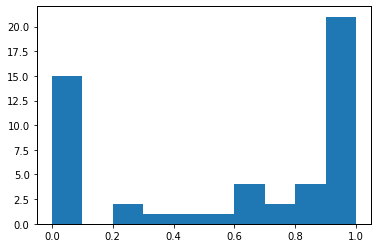

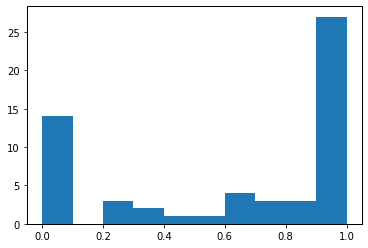

BAZ2B_1
bimodal


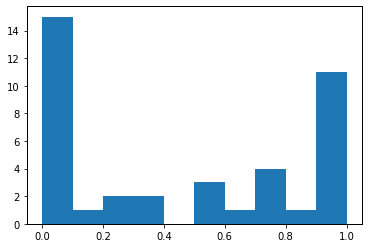

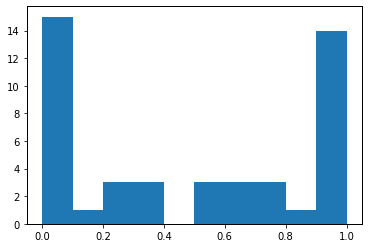

BAZ2B_4
bimodal


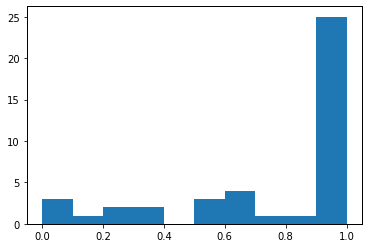

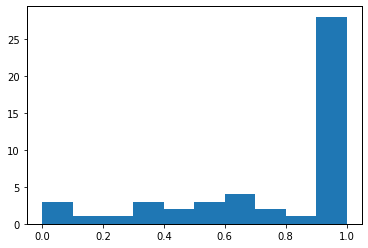

DCX_1
bimodal


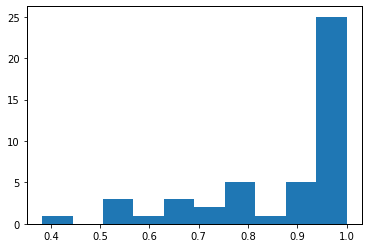

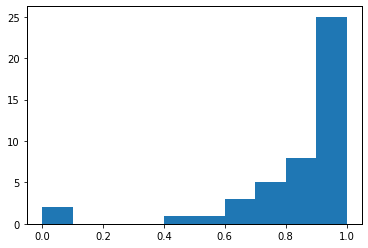

DGUOK_2
bimodal


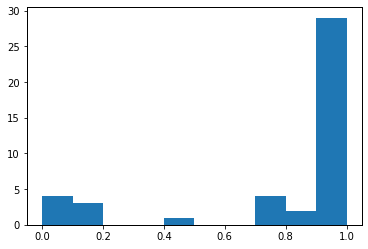

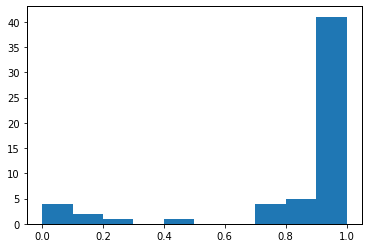

DGUOK_7
bimodal


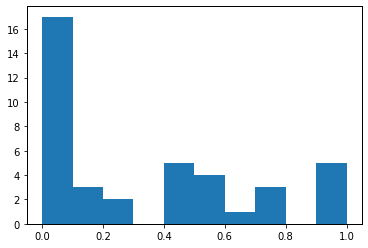

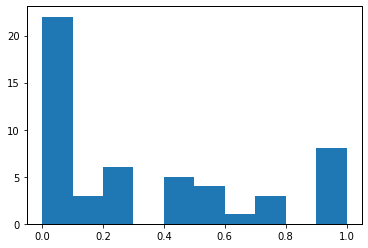

EIF3I_4
bimodal


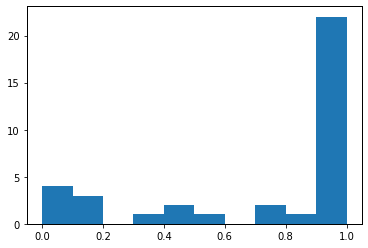

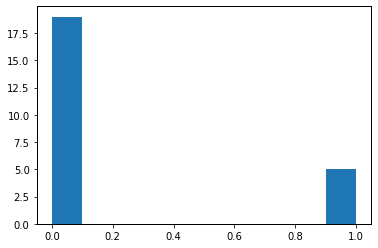

EIF3K_1
bimodal


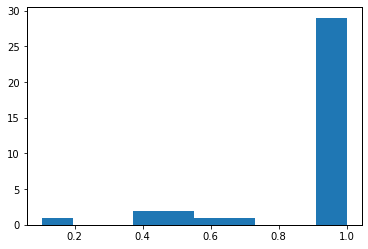

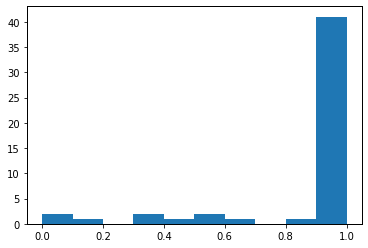

EIF4A2_4
bimodal


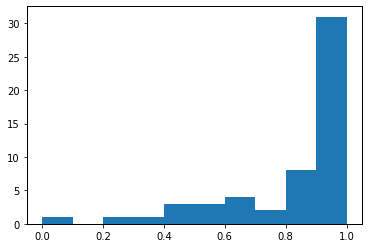

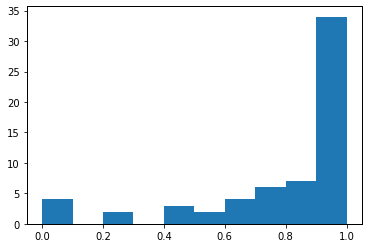

ELAVL4_2
bimodal


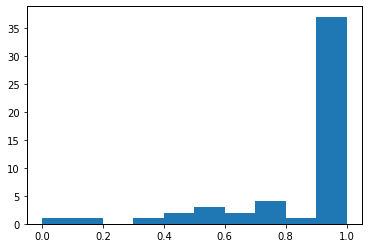

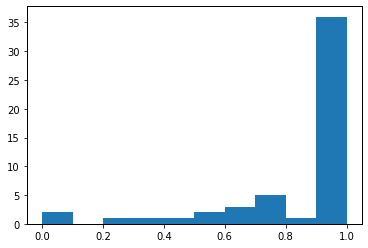

GAS5_19
bimodal


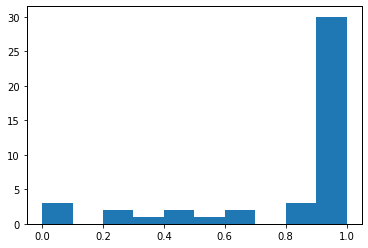

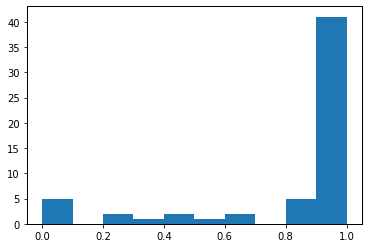

HNRNPC_1
bimodal


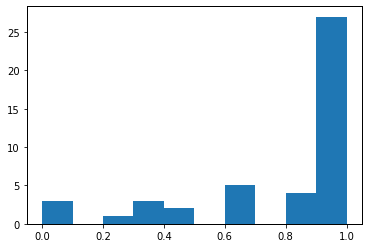

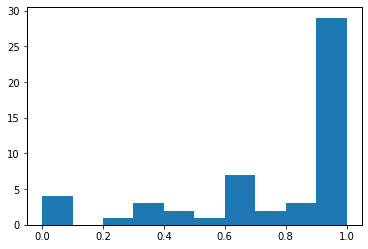

HNRNPDL_7
bimodal


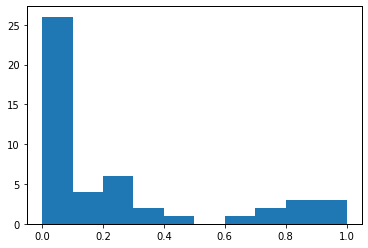

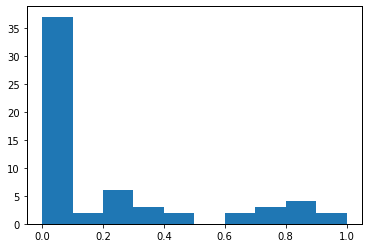

HNRNPR_4
bimodal


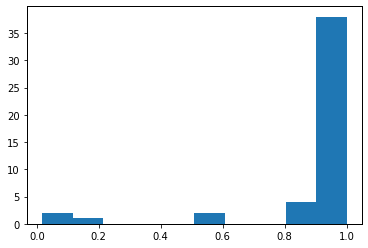

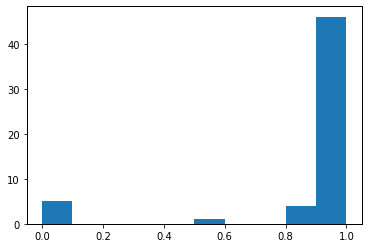

HNRNPR_6
bimodal


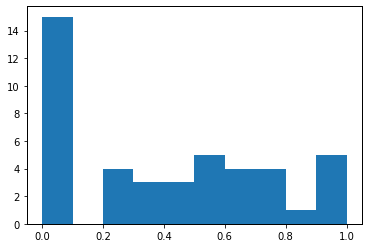

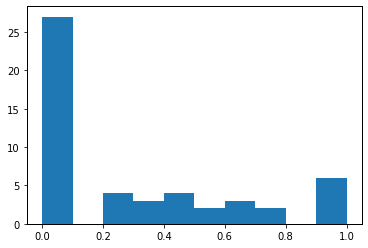

HNRNPR_7
bimodal


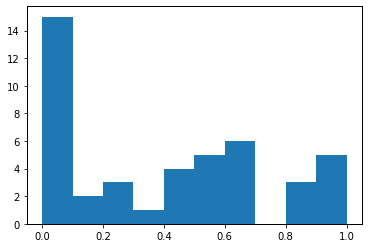

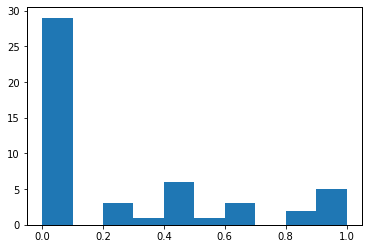

MORF4L2_1
bimodal


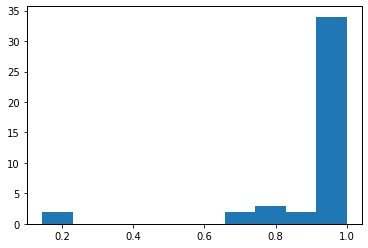

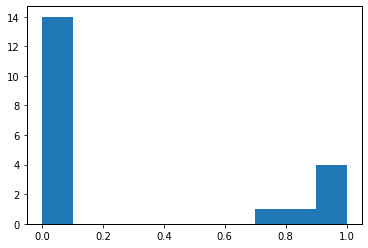

MORF4L2_3
bimodal


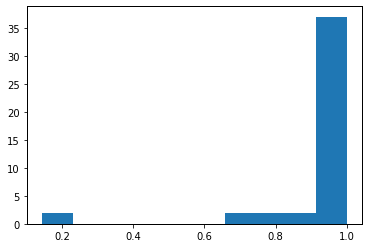

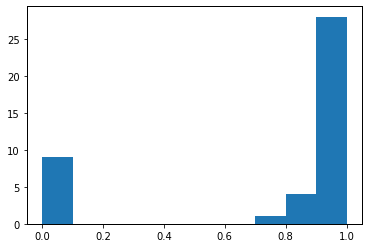

MRPL33_3
bimodal


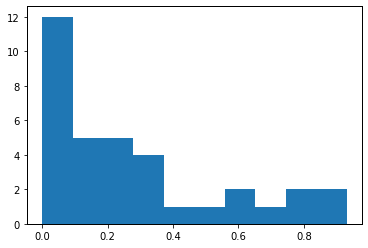

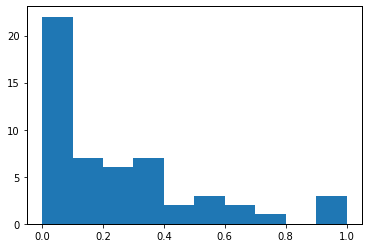

OCIAD2_9
bimodal


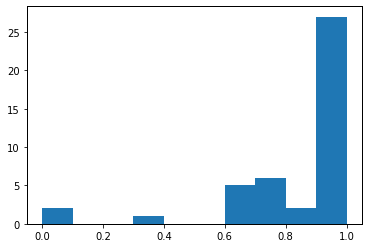

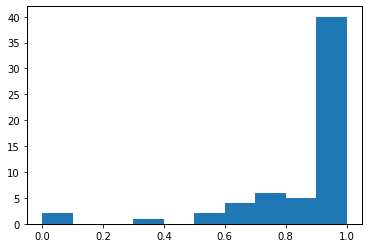

PNISR_2
bimodal


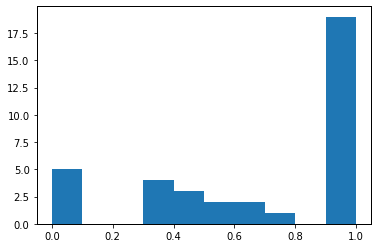

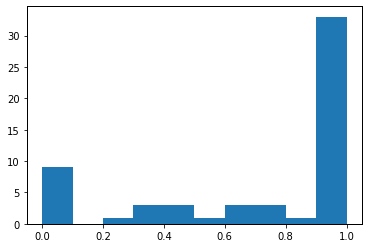

PRDX5_2
bimodal


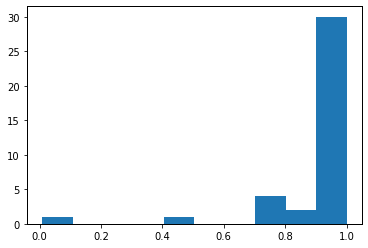

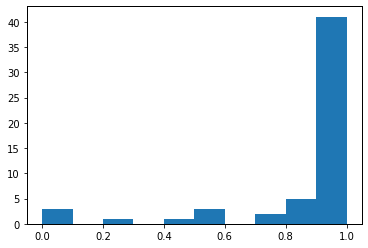

PRDX5_4
bimodal


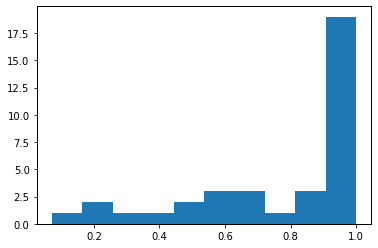

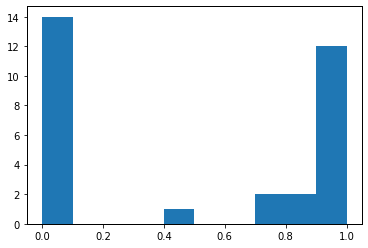

RBFOX2_1
bimodal


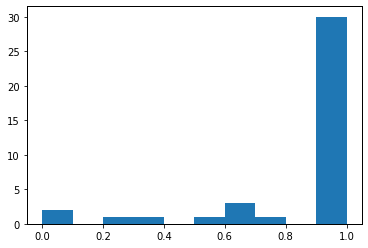

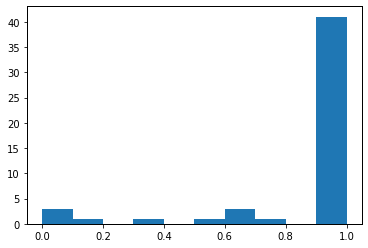

RBM39_nmdSE_2
bimodal


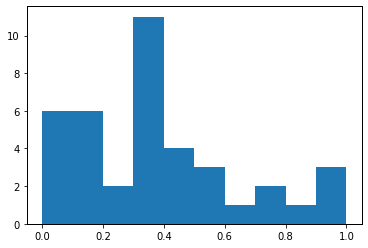

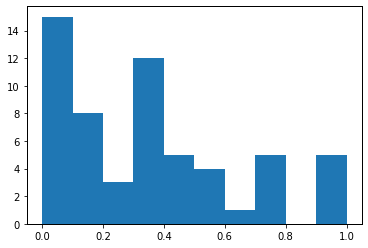

RBM4_2
bimodal


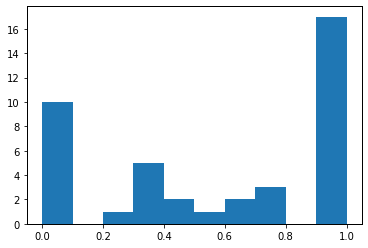

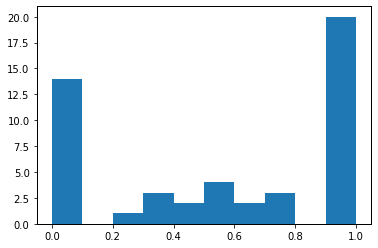

RPAIN_2
bimodal


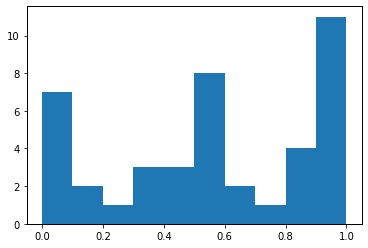

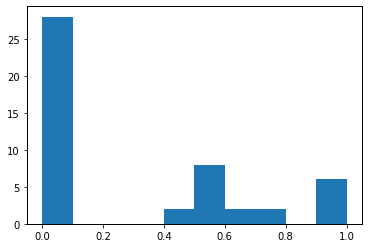

RPAIN_6
bimodal


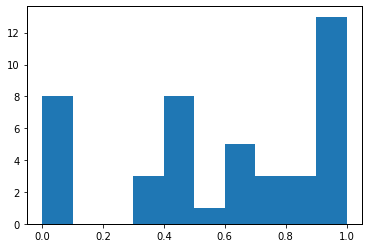

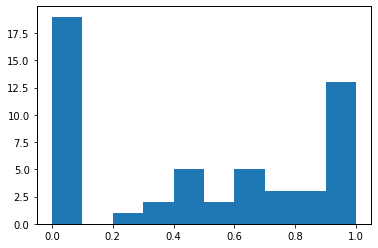

RPAIN_7
bimodal


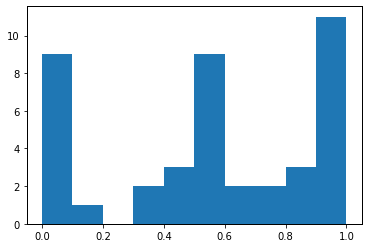

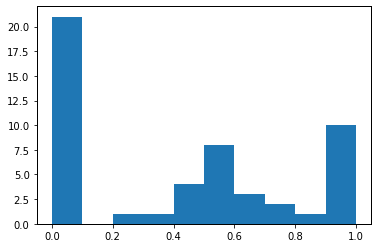

TTC3_1
bimodal


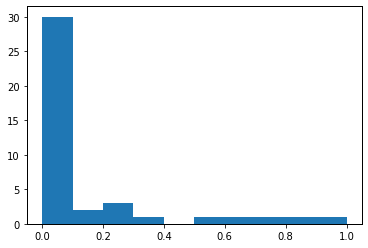

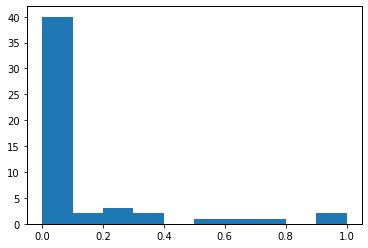

YWHAZ_2
bimodal


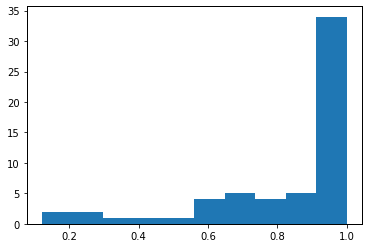

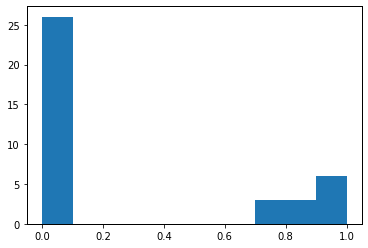

In [57]:
for evento in [x for x in song_MN_filtered[0].index if x in song_modalities.index]:
    if song_modalities.loc[evento, 'MN'] == 'bimodal':
        

        print(evento)
        print(song_modalities.loc[evento, 'MN'])

        plt.hist(song_MN_filtered[0].loc[evento].dropna())
        plt.show()
            
            
        outrigger_event = song_modalities.loc[evento, 'song_annotation']
        
        
        plt.hist(song_outrigger.loc[outrigger_MN, outrigger_event].dropna())
        plt.show()
        

ANAPC11_3
bimodal


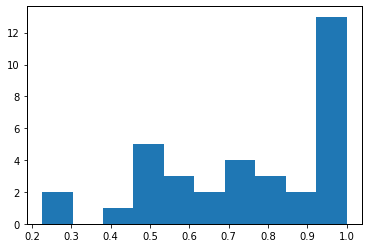

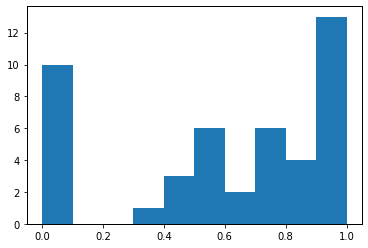

DNAJC19_5
bimodal


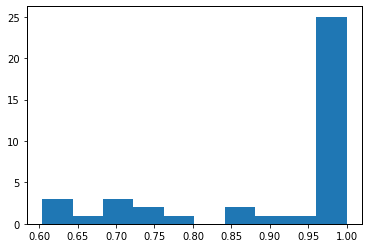

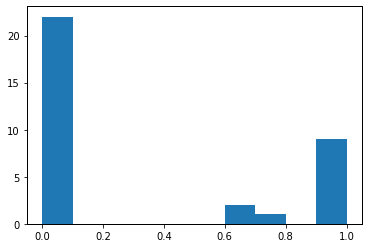

DNMT3B_2
bimodal


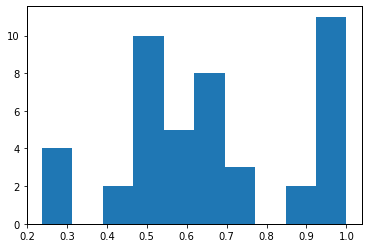

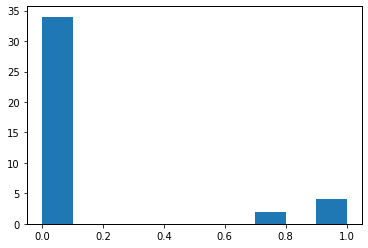

EIF4A2_3
bimodal


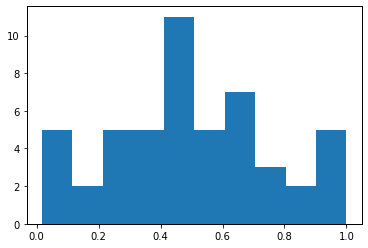

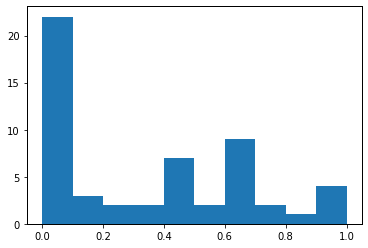

FDPS_3
bimodal


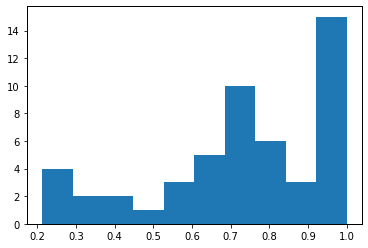

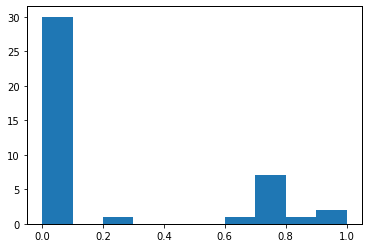

FIBP_1
bimodal


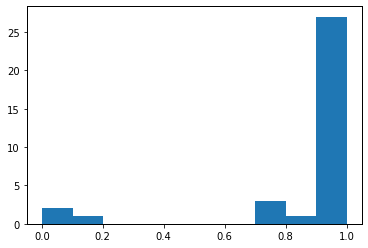

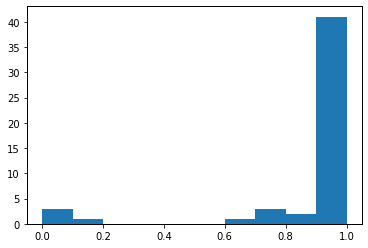

GNAS_6
bimodal


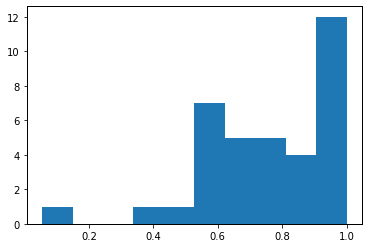

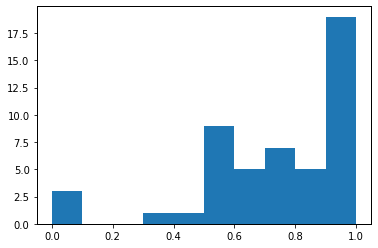

JMJD1C_7
bimodal


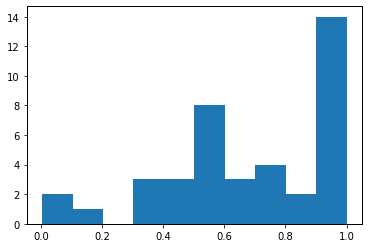

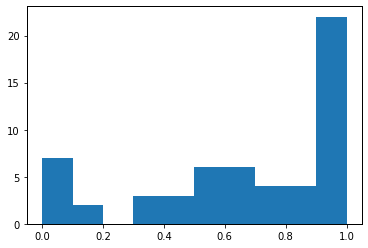

LINC00458_1
bimodal


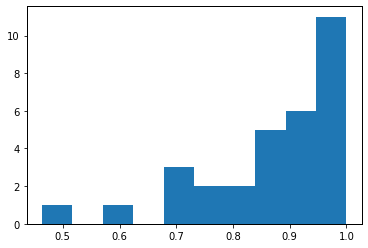

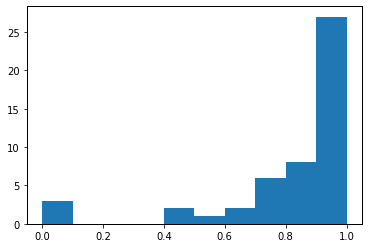

MATR3_1
bimodal


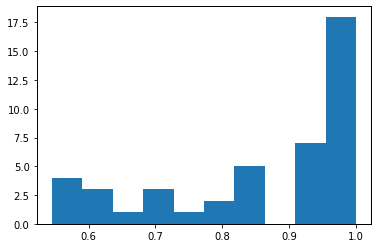

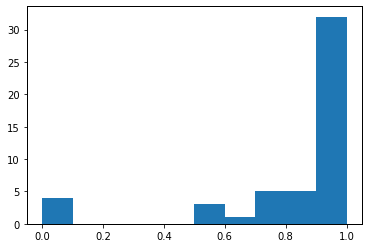

MATR3_10
bimodal


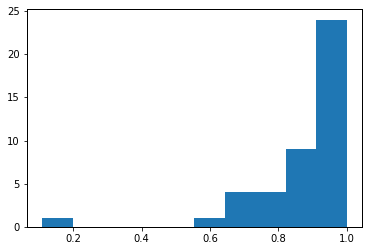

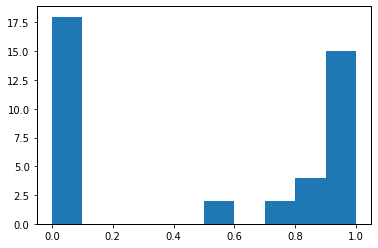

MRPL22_2
bimodal


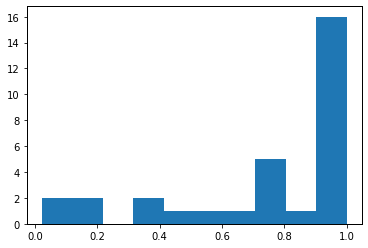

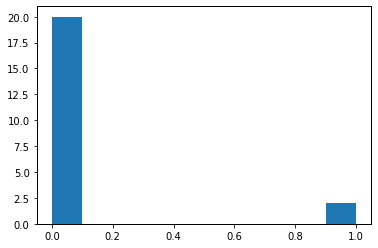

MYL6_4
bimodal


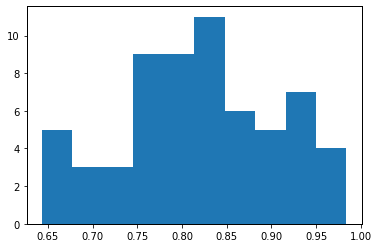

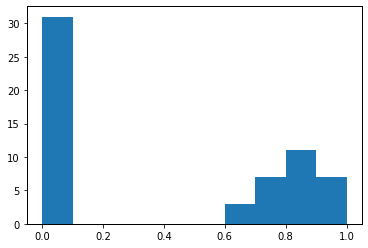

NQO2_11
bimodal


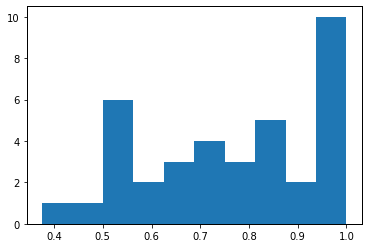

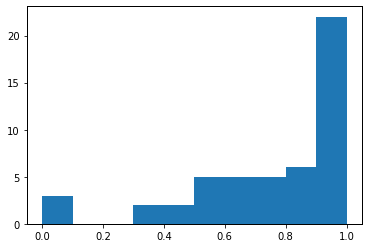

PCBP2_11
bimodal


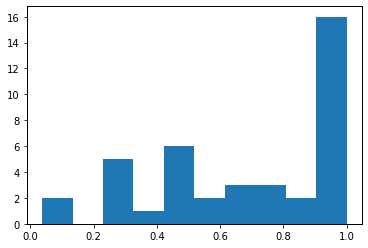

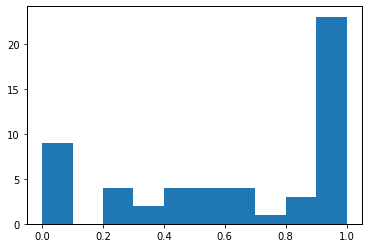

PCBP2_5
bimodal


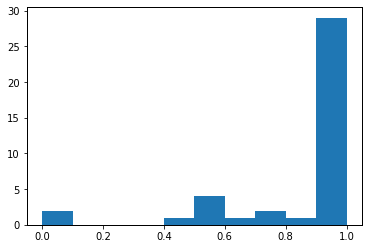

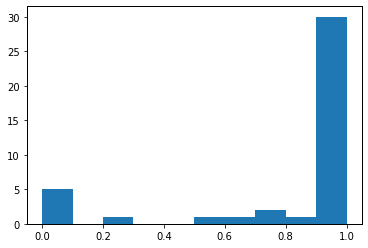

SNHG1_3
bimodal


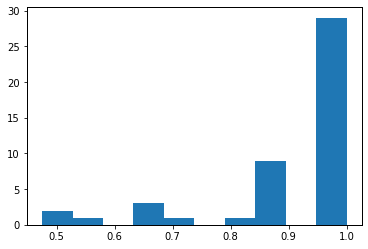

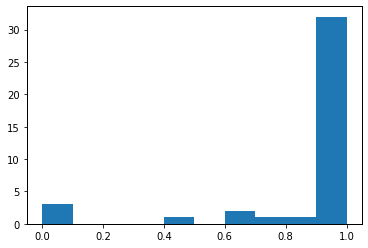

In [58]:
suma_iPSC = 0
suma_iPSC_unfiltered = 0
suma_iPSC_filtered = 0
suma_iPSC_outrigger = 0
for evento in [x for x in song_iPSC_filtered[0].index if x in song_modalities.index]:
    if song_modalities.loc[evento, 'iPSC'] == 'bimodal':
        suma_iPSC += 1

        print(evento)
        print(song_modalities.loc[evento, 'iPSC'])

        plt.hist(song_iPSC_filtered[0].loc[evento].dropna())
        plt.show()
            
            
        outrigger_event = song_modalities.loc[evento, 'song_annotation']
        
        
        plt.hist(song_outrigger.loc[outrigger_iPSC, outrigger_event].dropna())
        plt.show()
        
        
        
             
        quantile_25 = song_iPSC_filtered[0].loc[evento].quantile(0.25)
        quantile_75 = song_iPSC_filtered[0].loc[evento].quantile(0.75)
        
        if (quantile_25 <= 0.25) and (quantile_75 >= 0.75):
            
            suma_iPSC_filtered += 1
                    
        
        quantile_25_outrigger = song_outrigger.loc[outrigger_iPSC, outrigger_event].quantile(0.25)
        quantile_75_outrigger = song_outrigger.loc[outrigger_iPSC, outrigger_event].quantile(0.75)
        
        if (quantile_25_outrigger <= 0.25) and (quantile_75_outrigger >= 0.75):
            suma_iPSC_outrigger += 1
            
            
        quantile_25_unfiltered = song_PSI.loc[evento, song_iPSC].quantile(0.25)
        quantile_75_unfiltered = song_PSI.loc[evento, song_iPSC].quantile(0.75)
        
        if (quantile_25_unfiltered <= 0.25) and (quantile_75_unfiltered >= 0.75):
            suma_iPSC_unfiltered += 1
        

ANAPC11_3
bimodal


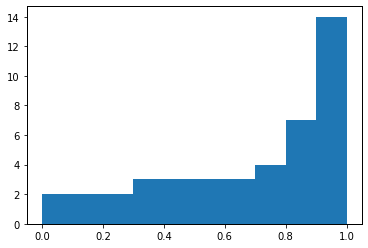

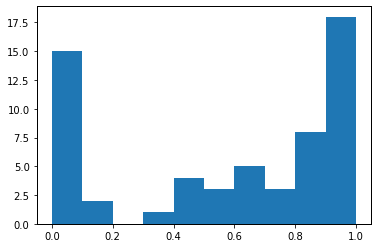

ANAPC11_6
bimodal


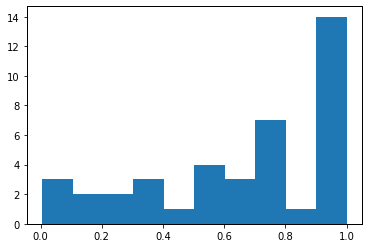

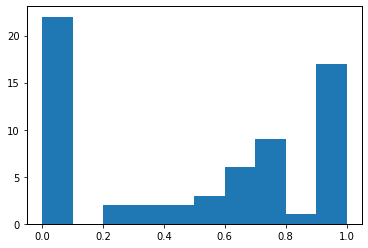

DGUOK_11
bimodal


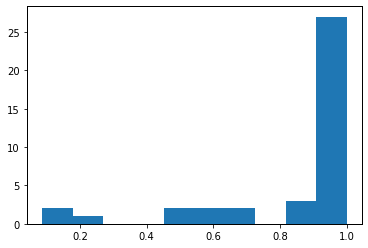

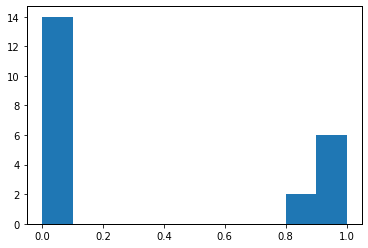

DGUOK_2
bimodal


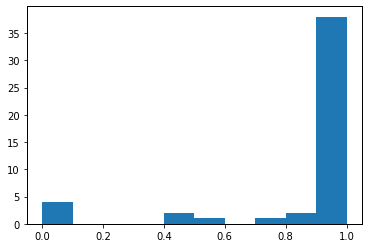

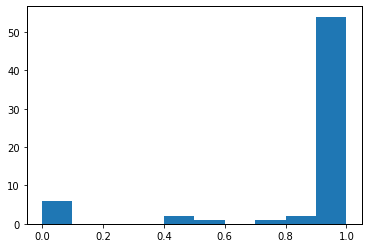

DGUOK_3
bimodal


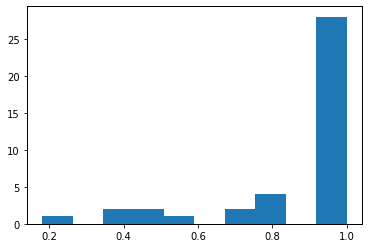

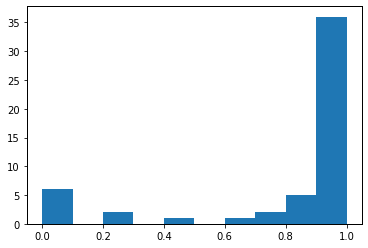

DGUOK_7
bimodal


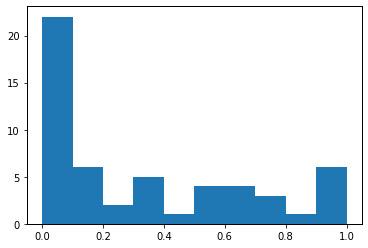

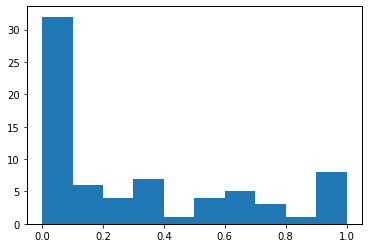

EIF3K_1
bimodal


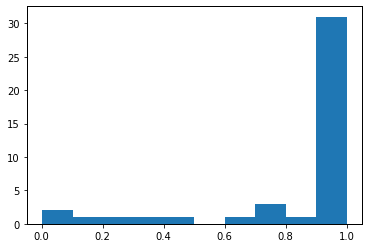

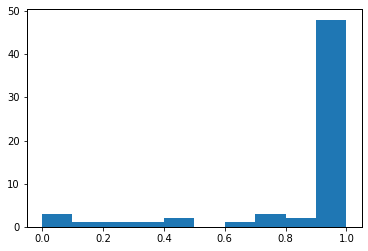

EIF4A2_3
bimodal


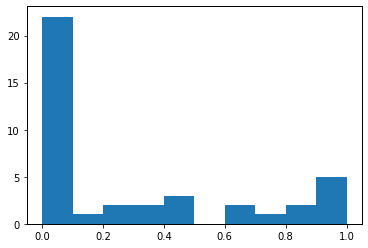

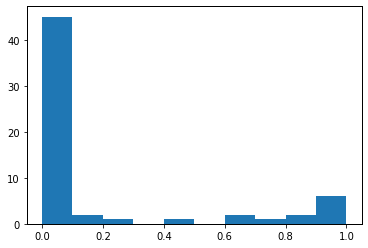

EIF4A2_4
bimodal


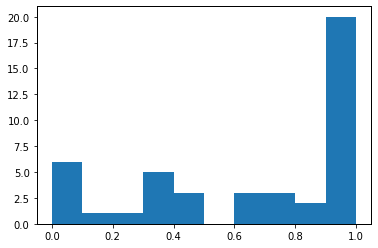

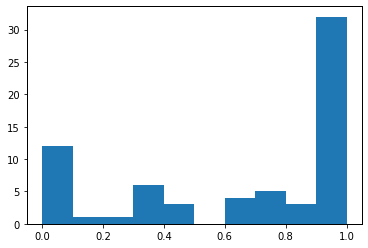

FDPS_3
bimodal


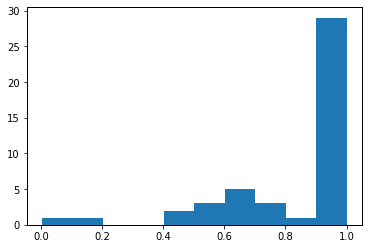

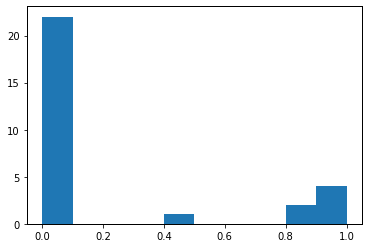

HNRNPR_6
bimodal


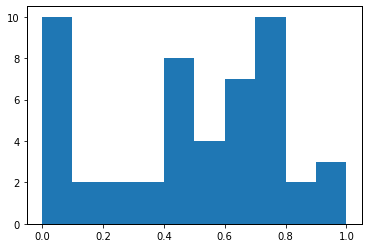

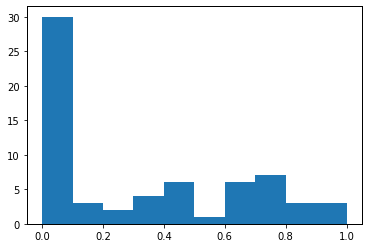

HNRNPR_7
bimodal


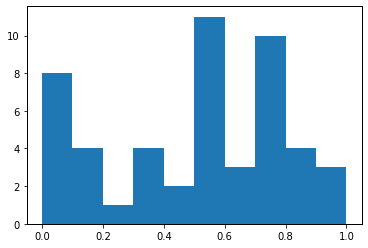

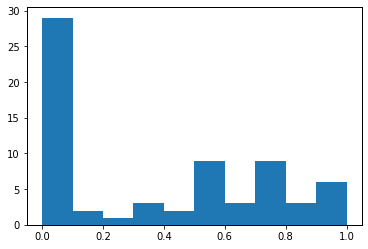

MATR3_10
bimodal


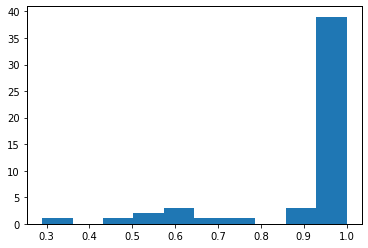

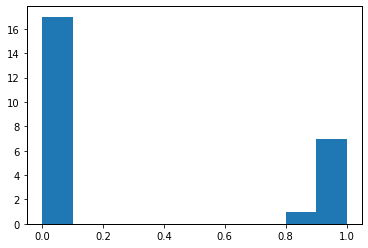

PCBP2_11
bimodal


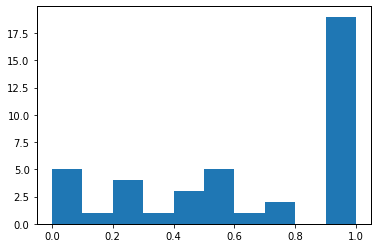

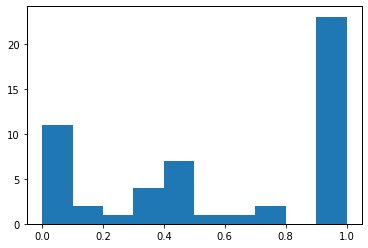

PCBP2_5
bimodal


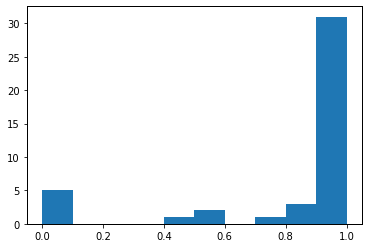

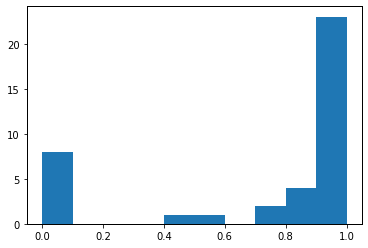

PCBP2_9
bimodal


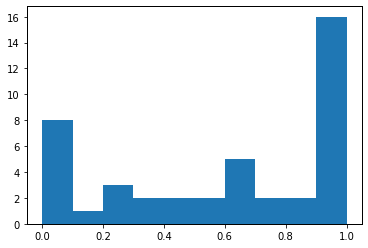

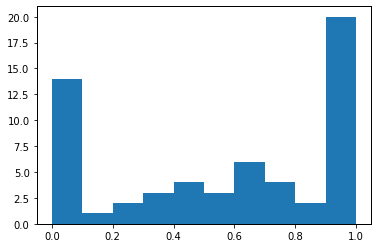

RBM4_2
bimodal


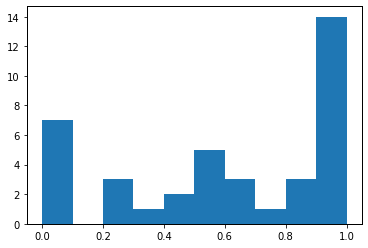

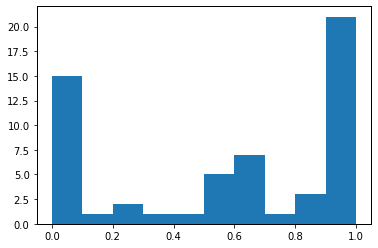

SNHG6_1
bimodal


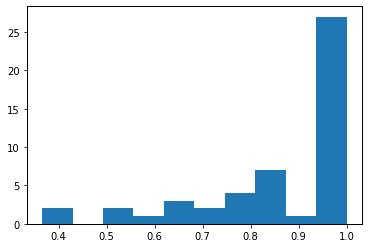

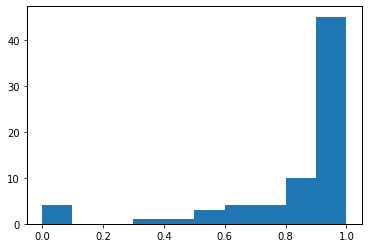

SYNCRIP_4
bimodal


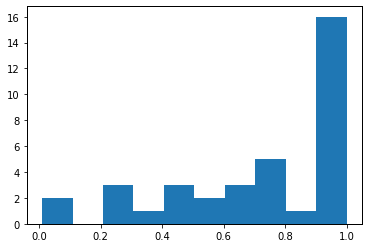

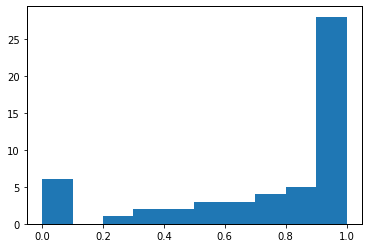

TCF12_1
bimodal


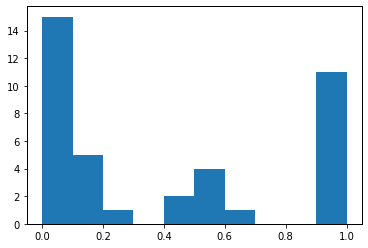

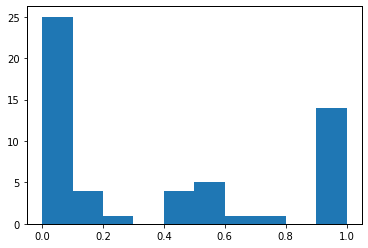

VPS29_1
bimodal


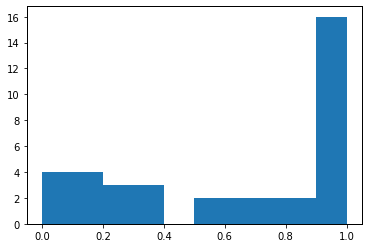

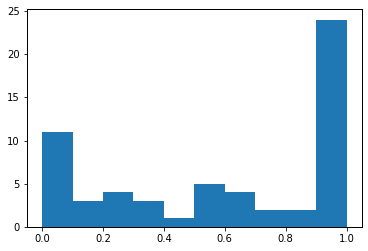

VPS29_3
bimodal


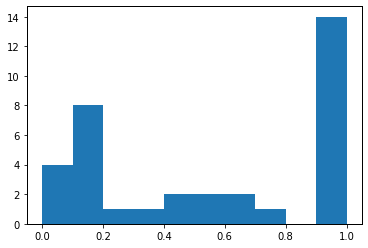

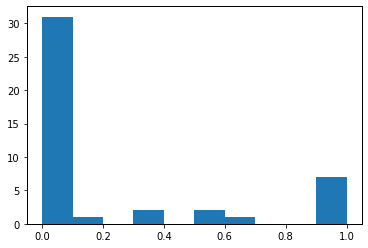

ZFAS1_3
bimodal


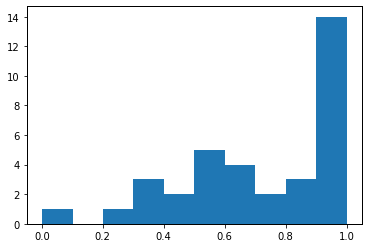

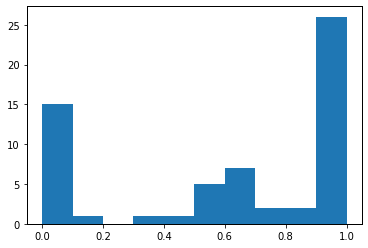

In [59]:
suma_NPC = 0
suma_NPC_unfiltered = 0
suma_NPC_filtered = 0
suma_NPC_outrigger = 0
for evento in [x for x in song_NPC_filtered[0].index if x in song_modalities.index]:
    if song_modalities.loc[evento, 'NPC'] == 'bimodal':
        suma_NPC += 1

        print(evento)
        print(song_modalities.loc[evento, 'NPC'])

        plt.hist(song_NPC_filtered[0].loc[evento].dropna())
        plt.show()
            
            
        outrigger_event = song_modalities.loc[evento, 'song_annotation']
        
        
        plt.hist(song_outrigger.loc[outrigger_NPC, outrigger_event].dropna())
        plt.show()
        
        
        
             
        quantile_25 = song_NPC_filtered[0].loc[evento].quantile(0.25)
        quantile_75 = song_NPC_filtered[0].loc[evento].quantile(0.75)
        
        if (quantile_25 <= 0.25) and (quantile_75 >= 0.75):
            
            suma_NPC_filtered += 1
                    
        
        quantile_25_outrigger = song_outrigger.loc[outrigger_NPC, outrigger_event].quantile(0.25)
        quantile_75_outrigger = song_outrigger.loc[outrigger_NPC, outrigger_event].quantile(0.75)
        
        if (quantile_25_outrigger <= 0.25) and (quantile_75_outrigger >= 0.75):
            suma_NPC_outrigger += 1
            
            
        quantile_25_unfiltered = song_PSI.loc[evento, song_NPC].quantile(0.25)
        quantile_75_unfiltered = song_PSI.loc[evento, song_NPC].quantile(0.75)
        
        if (quantile_25_unfiltered <= 0.25) and (quantile_75_unfiltered >= 0.75):
            suma_NPC_unfiltered += 1
        

AKAP9_3
bimodal


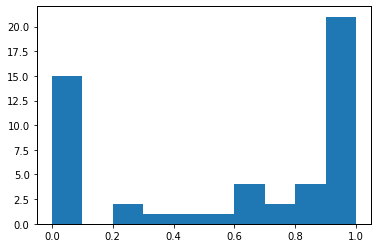

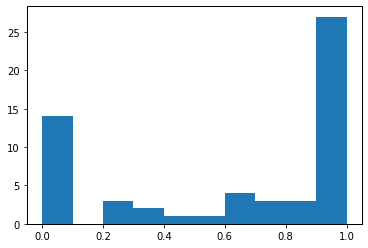

BAZ2B_1
bimodal


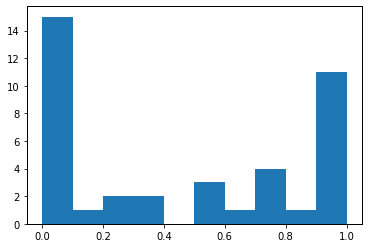

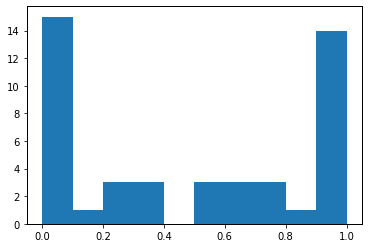

BAZ2B_4
bimodal


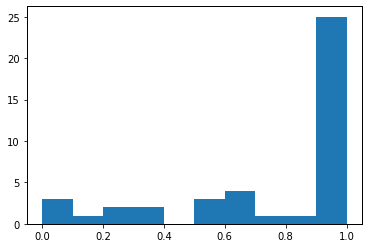

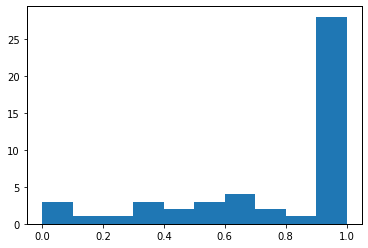

DCX_1
bimodal


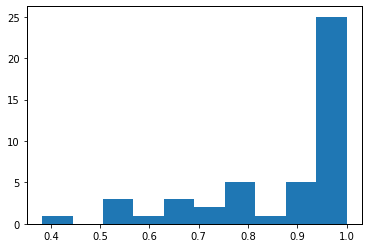

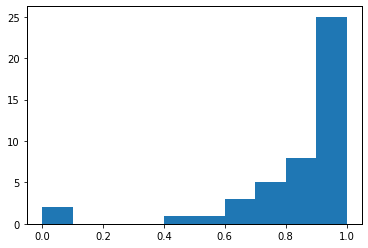

DGUOK_2
bimodal


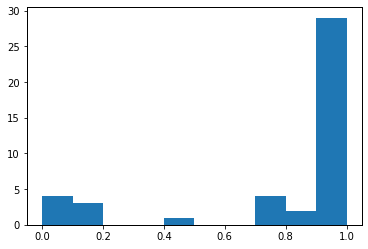

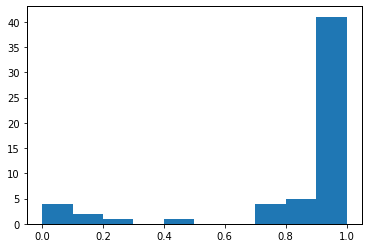

DGUOK_7
bimodal


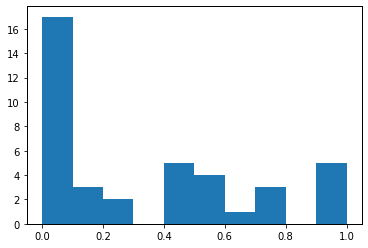

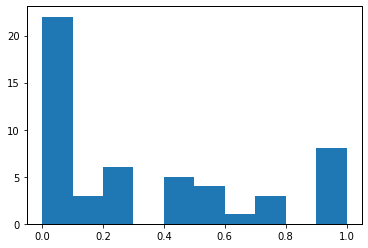

EIF3I_4
bimodal


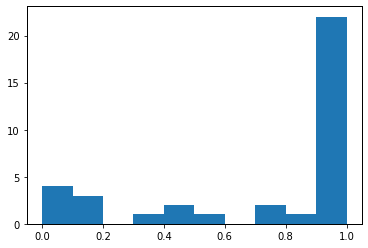

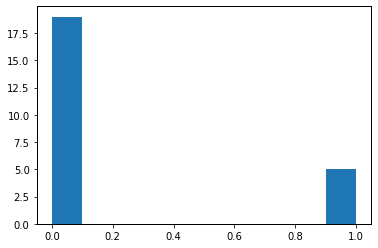

EIF3K_1
bimodal


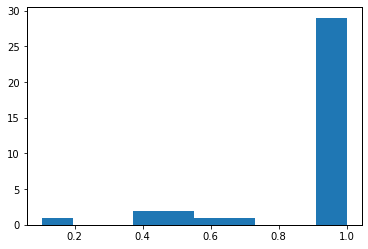

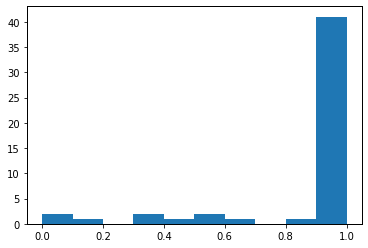

EIF4A2_4
bimodal


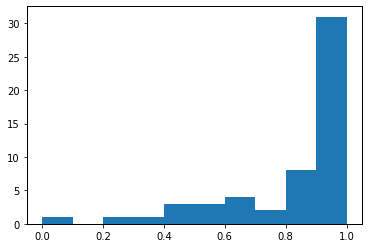

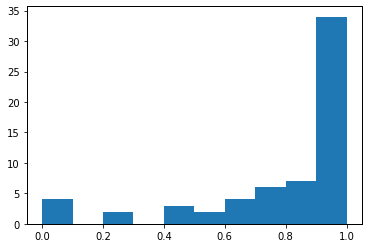

ELAVL4_2
bimodal


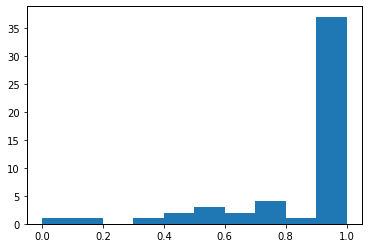

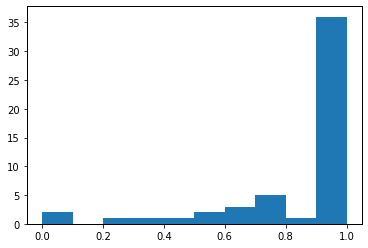

GAS5_19
bimodal


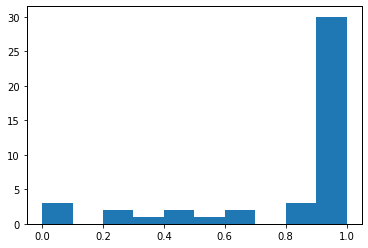

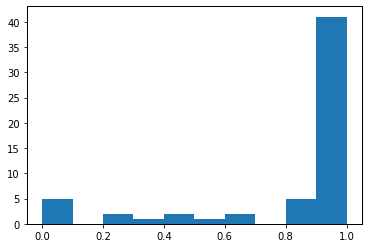

HNRNPC_1
bimodal


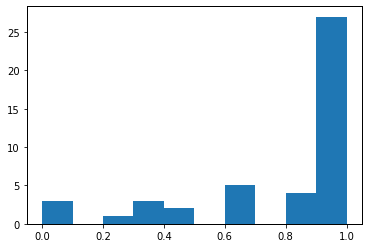

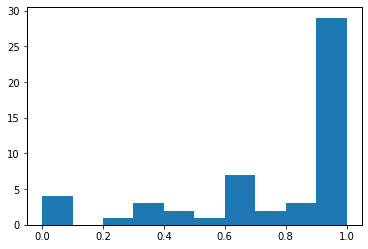

HNRNPDL_7
bimodal


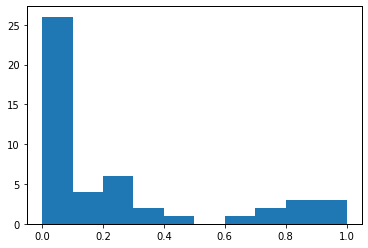

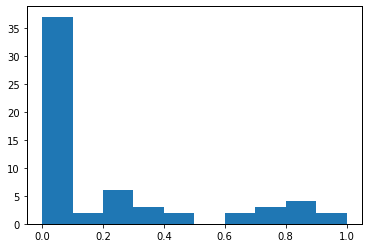

HNRNPR_4
bimodal


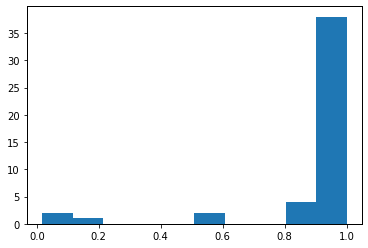

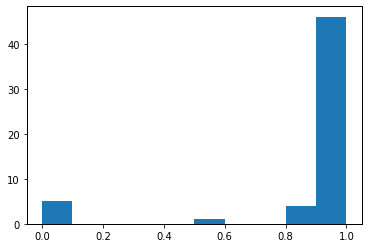

HNRNPR_6
bimodal


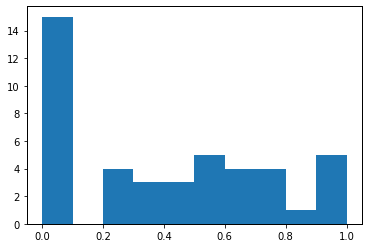

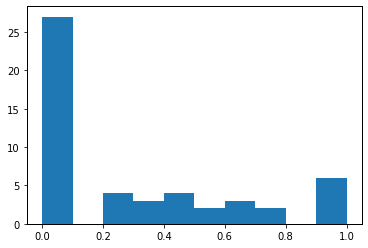

HNRNPR_7
bimodal


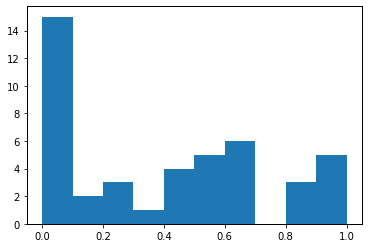

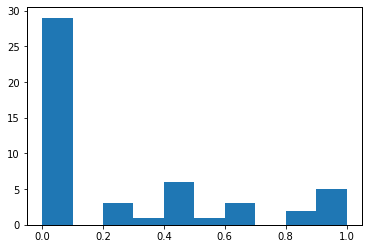

MORF4L2_1
bimodal


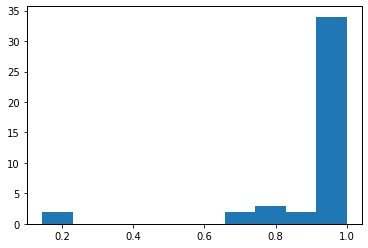

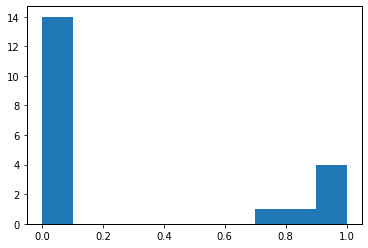

MORF4L2_3
bimodal


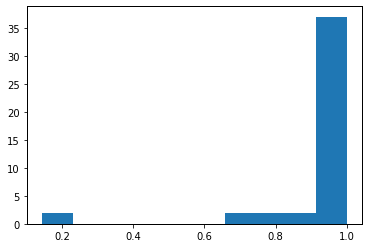

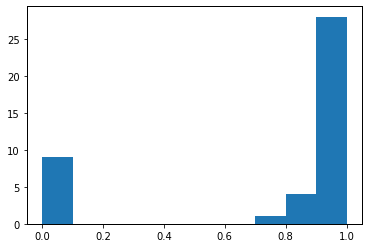

MRPL33_3
bimodal


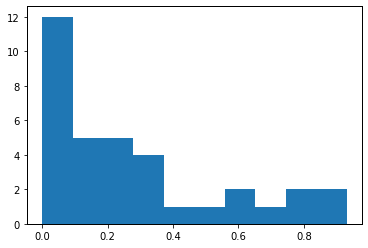

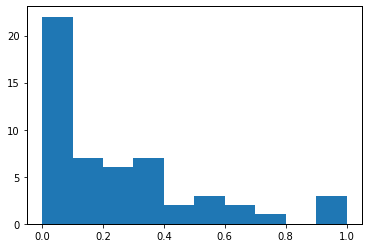

OCIAD2_9
bimodal


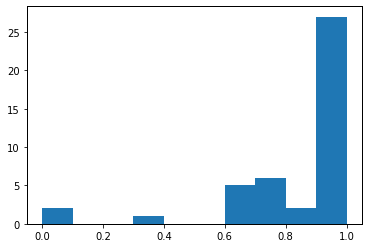

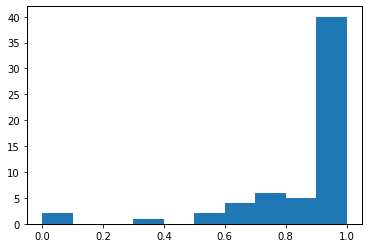

PNISR_2
bimodal


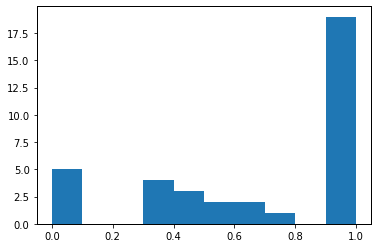

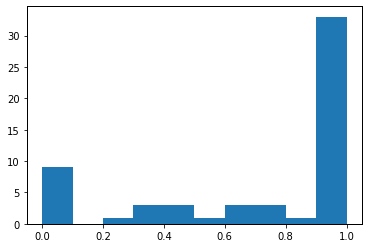

PRDX5_2
bimodal


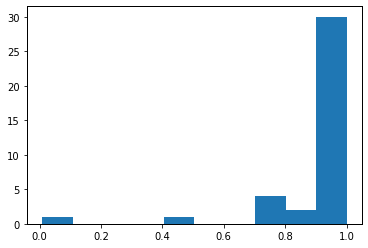

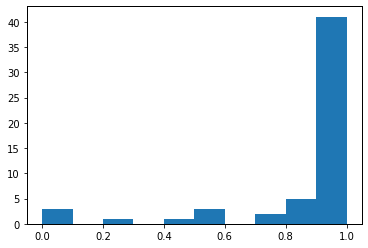

PRDX5_4
bimodal


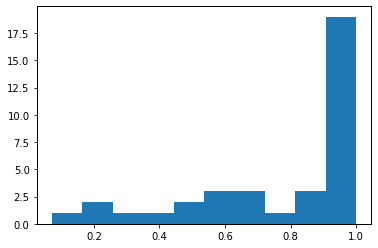

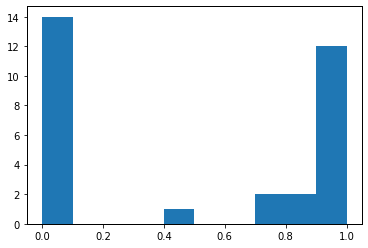

RBFOX2_1
bimodal


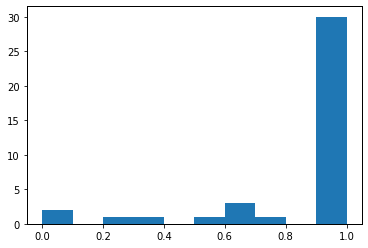

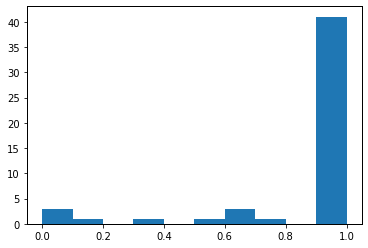

RBM39_nmdSE_2
bimodal


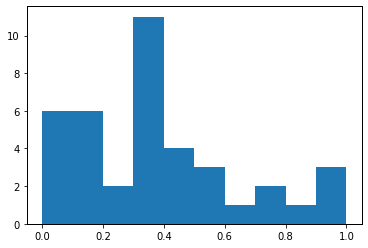

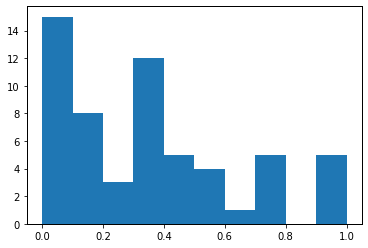

RBM4_2
bimodal


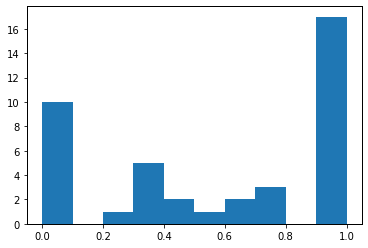

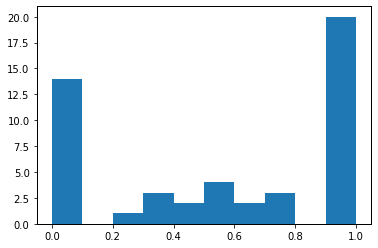

RPAIN_2
bimodal


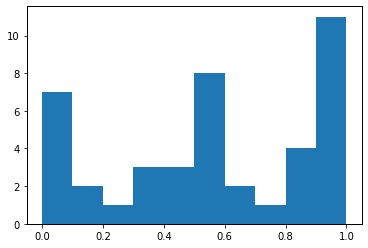

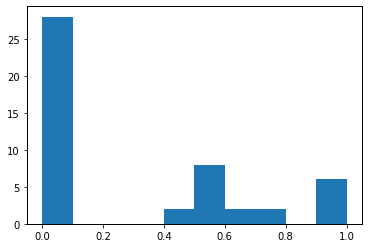

RPAIN_6
bimodal


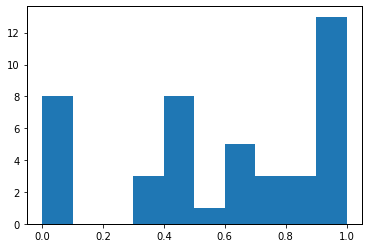

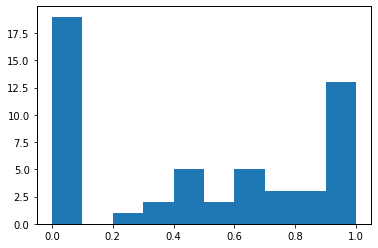

RPAIN_7
bimodal


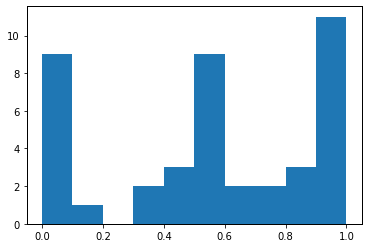

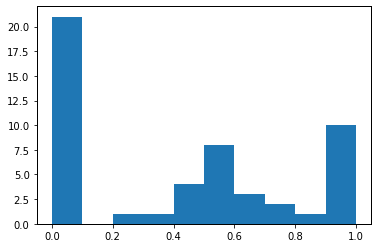

TTC3_1
bimodal


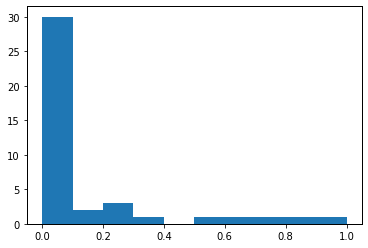

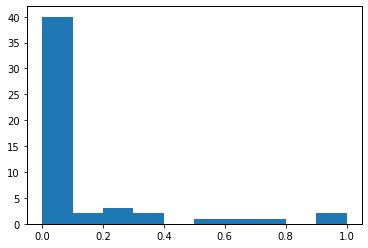

YWHAZ_2
bimodal


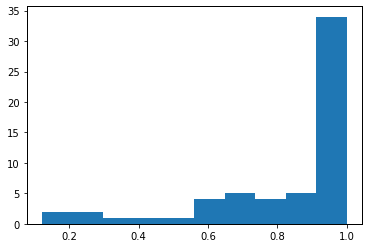

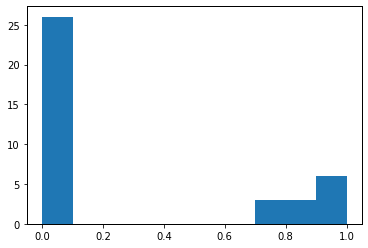

In [60]:
suma_MN = 0
suma_MN_unfiltered = 0
suma_MN_filtered = 0
suma_MN_outrigger = 0
for evento in [x for x in song_MN_filtered[0].index if x in song_modalities.index]:
    if song_modalities.loc[evento, 'MN'] == 'bimodal':
        suma_MN += 1

        print(evento)
        print(song_modalities.loc[evento, 'MN'])

        plt.hist(song_MN_filtered[0].loc[evento].dropna())
        plt.show()
            
            
        outrigger_event = song_modalities.loc[evento, 'song_annotation']
        
        
        plt.hist(song_outrigger.loc[outrigger_MN, outrigger_event].dropna())
        plt.show()
        
        
        
             
        quantile_25 = song_MN_filtered[0].loc[evento].quantile(0.25)
        quantile_75 = song_MN_filtered[0].loc[evento].quantile(0.75)
        
        if (quantile_25 <= 0.25) and (quantile_75 >= 0.75):
            
            suma_MN_filtered += 1
                    
        
        quantile_25_outrigger = song_outrigger.loc[outrigger_MN, outrigger_event].quantile(0.25)
        quantile_75_outrigger = song_outrigger.loc[outrigger_MN, outrigger_event].quantile(0.75)
        
        if (quantile_25_outrigger <= 0.25) and (quantile_75_outrigger >= 0.75):
            suma_MN_outrigger += 1
            
            
        quantile_25_unfiltered = song_PSI.loc[evento, song_MN].quantile(0.25)
        quantile_75_unfiltered = song_PSI.loc[evento, song_MN].quantile(0.75)
        
        if (quantile_25_unfiltered <= 0.25) and (quantile_75_unfiltered >= 0.75):
            suma_MN_unfiltered += 1
        

In [61]:
suma_iPSC/song_iPSC_filtered[0].shape[0]

0.16666666666666666

In [62]:
suma_iPSC_outrigger/song_iPSC_filtered[0].shape[0]

0.029411764705882353

In [63]:
suma_iPSC_outrigger

3

In [64]:
suma_MN_outrigger

6

In [65]:
quantile_75_unfiltered

1.0

In [66]:
6/song_MN_filtered[0].shape[0]

0.1276595744680851

In [67]:
suma_NPC/song_NPC_filtered[0].shape[0]

0.46938775510204084

In [68]:
suma_NPC_filtered/49

0.04081632653061224

In [69]:
10/song_NPC_filtered[0].shape[0]

0.20408163265306123

In [70]:
3/102

0.029411764705882353

In [126]:
song_unfilt_selected = song_PSI.loc[(song_PSI[song_iPSC].isna().mean(axis = 1) <= 0.75) & (np.abs(0.5-song_PSI[song_iPSC].mean(axis = 1)) <= 0.3), song_iPSC]
suma_iPSC_unfiltered_all = 0
for evento in song_unfilt_selected.index:
             
    quantile_25 = song_unfilt_selected.loc[evento].quantile(0.25)
    quantile_75 = song_unfilt_selected.loc[evento].quantile(0.75)
        
    if (quantile_25 <= 0.25) and (quantile_75 >= 0.75):

        suma_iPSC_unfiltered_all += 1
                    

In [127]:
suma_iPSC_unfiltered_all / song_unfilt_selected.shape[0]

0.5099337748344371

In [128]:
song_iPSC_filtered[0].shape[0] / song_unfilt_selected.shape[0]

0.08443708609271523

In [129]:
song_iPSC_filtered[0].shape[0]

102

In [130]:
song_unfilt_selected.shape[0]

1208

In [131]:
song_unfilt_selected = song_PSI.loc[(song_PSI[song_NPC].isna().mean(axis = 1) <= 0.75) & (np.abs(0.5-song_PSI[song_NPC].mean(axis = 1)) <= 0.3), song_NPC]
suma_NPC_unfiltered_all = 0
for evento in song_unfilt_selected.index:
             
    quantile_25 = song_unfilt_selected.loc[evento].quantile(0.25)
    quantile_75 = song_unfilt_selected.loc[evento].quantile(0.75)
        
    if (quantile_25 <= 0.25) and (quantile_75 >= 0.75):

        suma_NPC_unfiltered_all += 1
                    

In [132]:
suma_NPC_unfiltered_all/song_unfilt_selected.shape[0]

0.5741324921135647

In [133]:
suma_NPC_filtered/song_NPC_filtered[0].shape[0]

0.04081632653061224

In [134]:
song_unfilt_selected = song_PSI.loc[(song_PSI[song_MN].isna().mean(axis = 1) <= 0.75) & (np.abs(0.5-song_PSI[song_MN].mean(axis = 1)) <= 0.3), song_MN]
suma_MN_unfiltered_all = 0
for evento in song_unfilt_selected.index:
             
    quantile_25 = song_unfilt_selected.loc[evento].quantile(0.25)
    quantile_75 = song_unfilt_selected.loc[evento].quantile(0.75)
        
    if (quantile_25 <= 0.25) and (quantile_75 >= 0.75):

        suma_MN_unfiltered_all += 1
                    

In [135]:
suma_MN_unfiltered_all/song_unfilt_selected.shape[0]

0.5363790186125211

In [136]:
song_unfilt_selected.shape

(591, 70)

In [155]:
song_iPSC_filtered = process_subpop(song_iPSC, song_PSI, song_mrna_counts, 
                                    mrna_per_event_song, song_read_counts, song_coverage_tab['SJ_coverage'], 0.1, 10)
song_NPC_filtered = process_subpop(song_NPC, song_PSI, song_mrna_counts, 
                                  mrna_per_event_song, song_read_counts, song_coverage_tab['SJ_coverage'], 0.1, 10)
song_MN_filtered = process_subpop(song_MN, song_PSI, song_mrna_counts, 
                                  mrna_per_event_song, song_read_counts, song_coverage_tab['SJ_coverage'], 0.1, 10)


In [156]:
song_iPSC_unfiltered = song_PSI.loc[(song_PSI[song_iPSC].isna().mean(axis = 1) <= 0.75) & (np.abs(0.5-song_PSI[song_iPSC].mean(axis = 1)) <= 0.4), song_iPSC]
song_NPC_unfiltered = song_PSI.loc[(song_PSI[song_NPC].isna().mean(axis = 1) <= 0.75) & (np.abs(0.5-song_PSI[song_NPC].mean(axis = 1)) <= 0.4), song_NPC]
song_MN_unfiltered = song_PSI.loc[(song_PSI[song_MN].isna().mean(axis = 1) <= 0.75) & (np.abs(0.5-song_PSI[song_MN].mean(axis = 1)) <= 0.4), song_MN]


In [162]:
song_iPSC_filtered[0].mean(axis=1).min()

0.10145187285206692

In [169]:
song_iPSC_filtered[0].shape

(102, 62)

In [159]:
song_PSI.loc[song_iPSC_filtered[0].index, song_iPSC_filtered[0].columns].mean(axis=1).max()

0.8996632229622492

In [167]:
assert np.all([x in song_iPSC_unfiltered.index for x in song_iPSC_filtered[0].index])
assert np.all([x in song_NPC_unfiltered.index for x in song_NPC_filtered[0].index])
assert np.all([x in song_MN_unfiltered.index for x in song_MN_filtered[0].index])

In [174]:
suma_iPSC = 0
suma_iPSC_unfiltered = 0
suma_iPSC_filtered_all = 0
suma_iPSC_filtered = 0
suma_iPSC_outrigger = 0
suma_iPSC_outrigger_total = 0

for evento in song_iPSC_unfiltered.index:
        
    q25_unfiltered = song_iPSC_unfiltered.loc[evento].quantile(0.25)
    q75_unfiltered = song_iPSC_unfiltered.loc[evento].quantile(0.75)
    if (q25_unfiltered <= 0.25) and (q75_unfiltered >= 0.75):
        suma_iPSC_unfiltered += 1
        
    if evento in song_iPSC_filtered[0].index:
        
        q25_filtered_all = song_PSI.loc[evento, song_iPSC].quantile(0.25)
        q75_filtered_all = song_PSI.loc[evento, song_iPSC].quantile(0.75)        
        if (q25_filtered_all <= 0.25) and (q75_filtered_all >= 0.75):
            suma_iPSC_filtered_all += 1
            
        q25_filtered = song_iPSC_filtered[0].loc[evento].quantile(0.25)
        q75_filtered = song_iPSC_filtered[0].loc[evento].quantile(0.75)
        if (q25_filtered <= 0.25) and (q75_filtered >= 0.75):
            suma_iPSC_filtered += 1
       
    if evento in song_modalities.index:
        suma_iPSC_outrigger_total += 1
        outrigger_event = song_modalities.loc[evento, 'song_annotation']
        
        q25_outrigger = song_outrigger.loc[outrigger_iPSC, outrigger_event].quantile(0.25)
        q75_outrigger = song_outrigger.loc[outrigger_iPSC, outrigger_event].quantile(0.75)
        
        if (q25_outrigger <= 0.25) and (q75_outrigger >= 0.75):
            suma_iPSC_outrigger += 1
            

In [175]:
suma_iPSC_outrigger / suma_iPSC_outrigger_total

0.24126637554585154

In [181]:
suma_iPSC_unfiltered / len(song_iPSC_unfiltered.index)

0.2503047541649736

In [242]:
def get_proportions(PSI_tab, subpop, mrna_counts, mrna_per_event, read_counts, coverage_tab, psi_int = 0.1, mrna_min = 10,
                   outrigger_tab = '', outrigger_modalities = '', outrigger_subpop = ''):
    
    PSI_filtered = process_subpop(subpop, PSI_tab, mrna_counts, 
                                    mrna_per_event, read_counts, coverage_tab['SJ_coverage'], psi_int, mrna_min)
    
    PSI_observed = (PSI_tab[subpop].isna().mean(axis = 1) <= 0.5)
    PSI_int = (np.abs(0.5-PSI_tab[subpop].mean(axis = 1)) <= (0.5-psi_int))
    PSI_unfiltered = PSI_tab.loc[(PSI_observed & PSI_int), subpop]
    
    assert np.all([x in PSI_unfiltered.index for x in PSI_filtered[0].index])
    
    suma = len(PSI_unfiltered.index)
    suma_f = len(PSI_filtered[0].index)
    suma_unfiltered = 0
    suma_filtered_all = 0
    suma_filtered = 0
    suma_outrigger = 0
    suma_outrigger_total = 0

    for evento in PSI_unfiltered.index:

        q25_unfiltered = PSI_unfiltered.loc[evento].quantile(0.25)
        q75_unfiltered = PSI_unfiltered.loc[evento].quantile(0.75)
        if (q25_unfiltered <= 0.25) and (q75_unfiltered >= 0.75):
            suma_unfiltered += 1

        if evento in PSI_filtered[0].index:

            q25_filtered_all = PSI_tab.loc[evento, subpop].quantile(0.25)
            q75_filtered_all = PSI_tab.loc[evento, subpop].quantile(0.75)        
            if (q25_filtered_all <= 0.25) and (q75_filtered_all >= 0.75):
                suma_filtered_all += 1

            q25_filtered = PSI_filtered[0].loc[evento].quantile(0.25)
            q75_filtered = PSI_filtered[0].loc[evento].quantile(0.75)
            if (q25_filtered <= 0.25) and (q75_filtered >= 0.75):
                suma_filtered += 1

        if len(outrigger_modalities) >= 1:
            if evento in outrigger_modalities.index:
                suma_outrigger_total += 1
                outrigger_event = outrigger_modalities.loc[evento, 'song_annotation']

                q25_outrigger = outrigger_tab.loc[outrigger_subpop, outrigger_event].quantile(0.25)
                q75_outrigger = outrigger_tab.loc[outrigger_subpop, outrigger_event].quantile(0.75)

                if (q25_outrigger <= 0.25) and (q75_outrigger >= 0.75):
                    suma_outrigger += 1


    p_deplete = hyper_test(suma, suma_unfiltered, suma_f, suma_filtered)[0]
                    
    
    return suma, suma_f, suma_unfiltered, suma_filtered_all, suma_filtered, suma_outrigger, suma_outrigger_total, p_deplete


In [254]:
get_proportions(song_PSI, song_iPSC, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                psi_int = 0.1, mrna_min = 10,
                   outrigger_tab = song_outrigger, outrigger_modalities = song_modalities, outrigger_subpop = outrigger_iPSC)

(1266, 102, 269, 0, 0, 235, 1125, 8.14419171834066e-12)

In [208]:
269/616

0.4366883116883117

In [209]:
177/579

0.30569948186528495

In [246]:
get_proportions(song_PSI, song_MN, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                psi_int = 0.2, mrna_min = 10)

(188, 20, 85, 8, 4, 0, 0, 0.01345020242302973)

In [249]:
get_proportions(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                psi_int = 0.2, mrna_min = 10)

(457, 43, 173, 6, 3, 0, 0, 1.7139526385648574e-06)

In [253]:
get_proportions(chen_PSI, chen_ES2i, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                psi_int = 0.2, mrna_min = 10)

(452, 97, 108, 2, 0, 0, 0, 6.425484125955408e-14)

In [257]:
def test_dset(PSI_tab, subpop_list, mrna_counts, mrna_per_event, read_counts, coverage_tab, psi_int = 0.1, mrna_min = 10):
    total = []
    bimodal_total = []
    filtered = []
    bimodal_filtered = []
    pvals = []
    for subpop in subpop_list:
        proport = get_proportions(PSI_tab, subpop, mrna_counts, mrna_per_event, read_counts, coverage_tab, 
                                  psi_int = psi_int, mrna_min = mrna_min)
        
        total.append(proport[0])
        bimodal_total.append(proport[2])
        filtered.append(proport[1])
        bimodal_filtered.append(proport[4])
        pvals.append(proport[7])
        
    return total, bimodal_total, filtered, bimodal_filtered, pvals



In [352]:
total = [] 
bimodal_total = [] 
filtered = [] 
bimodal_filtered = [] 
pvals =[] 


cells_in_cluster = []

cells_in_cluster.extend([len(x) for x in [chen_ES2i, chen_ES, chen_Epi, chen_MN]])
cells_in_cluster.extend([len(x) for x in [lescroart_E6, lescroart_E7]])
cells_in_cluster.extend([len(x) for x in [trapnell_M00, trapnell_M24, trapnell_M48, trapnell_M72]])
cells_in_cluster.extend([len(x) for x in [song_iPSC, song_NPC, song_MN]])
cells_in_cluster.append(len(shalek_PSI.columns))


chen_processed = test_dset(chen_PSI, [chen_ES2i, chen_ES, chen_Epi, chen_MN], chen_mrna_counts, mrna_per_event_chen, 
          chen_read_counts, chen_coverage_tab, psi_int = 0.2, mrna_min = 10)

lescroart_processed = test_dset(lescroart_PSI, [lescroart_E6, lescroart_E7], lescroart_mrna_counts, mrna_per_event_lescroart, 
          lescroart_read_counts, lescroart_coverage_tab, psi_int = 0.2, mrna_min = 10)

trapnell_processed = test_dset(trapnell_PSI, [trapnell_M00, trapnell_M24, trapnell_M48, trapnell_M72], 
                               trapnell_mrna_counts, mrna_per_event_trapnell, trapnell_read_counts, 
                               trapnell_coverage_tab, psi_int = 0.2, mrna_min = 10)

song_processed = test_dset(song_PSI, [song_iPSC, song_NPC, song_MN], song_mrna_counts, mrna_per_event_song, 
          song_read_counts, song_coverage_tab, psi_int = 0.2, mrna_min = 10)

shalek_processed = test_dset(shalek_PSI, [shalek_PSI.columns], shalek_mrna_counts, mrna_per_event_shalek, 
          shalek_read_counts, shalek_coverage_tab, psi_int = 0.2, mrna_min = 10)


total.extend(chen_processed[0])
total.extend(lescroart_processed[0])
total.extend(trapnell_processed[0])
total.extend(song_processed[0])
total.extend(shalek_processed[0])

bimodal_total.extend(chen_processed[1])
bimodal_total.extend(lescroart_processed[1])
bimodal_total.extend(trapnell_processed[1])
bimodal_total.extend(song_processed[1])
bimodal_total.extend(shalek_processed[1])

filtered.extend(chen_processed[2])
filtered.extend(lescroart_processed[2])
filtered.extend(trapnell_processed[2])
filtered.extend(song_processed[2])
filtered.extend(shalek_processed[2])

bimodal_filtered.extend(chen_processed[3])
bimodal_filtered.extend(lescroart_processed[3])
bimodal_filtered.extend(trapnell_processed[3])
bimodal_filtered.extend(song_processed[3])
bimodal_filtered.extend(shalek_processed[3])

pvals.extend(chen_processed[4])
pvals.extend(lescroart_processed[4])
pvals.extend(trapnell_processed[4])
pvals.extend(song_processed[4])
pvals.extend(shalek_processed[4])

In [353]:
pval_adj = multipletests(pvals, method='fdr_bh')[1]

In [354]:
multipletests(pvals, method='fdr_bh')[1]

array([2.24891944e-13, 7.40688854e-14, 5.42303852e-14, 2.99941712e-06,
       1.92559117e-05, 8.54808619e-06, 3.78624411e-08, 1.74408166e-05,
       5.62715841e-05, 1.00992824e-06, 3.56664708e-14, 2.42221528e-06,
       1.34502024e-02, 6.22819992e-05])

In [355]:
multipletests(pvals+[0.049, 0.15], method='fdr_bh')

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False, False]),
 array([2.57019365e-13, 8.46501547e-14, 6.19775831e-14, 3.42790528e-06,
        2.20067562e-05, 9.76924136e-06, 4.32713613e-08, 1.99323619e-05,
        6.43103818e-05, 1.15420370e-06, 4.07616809e-14, 2.76824603e-06,
        1.53716599e-02, 7.11794276e-05, 5.22666667e-02, 1.50000000e-01]),
 0.0032006977101884937,
 0.003125)

In [356]:
cell_type = ['mES2i', 'mES', 'Epi', 'Motor neuron', 'Heart E6.75', 'Heart E7.25', 
             'Myoblast 00h', 'Myoblast 24h', 'Myoblast 48h', 'Myoblast 72h',
             'iPSC', 'NPC', 'Motor neuron', 'BMDC']
dataset = ['Chen']*4 + ['Lescroart']*2 + ['Trapnell']*4 + ['Song']*3 + ['Shalek']
organism = ['Mouse']*6+['Human']*7+['Mouse']

In [357]:
bimodality_table = pd.DataFrame()
bimodality_table['dataset'] = dataset
bimodality_table['organism'] = organism
bimodality_table['cell_type'] = cell_type
bimodality_table['cells_in_cluster'] = cells_in_cluster
bimodality_table['total_exons'] = total
bimodality_table['bimodal_exons'] = bimodal_total
bimodality_table['bimodal_percent'] = [str(round(x*100, 2))+'%' for x in np.array(bimodal_total)/np.array(total)]
bimodality_table['selected_exons'] = filtered
bimodality_table['selected_bimodal'] = bimodal_filtered
bimodality_table['bimodal_percent_selected'] = [str(round(x*100, 2))+'%' for x in np.array(bimodal_filtered)/np.array(filtered)]
bimodality_table['p-val'] = pvals
bimodality_table['p-val (adj)'] = pval_adj

In [358]:
bimodality_table.to_csv('selected_int_exons.csv', index=False, header=True)

In [359]:
bimodality_table

dataset organism     cell_type  cells_in_cluster  total_exons  \
0        Chen    Mouse         mES2i               111          452   
1        Chen    Mouse           mES               120          381   
2        Chen    Mouse           Epi               183          476   
3        Chen    Mouse  Motor neuron                74          457   
4   Lescroart    Mouse   Heart E6.75               172          286   
5   Lescroart    Mouse   Heart E7.25               341          291   
6    Trapnell    Human  Myoblast 00h                58          342   
7    Trapnell    Human  Myoblast 24h                70          254   
8    Trapnell    Human  Myoblast 48h                70          213   
9    Trapnell    Human  Myoblast 72h                33          284   
10       Song    Human          iPSC                62          616   
11       Song    Human           NPC                70          220   
12       Song    Human  Motor neuron                70          188   
13     Shalek    Mouse          BMDC                13          149   

    bimodal_exons bimodal_percent  selected_exons  selected_bimodal  \
0             108          23.89%              97                 0   
1             110          28.87%              81                 0   
2             120          25.21%              98                 0   
3             173          37.86%              43                 3   
4              77          26.92%              33                 0   
5              78           26.8%              36                 0   
6             141          41.23%              32                 0   
7             104          40.94%              30                 2   
8              90          42.25%              22                 1   
9             102          35.92%              37                 1   
10            269          43.67%              55                 0   
11            105          47.73%              28                 2   
12             85          45.21%              20                 4   
13             51          34.23%              27                 1   

   bimodal_percent_selected         p-val   p-val (adj)  
0                      0.0%  6.425484e-14  2.248919e-13  
1                      0.0%  1.587190e-14  7.406889e-14  
2                      0.0%  7.747198e-15  5.423039e-14  
3                     6.98%  1.713953e-06  2.999417e-06  
4                      0.0%  1.512964e-05  1.925591e-05  
5                      0.0%  5.495198e-06  8.548086e-06  
6                      0.0%  1.352230e-08  3.786244e-08  
7                     6.67%  1.245773e-05  1.744082e-05  
8                     4.55%  4.823279e-05  5.627158e-05  
9                      2.7%  4.328264e-07  1.009928e-06  
10                     0.0%  2.547605e-15  3.566647e-14  
11                    7.14%  1.211108e-06  2.422215e-06  
12                    20.0%  1.345020e-02  1.345020e-02  
13                     3.7%  5.783328e-05  6.228200e-05

In [305]:
chen_clusters = []
for cluster in chen_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = chen_pca_clust.index[chen_pca_clust.AC == cluster]
    chen_clusters.append(clust_subpop)
    
    
lescroart_clusters = []
for cluster in range(3):
    clust_subpop = lescroart_pca_clust.index[lescroart_pca_clust.AC == cluster]
    lescroart_clusters.append(clust_subpop)
    
trapnell_clusters = []
for cluster in trapnell_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = trapnell_pca_clust.index[trapnell_pca_clust.AC == cluster]
    trapnell_clusters.append(clust_subpop)
    

song_clusters = []
for cluster in song_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = song_pca_clust.index[song_pca_clust.AC == cluster]
    song_clusters.append(clust_subpop)
    
 

In [333]:
total = [] 
bimodal_total = [] 
filtered = [] 
bimodal_filtered = [] 
pvals =[]

cells_in_cluster = []

cells_in_cluster.extend([len(x) for x in chen_clusters])
cells_in_cluster.extend([len(x) for x in lescroart_clusters])
cells_in_cluster.extend([len(x) for x in trapnell_clusters])
cells_in_cluster.extend([len(x) for x in song_clusters])
cells_in_cluster.append(len(shalek_PSI.columns))


chen_processed = test_dset(chen_PSI, chen_clusters, chen_mrna_counts, mrna_per_event_chen, 
          chen_read_counts, chen_coverage_tab, psi_int = 0.2, mrna_min = 10)

lescroart_processed = test_dset(lescroart_PSI, lescroart_clusters, lescroart_mrna_counts, mrna_per_event_lescroart, 
          lescroart_read_counts, lescroart_coverage_tab, psi_int = 0.2, mrna_min = 10)

trapnell_processed = test_dset(trapnell_PSI, trapnell_clusters, 
                               trapnell_mrna_counts, mrna_per_event_trapnell, trapnell_read_counts, 
                               trapnell_coverage_tab, psi_int = 0.2, mrna_min = 10)

song_processed = test_dset(song_PSI, song_clusters, song_mrna_counts, mrna_per_event_song, 
          song_read_counts, song_coverage_tab, psi_int = 0.2, mrna_min = 10)

shalek_processed = test_dset(shalek_PSI, [shalek_PSI.columns], shalek_mrna_counts, mrna_per_event_shalek, 
          shalek_read_counts, shalek_coverage_tab, psi_int = 0.2, mrna_min = 10)


total.extend(chen_processed[0])
total.extend(lescroart_processed[0])
total.extend(trapnell_processed[0])
total.extend(song_processed[0])
total.extend(shalek_processed[0])

bimodal_total.extend(chen_processed[1])
bimodal_total.extend(lescroart_processed[1])
bimodal_total.extend(trapnell_processed[1])
bimodal_total.extend(song_processed[1])
bimodal_total.extend(shalek_processed[1])

filtered.extend(chen_processed[2])
filtered.extend(lescroart_processed[2])
filtered.extend(trapnell_processed[2])
filtered.extend(song_processed[2])
filtered.extend(shalek_processed[2])

bimodal_filtered.extend(chen_processed[3])
bimodal_filtered.extend(lescroart_processed[3])
bimodal_filtered.extend(trapnell_processed[3])
bimodal_filtered.extend(song_processed[3])
bimodal_filtered.extend(shalek_processed[3])

pvals.extend(chen_processed[4])
pvals.extend(lescroart_processed[4])
pvals.extend(trapnell_processed[4])
pvals.extend(song_processed[4])
pvals.extend(shalek_processed[4])

pval_adj = multipletests(pvals, method='fdr_bh')[1]

In [334]:
cell_type = ['chen_1', 'chen_2', 'chen_3', 'chen_4', 'chen_5', 'lescroart_1', 'lescroart_2', 'lescroart_2',
             'trapnell_1', 'trapnell_2', 'trapnell_3', 'trapnell_4', 'song_1', 'song_2', 'song_3', 'shalek_1']

dataset = ['Chen']*5 + ['Lescroart']*3 + ['Trapnell']*4 + ['Song']*3 + ['Shalek']
organism = ['Mouse']*8+['Human']*7+['Mouse']

In [339]:
bimodality_table = pd.DataFrame()
bimodality_table['dataset'] = dataset
bimodality_table['organism'] = organism
bimodality_table['cluster'] = cell_type
bimodality_table['cells_in_cluster'] = cells_in_cluster
bimodality_table['total_exons'] = total
bimodality_table['bimodal_exons'] = bimodal_total
bimodality_table['bimodal_percent'] = [str(round(x*100, 2))+'%' for x in np.array(bimodal_total)/np.array(total)]
bimodality_table['selected_exons'] = filtered
bimodality_table['selected_bimodal'] = bimodal_filtered
bimodality_table['bimodal_percent_selected'] = [str(round(x*100, 2))+'%' for x in np.array(bimodal_filtered)/np.array(filtered)]
bimodality_table['p-val'] = pvals
bimodality_table['p-val (adj)'] = pval_adj

In [340]:
bimodality_table

dataset organism      cluster  cells_in_cluster  total_exons  \
0        Chen    Mouse       chen_1               217          446   
1        Chen    Mouse       chen_2                98          402   
2        Chen    Mouse       chen_3               104          516   
3        Chen    Mouse       chen_4                47          364   
4        Chen    Mouse       chen_5                22          517   
5   Lescroart    Mouse  lescroart_1               274          321   
6   Lescroart    Mouse  lescroart_2               200          314   
7   Lescroart    Mouse  lescroart_2                39           60   
8    Trapnell    Human   trapnell_1                35          400   
9    Trapnell    Human   trapnell_2                89          251   
10   Trapnell    Human   trapnell_3                72          242   
11   Trapnell    Human   trapnell_4                35          252   
12       Song    Human       song_1                62          616   
13       Song    Human       song_2                73          212   
14       Song    Human       song_3                67          168   
15     Shalek    Mouse     shalek_1                13          149   

    bimodal_exons bimodal_percent  selected_exons  selected_bimodal  \
0             118          26.46%              94                 0   
1             107          26.62%              98                 1   
2             136          26.36%              76                 1   
3             117          32.14%              43                 0   
4             146          28.24%              61                 0   
5              93          28.97%              37                 0   
6              96          30.57%              35                 0   
7              18           30.0%              22                 2   
8             142           35.5%              41                 0   
9              97          38.65%              27                 0   
10             97          40.08%              32                 1   
11            101          40.08%              24                 1   
12            269          43.67%              55                 0   
13             92           43.4%              28                 1   
14             82          48.81%              19                 4   
15             51          34.23%              27                 1   

   bimodal_percent_selected         p-val   p-val (adj)  
0                      0.0%  4.089695e-15  3.271756e-14  
1                     1.02%  1.743342e-14  9.297824e-14  
2                     1.32%  2.969315e-10  1.111313e-09  
3                      0.0%  1.559634e-08  3.564878e-08  
4                      0.0%  3.472852e-10  1.111313e-09  
5                      0.0%  1.252871e-06  1.670495e-06  
6                      0.0%  1.134886e-06  1.650743e-06  
7                     9.09%  6.274607e-03  6.692914e-03  
8                      0.0%  4.519740e-09  1.205264e-08  
9                      0.0%  7.074301e-07  1.162529e-06  
10                    3.12%  4.541607e-07  9.083215e-07  
11                    4.17%  4.112914e-05  5.062048e-05  
12                     0.0%  2.547605e-15  3.271756e-14  
13                    3.57%  7.265807e-07  1.162529e-06  
14                   21.05%  8.825302e-03  8.825302e-03  
15                     3.7%  5.783328e-05  6.609518e-05

In [341]:
bimodality_table.to_csv('selected_int_exons_clusters.csv', index=False, header=True)

In [335]:
round(34.3223,2)

34.32

In [199]:
75/336

0.22321428571428573

In [202]:
get_proportions(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                psi_int = 0.2, mrna_min = 10)

(457, 43, 173, 6, 3, 0, 0)

In [204]:
6/43

0.13953488372093023

In [205]:
173/457

0.3785557986870897

In [211]:
from scipy.stats import hypergeom

In [219]:
hypergeom.sf(10, 100, 4, 40)

0.0

In [218]:
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact([[457-173, 173], [43-6, 6]])
print(pvalue)

0.001377132169659157


In [ ]:
(452, 97, 108, 2, 0, 0, 0)

In [220]:
def hyper_test(M, n, N, k):
    
    hpd = hypergeom(M, n, N)
    p_depleted = hpd.cdf(k)
    p_enriched = hpd.sf(k-1)
    
    return p_depleted, p_enriched

In [241]:
hyper_test(234, 40, 20, 1)

(0.10969530640480622, 0.9803110988506889)

In [222]:
(173/457)/(6/43)

2.712983223924143

In [73]:
sra_meta = pd.read_csv('shalek.meta.tab', sep='\t', index_col=0)
shalek_PSI_paper = pd.read_csv('../../../data/shalek/shalek.psi_paper.csv', index_col = 0)
shalek_counts_paper = pd.read_csv('../../../data/shalek/shalek.expression_paper.csv', index_col = 0)
shalek_pca = pd.read_csv('../../../data/shalek/shalek.pca.tab', index_col = 0, sep='\t')

In [74]:
# shalek_PSI_paper.columns

In [75]:
shalek_cells = shalek_PSI_paper.columns[1:18]


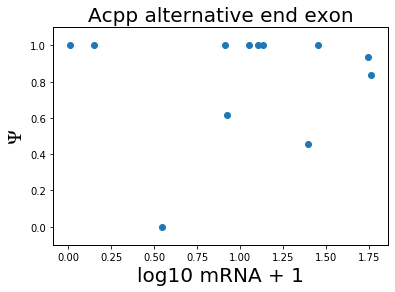

In [76]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Acpp_AE']+1), shalek_PSI.loc['Acpp_AE', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Acpp alternative end exon', fontsize = 20)
plt.ylim(-0.1, 1.1)
plt.show()

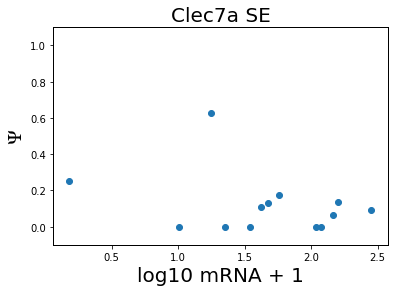

In [77]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Clec7a_other_1']+1), 
            shalek_PSI.loc['Clec7a_other_1', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Clec7a SE', fontsize = 20)
plt.ylim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()



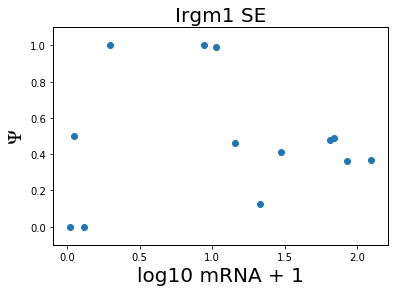

In [78]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Irgm1_1']+1), 
            shalek_PSI.loc['Irgm1_1', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Irgm1 SE', fontsize = 20)
plt.ylim(-0.1, 1.1)

plt.show()


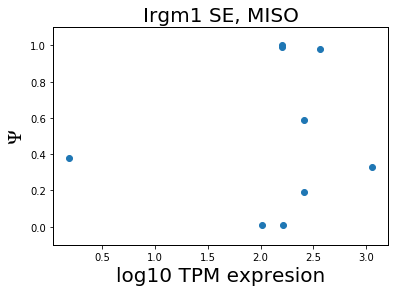

In [79]:
plt.scatter(np.log10(np.array(list(shalek_counts_paper.loc['IRGM1', shalek_cells]))+1),
            np.array(shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene=='Irgm1', shalek_cells].index[0],
                                         shalek_cells]))
plt.xlabel('log10 TPM expresion', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Irgm1 SE, MISO', fontsize = 20)
plt.ylim(-0.1, 1.1)
plt.show()

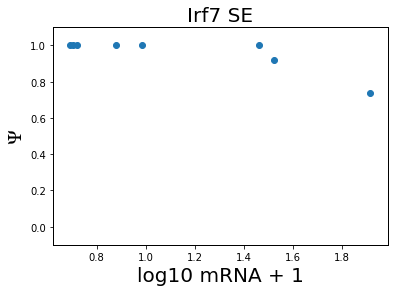

In [80]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Irf7_1']+1), 
            shalek_PSI.loc['Irf7_1', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Irf7 SE', fontsize = 20)
plt.ylim(-0.1, 1.1)

plt.show()


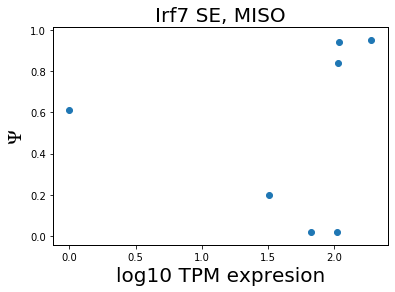

In [81]:
plt.scatter(np.log10(np.array(list(shalek_counts_paper.loc['IRF7', shalek_cells]))+1),
            np.array(shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene=='Irf7', shalek_cells].index[0],
                                         shalek_cells]))
plt.xlabel('log10 TPM expresion', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Irf7 SE, MISO', fontsize = 20)
plt.show()

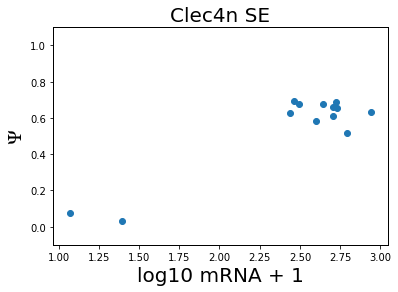

In [82]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Clec4n_2']+1), 
            shalek_PSI.loc['Clec4n_2', mrna_per_event_shalek.columns])
plt.ylim(-0.1, 1.1)
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Clec4n SE', fontsize = 20)
plt.show()


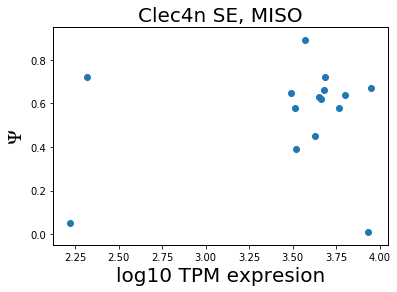

In [83]:
plt.scatter(np.log10(np.array(list(shalek_counts_paper.loc['CLEC4N', shalek_cells]))+1),
            np.array(shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene=='Clec4n', shalek_cells].index[0],
                                         shalek_cells]))
plt.xlabel('log10 TPM expresion', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Clec4n SE, MISO', fontsize = 20)
plt.show()

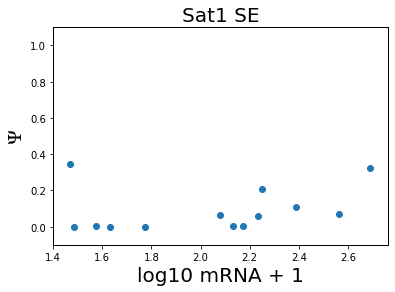

In [84]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Sat1_nmdSE_1']+1), 
            shalek_PSI.loc['Sat1_nmdSE_1', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Sat1 SE', fontsize = 20)
plt.ylim(-0.1, 1.1)

plt.show()



In [85]:
# Not in their paper

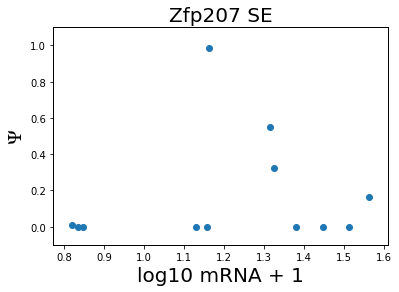

In [86]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Zfp207_2']+1), 
            shalek_PSI.loc['Zfp207_2', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Zfp207 SE', fontsize = 20)
plt.ylim(-0.1, 1.1)

plt.show()


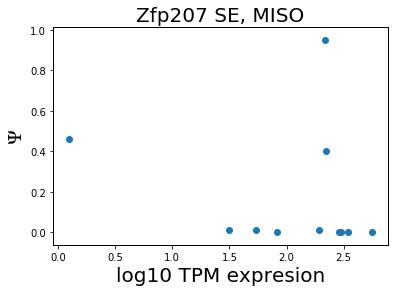

In [87]:
plt.scatter(np.log10(np.array(list(shalek_counts_paper.loc['ZFP207', shalek_cells]))+1),
            np.array(shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene=='Zfp207', shalek_cells].index[0],
                                         shalek_cells]))
plt.xlabel('log10 TPM expresion', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Zfp207 SE, MISO', fontsize = 20)
plt.show()

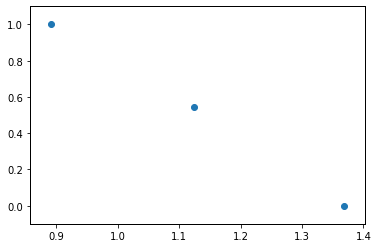

In [88]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Psmg4_1']+1), 
            shalek_PSI.loc['Psmg4_1', mrna_per_event_shalek.columns])
plt.ylim(-0.1, 1.1)

plt.show()

In [89]:
# not in their paper

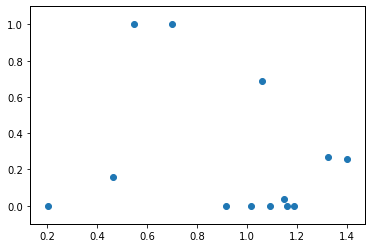

In [90]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Abi1_1']+1), 
            shalek_PSI.loc['Abi1_1', mrna_per_event_shalek.columns])
plt.ylim(-0.1, 1.1)

plt.show()

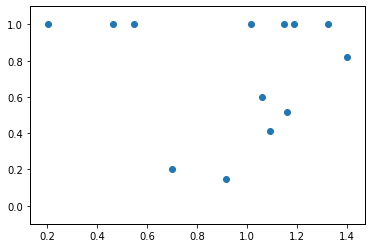

In [91]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Abi1_3']+1), 
            shalek_PSI.loc['Abi1_3', mrna_per_event_shalek.columns])
plt.ylim(-0.1, 1.1)

plt.show()

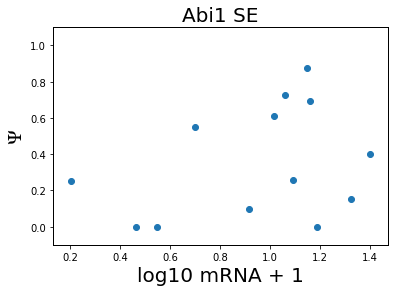

In [92]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Abi1_7']+1), 
            shalek_PSI.loc['Abi1_7', mrna_per_event_shalek.columns])

plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Abi1 SE', fontsize = 20)
plt.ylim(-0.1, 1.1)

plt.show()

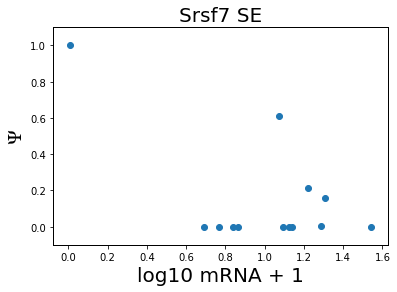

In [93]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Srsf7_nmdSE_1']+1), 
            shalek_PSI.loc['Srsf7_nmdSE_1', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Srsf7 SE', fontsize = 20)
plt.ylim(-0.1, 1.1)

plt.show()

/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/cfbuenabadn/anaconda3/lib/python3.6/_collections_abc.py:841: Matpl

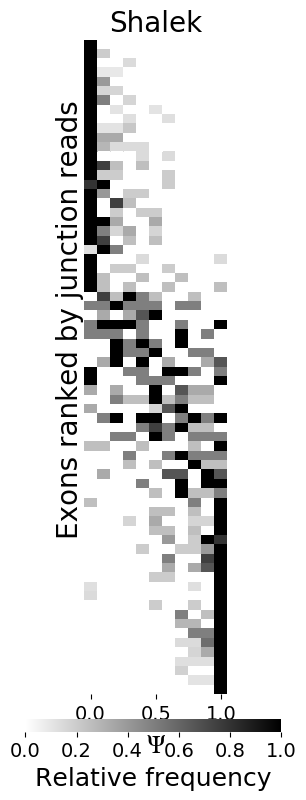

In [94]:
shalek_int_genes, shalek_int_exons = spu.get_int_events(shalek_PSI, shalek_mrna_counts, 0.05)
shalek_int_exons = [x for x in shalek_int_exons if x in mrna_per_event_shalek.index]
shalek_PSI_filtered, shalek_PSI_mrna_filtered, shalek_good_exons, mrna_filtered, reads_filtered = filter_psi(shalek_PSI, 
                                            shalek_int_exons, mrna_per_event_shalek, shalek_coverage_tab['SJ_coverage'], 
                                                                        shalek_read_counts, 10,
                                                                       cell_min=0.5)

good_cells = shalek_PSI_filtered.columns[shalek_PSI_filtered.isna().mean() <= 0.5]
shalek_PSI_good = shalek_PSI_filtered[good_cells]

shalek_hist_complete_f, shalek_hist_intermediate_f = scp.get_bins_table2(shalek_PSI_filtered, mrna_filtered, 11)


import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

hist_list = [shalek_hist_complete_f]

dset_name_list = ['Shalek']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions_filtered_shalek',
                    plot_title = "", 
                    ylab='Exons ranked by junction reads', ls=18, sk=1.65, tfs=20, nbins=11)

plt.show()

In [95]:
shalek_PSI_filtered.index

Index(['Abi1_7', 'Aldoa_2', 'Anxa4_1', 'Anxa4_2', 'Anxa6_1', 'Ap2m1_1',
       'Atp5j2_2', 'Atp5j_1', 'Capg_1', 'Cd300lf_2', 'Cd40_2', 'Cd44_1',
       'Cd68_1', 'Cd74_1', 'Ciapin1_2', 'Cish_1', 'Cldnd1_3', 'Clec4a2_1',
       'Clec4n_2', 'Clec5a_1', 'Clec7a_other_1', 'Csde1_4', 'Dab2_5',
       'Dnajc8_3', 'Dpep2_2', 'Eef1d_3', 'Eif4g2_1', 'Ergic2_3',
       'Ergic2_nmdSE_1', 'Fcgr2b_1', 'Fcgr2b_2', 'Hnrnpa1_1', 'Hnrnpa2b1_1',
       'Hnrnpa2b1_2', 'Hnrnpa2b1_3', 'Ifi35_1', 'Igf1_1', 'Il2rg_1', 'Irgm1_1',
       'Lat2_1', 'Lcp1_1', 'Ly6e_3', 'Mbnl1_10', 'Mbnl1_2', 'Mbnl1_4',
       'Mbnl1_6', 'Mbnl1_8', 'Mbnl1_9', 'Mndal_1', 'Morf4l1_3', 'Ndufa7_1',
       'Ndufv3_1', 'Prr13_1', 'Ptprc_1', 'Rsu1_1', 'Samhd1_1', 'Sat1_nmdSE_1',
       'Slamf7_1', 'Sp100_1', 'Sp100_2', 'Sp100_4', 'Srsf3_nmdSE_1',
       'Srsf7_nmdSE_1', 'Tank_other_2', 'Tarm1_1', 'Tmbim6_1', 'Tpm3_1',
       'U2surp_2', 'Vps29_1', 'Zfp207_2'],
      dtype='object')

In [96]:
shalek_paper_bin_exon = ['Acpp_AE', 'Clec7a_other_1', 'Irgm1_1', 'Irf7_1', 'Clec4n_2', 'Sat1_nmdSE_1', 'Zfp207', 
                         'Abi1_7', 'Srsf7_nmdSE_1', 'Psmg4_1']

In [97]:
for event in [x for x in shalek_paper_bin_exon if x in shalek_PSI_filtered.index]:
    print(event)
    print(shalek_PSI.loc[event, mrna_per_event_shalek.columns].quantile(0.25))
    print(shalek_PSI.loc[event, mrna_per_event_shalek.columns].quantile(0.75))

Clec7a_other_1
0.0
0.13411938098747234
Irgm1_1
0.3618864292589028
0.5
Clec4n_2
0.5853566009104704
0.6755955139493929
Sat1_nmdSE_1
0.0014144271570014145
0.11048371917937136
Abi1_7
0.0995260663507109
0.6094674556213018
Srsf7_nmdSE_1
0.0
0.1562189054726368


In [98]:
shalek_PSI.loc['Abi1_7', mrna_per_event_shalek.columns].quantile(0.75)

0.6094674556213018

In [99]:
for event in shalek_PSI_filtered.index:
    q25 = shalek_PSI.loc[event, mrna_per_event_shalek.columns].quantile(0.25)
    q75 = shalek_PSI.loc[event, mrna_per_event_shalek.columns].quantile(0.75)
    
    if (q25 <= 0.25) and (q75 >= 0.75):
        print(event)
        print(q25)
        print(q75)

Slamf7_1
0.18222222222222226
0.7975543478260869


In [100]:
shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene=='Clec4n', shalek_cells].index[0],
                                         shalek_cells].quantile(0.25)


0.515

In [101]:
len(shalek_PSI_paper.loc[shalek_PSI_paper.gene=='Clec4n', shalek_cells].index)

1

In [102]:
for event in shalek_paper_bin_exon:
    gen = event.split('_')[0]
    if len(shalek_PSI_paper.loc[shalek_PSI_paper.gene==gen, shalek_cells].index) >= 1:
        print(event)
        print(shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene==gen, shalek_cells].index[0],
                                         shalek_cells].quantile(0.25))
        print(shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene==gen, shalek_cells].index[0],
                                         shalek_cells].quantile(0.75))

Irgm1_1
0.19
0.98
Irf7_1
0.11
0.8899999999999999
Clec4n_2
0.515
0.665
Zfp207
0.0
0.20500000000000002
Abi1_7
0.395
0.9


In [103]:
# Add: PCA on gene expression ofonly cells of certain type or cluster. See if it separates PSI.

In [360]:
[x for x in chen_PSI.index if 'Rbm4' in x]

['Rbm41_1',
 'Rbm41_3',
 'Rbm42_1',
 'Rbm43_1',
 'Rbm44_1',
 'Rbm47_2',
 'Rbm47_5',
 'Rbm48_1',
 'Rbm4_1']

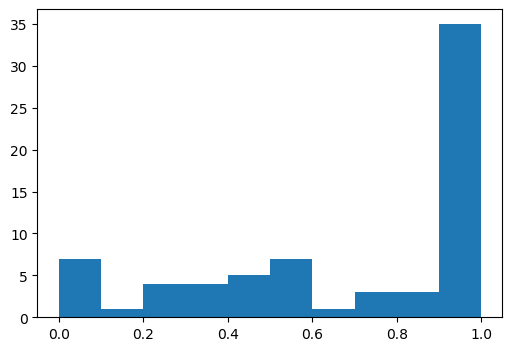

In [364]:
figsize(6, 4)
plt.hist(chen_PSI.loc['Rbm4_1', chen_MN].dropna())
plt.show()

In [366]:
figsize(6, 4)
plt.hist(chen_MN_filtered[0].loc['Rbm4_1', chen_MN].dropna())
plt.show()

KeyError: 'the label [Rbm4_1] is not in the [index]'

In [372]:
figsize(6, 4)
plt.hist(chen_clust_filter[4][0].loc['Rbm4_1'].dropna())
plt.show()

KeyError: 'the label [Rbm4_1] is not in the [index]'

In [376]:
mrna_per_event_chen.loc['Rbm4_1', chen_clust_filter[4][0].columns]

SRR2727441    22.096270
SRR2727458     6.106821
SRR2727472    10.517805
SRR2727440    13.595332
SRR2727424    17.950707
SRR2727438    10.129990
SRR2727484    16.256450
SRR2727439     3.682498
SRR2727420    13.532310
SRR2727467     9.419458
SRR2727418     6.086651
SRR2727446     6.053272
SRR2727448    14.094590
SRR2727423    11.548057
SRR2727437     8.139969
SRR2727465     4.761730
SRR2727452     9.994888
SRR2727431    10.787675
SRR2727429     7.293528
SRR2727466     1.187264
SRR2727421    11.675559
SRR2727434    10.568609
Name: Rbm4_1, dtype: float64

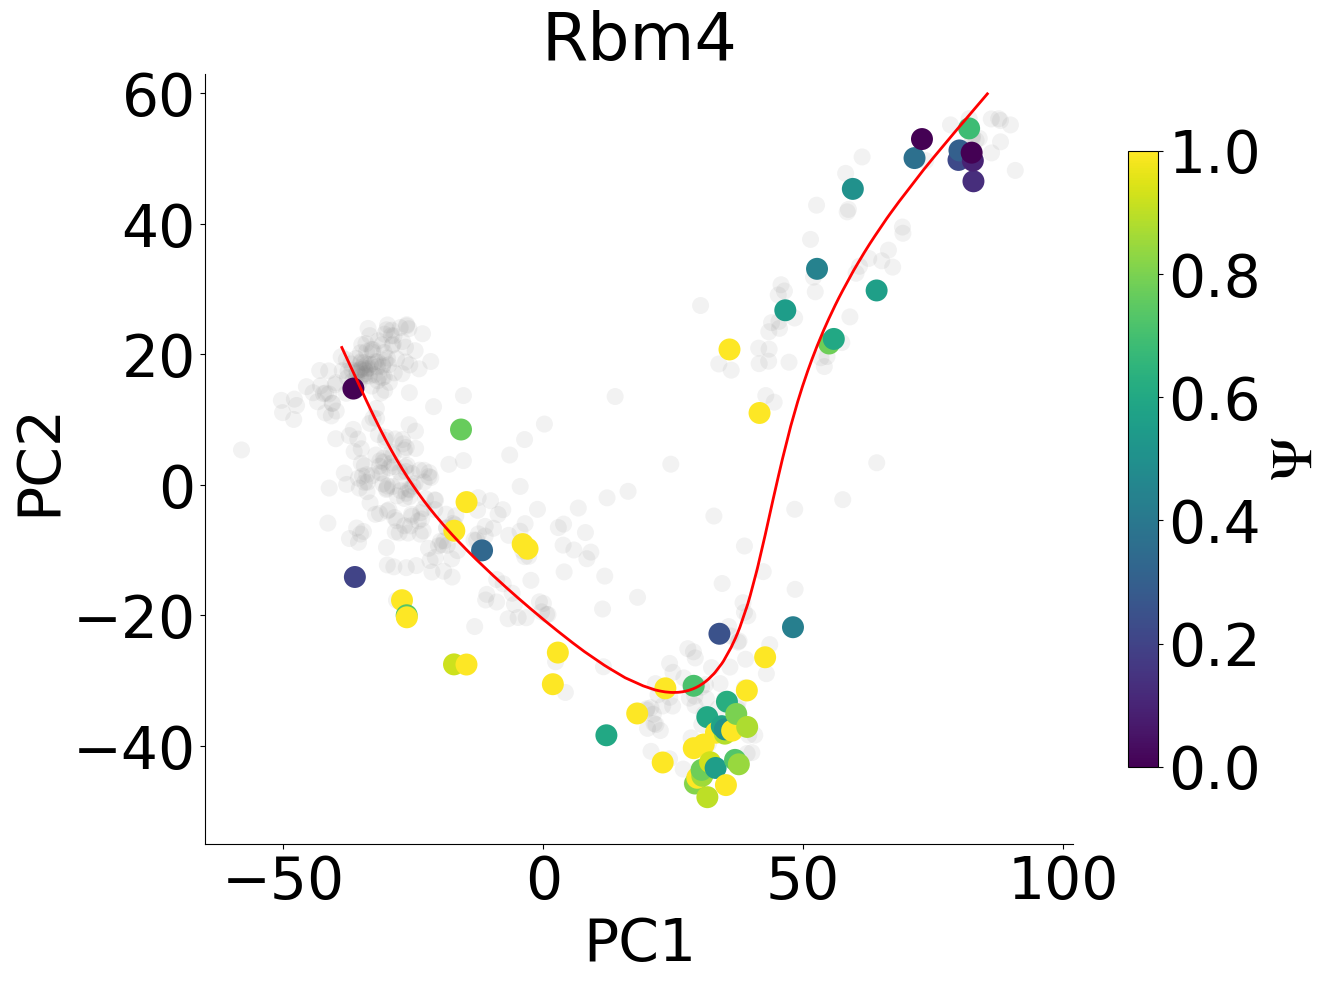

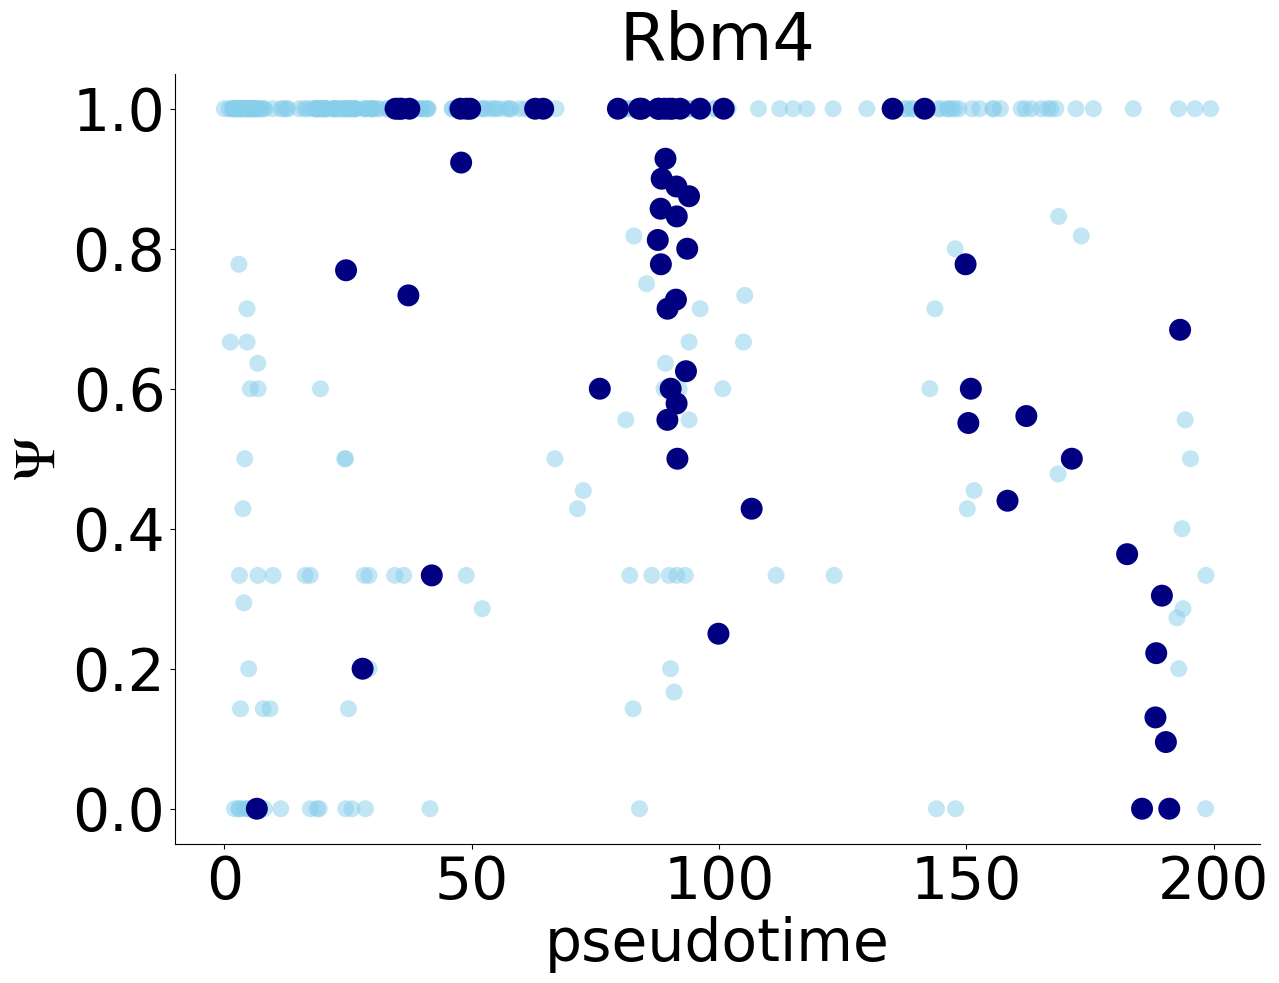

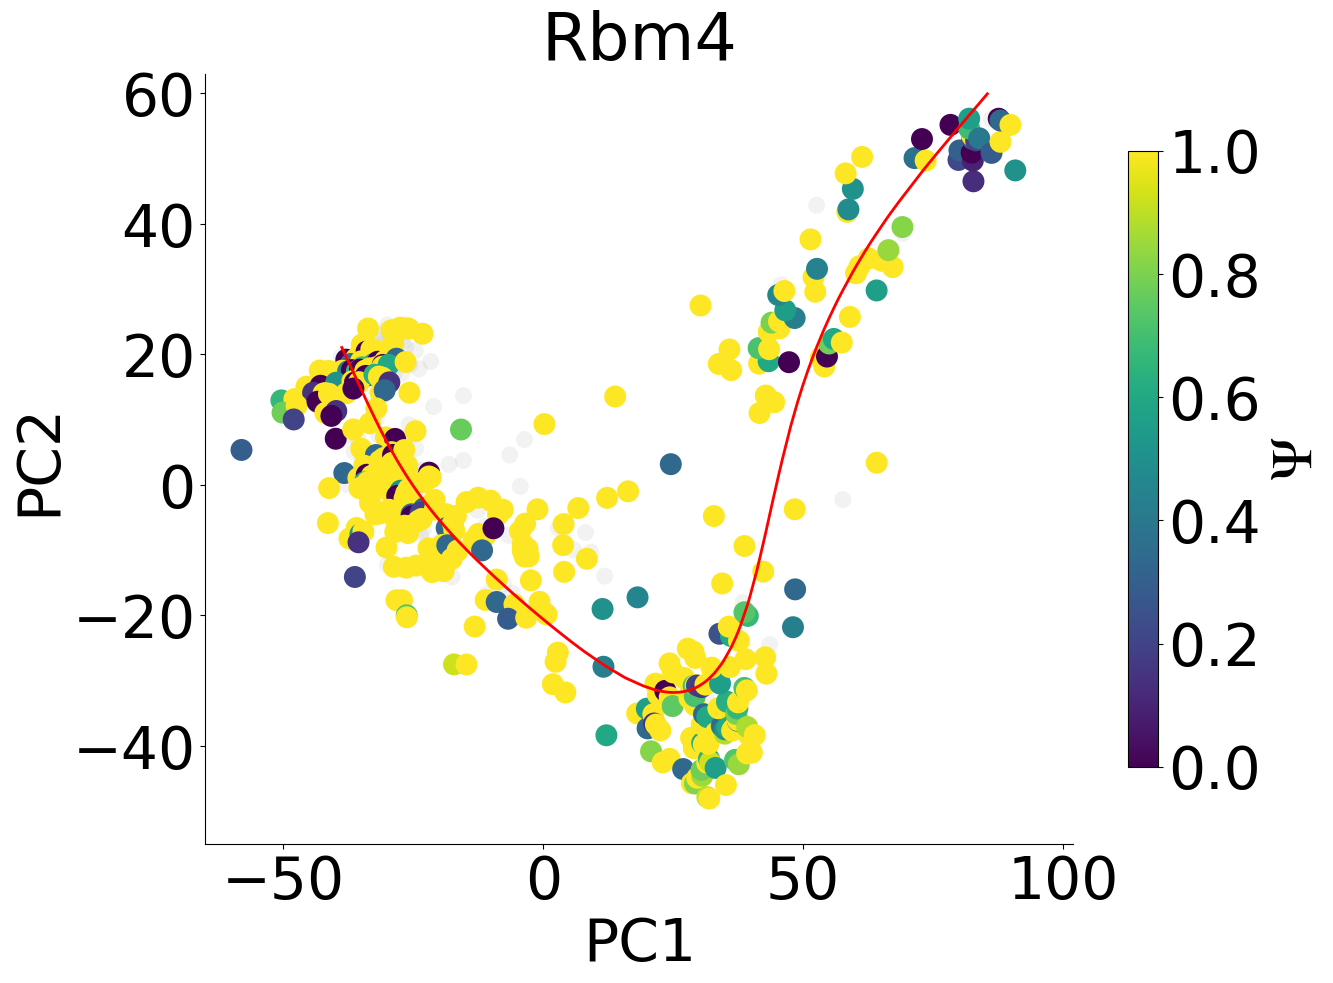

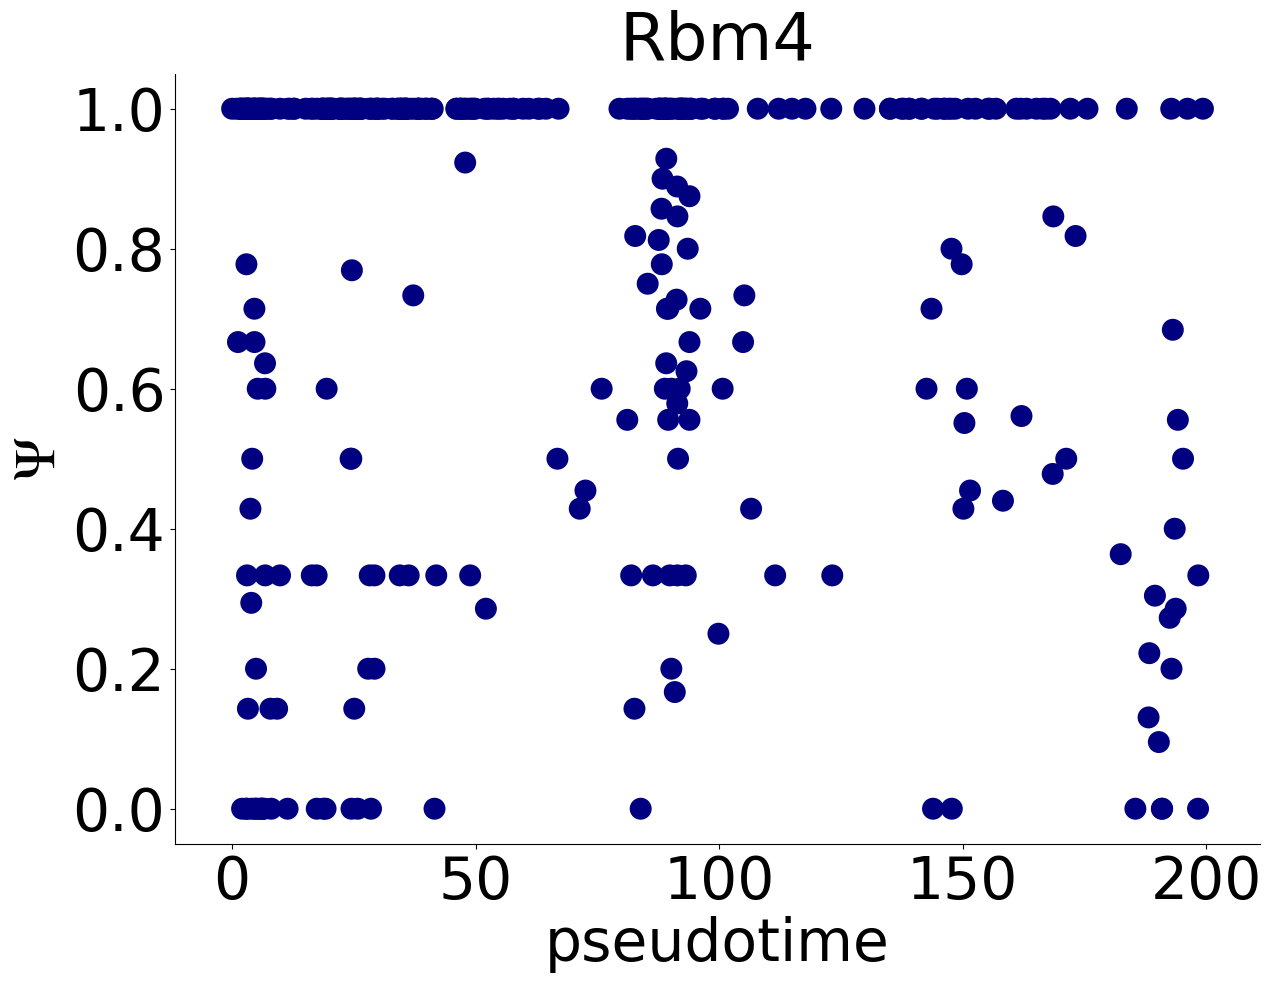

In [377]:
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
             'Rbm4_1', 10, plot_dir='plots_review/figure3/events/')
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
             'Rbm4_1', 10, plot_dir='plots_review/figure3/events/', filter_cells=False)



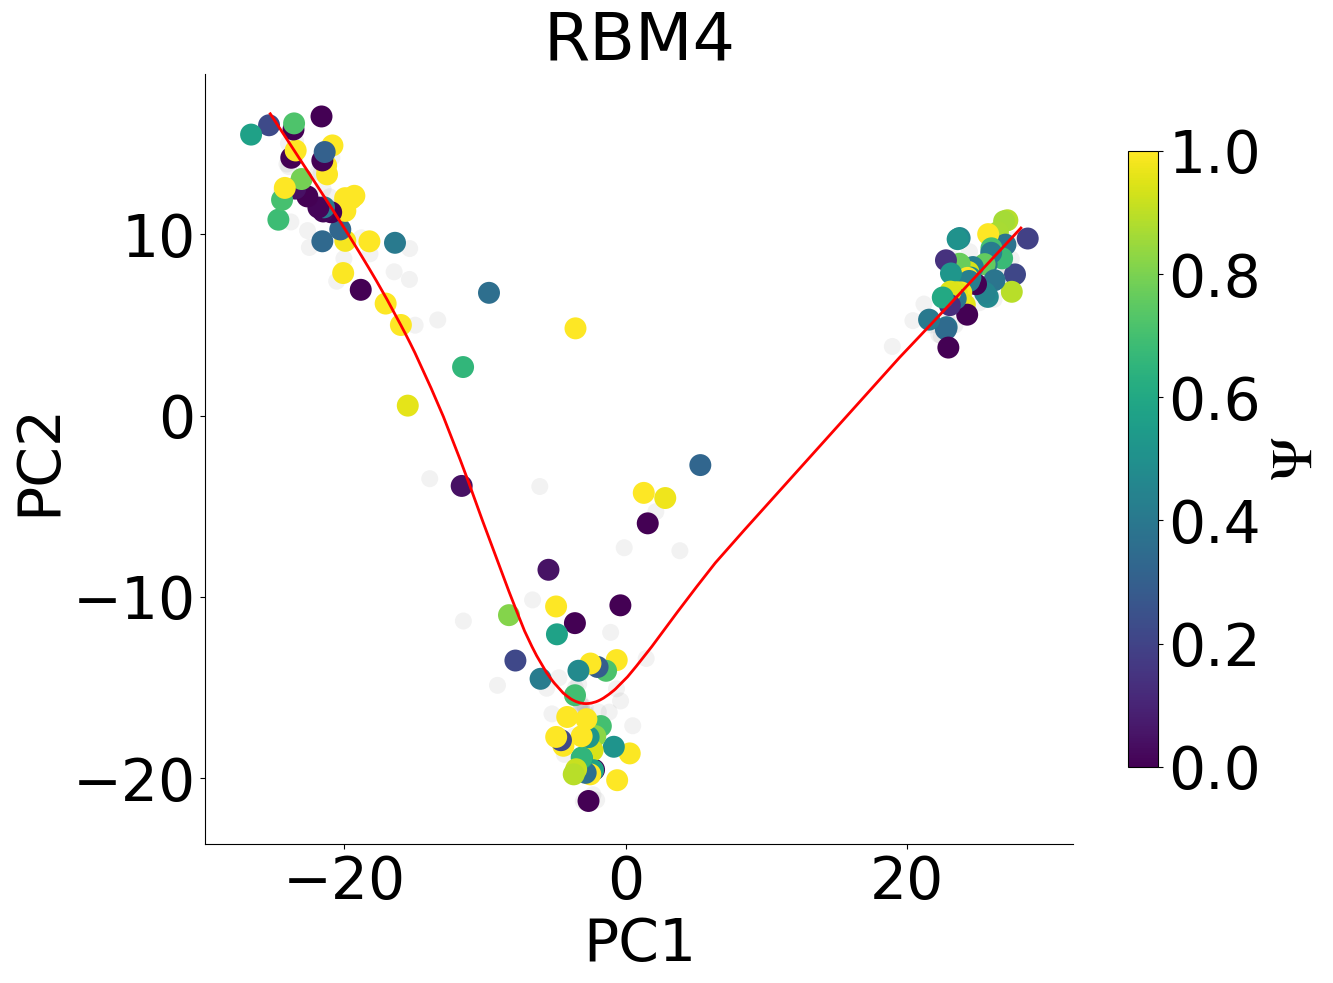

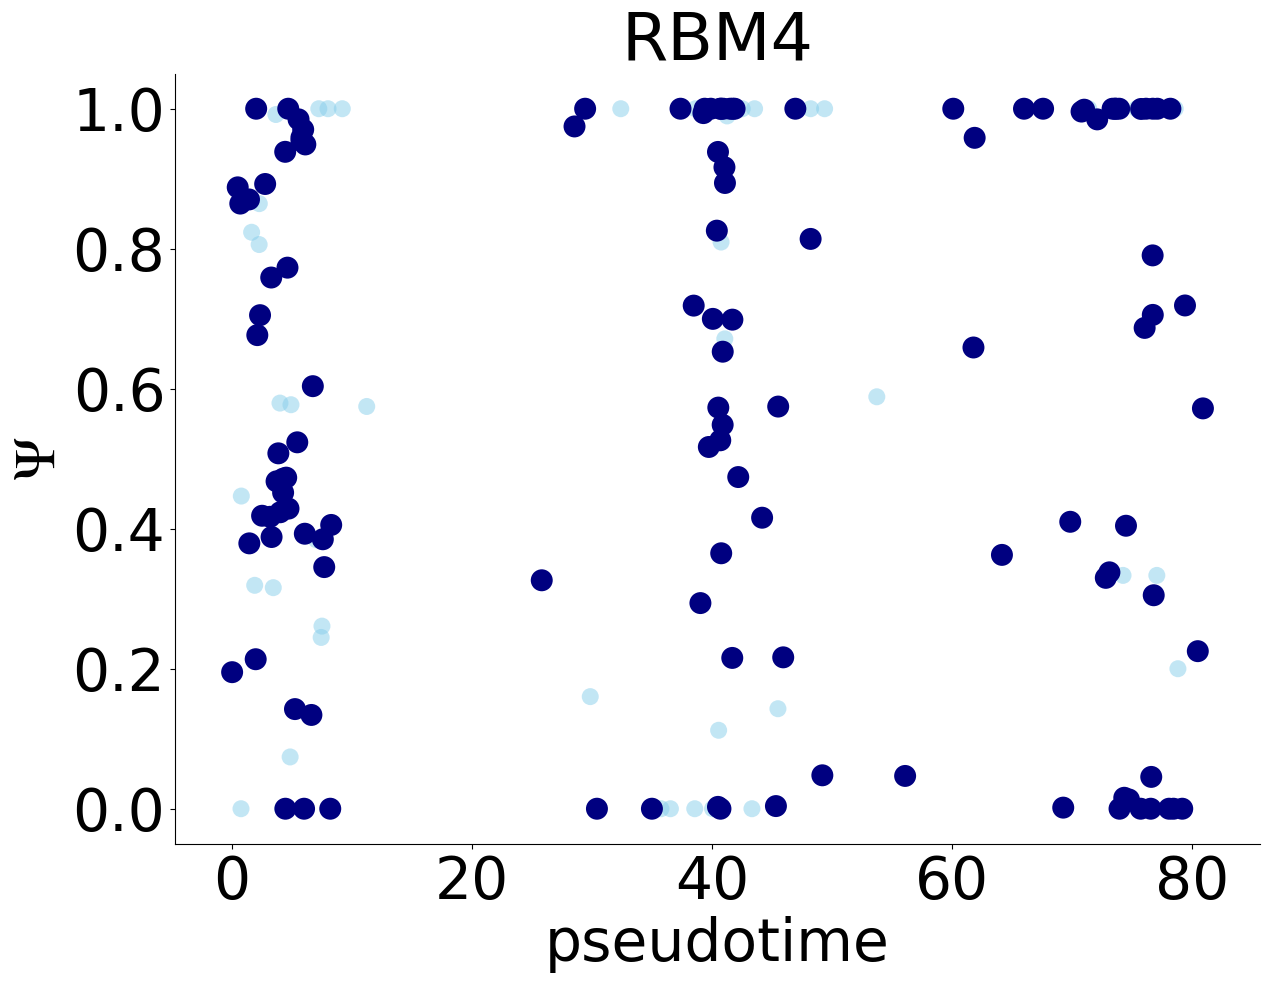

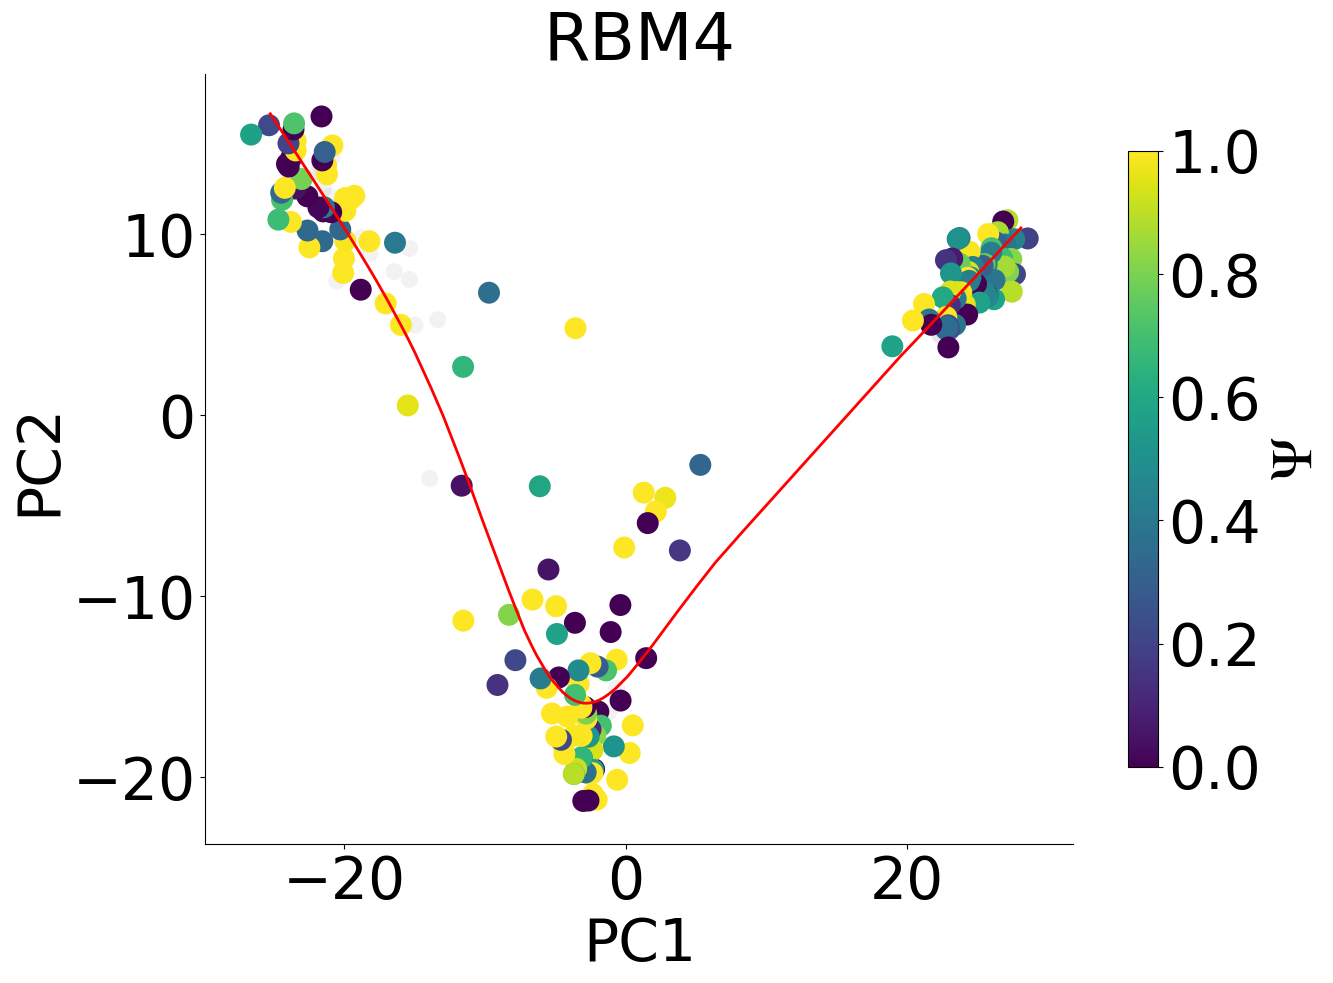

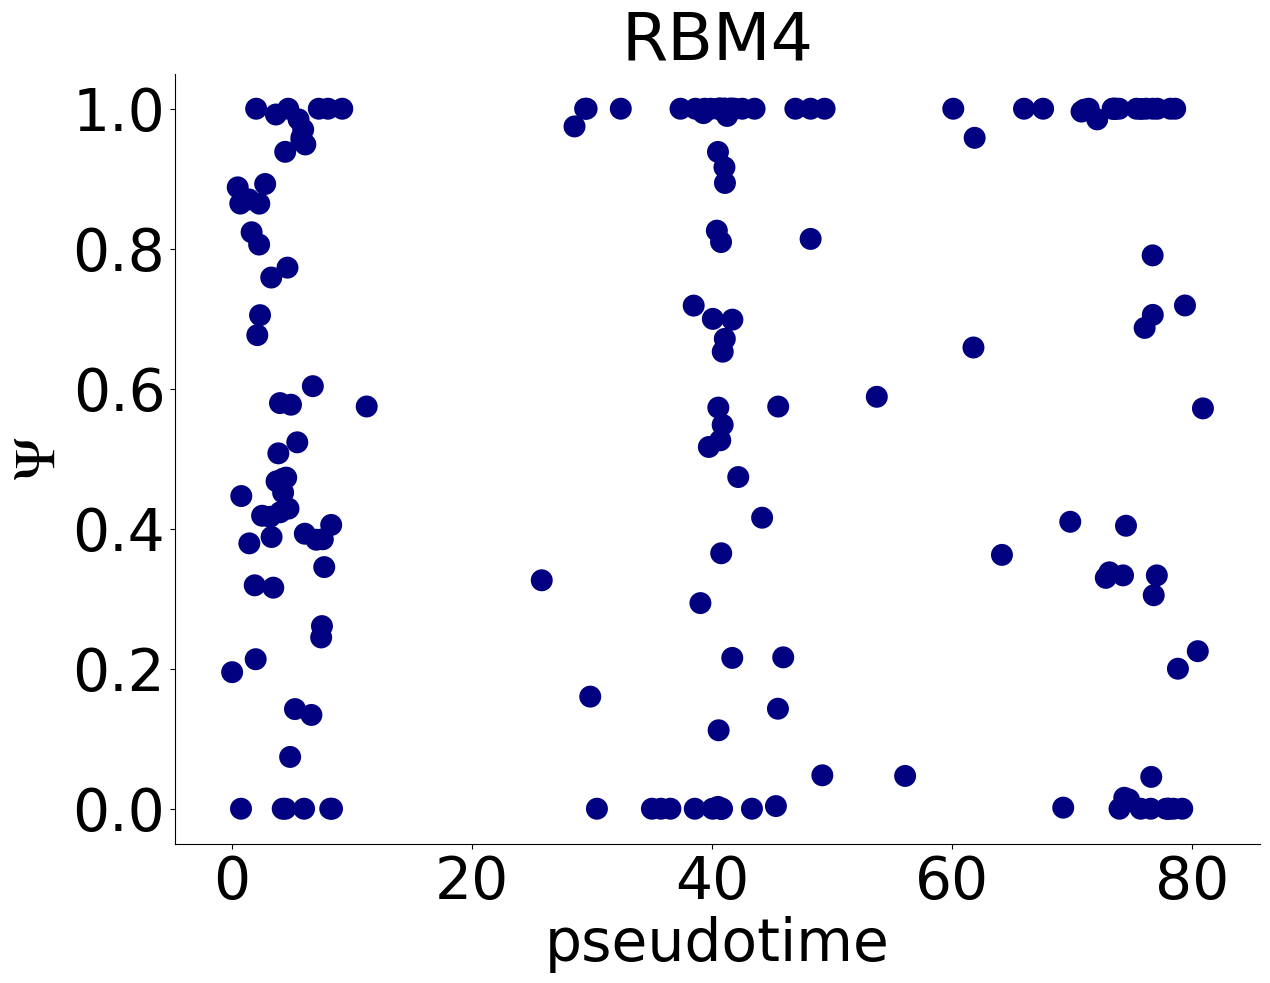

In [380]:
plot_pca(song_pca, song_PSI, mrna_per_event_song, song_read_counts, song_coverage_tab['SJ_coverage'], 
             'RBM4_2', 10, plot_dir='plots_review/figure3/events/')
plot_pca(song_pca, song_PSI, mrna_per_event_song, song_read_counts, song_coverage_tab['SJ_coverage'], 
             'RBM4_2', 10, plot_dir='plots_review/figure3/events/', filter_cells=False)



In [379]:
def plot_pca(pca_tab, psi_tab, mrna_tab, reads_tab, cj, event, mrna_min, plot_dir, cmap='viridis', filter_cells=True):
    
    #pass_cells = psi_tab.columns[(mrna_tab.loc[event] > mrna_min) & (rpm_tab.loc[event] >= rpm_tab.mean(axis=1).quantile(0.1))]
    
    
    if filter_cells:
        read_min = mrna_min*cj*(1+psi_tab.loc[event])

        pass_cells = psi_tab.columns[(mrna_tab.loc[event] > mrna_min) & (reads_tab.loc[event] >= read_min)]
        
    else:
        pass_cells = psi_tab.columns[(mrna_tab.loc[event] > -1) & (reads_tab.loc[event] >= -1)]


    figsize(14,10)
    fig = plt.figure()
    ax  = plt.subplot(1,1,1)
    ax.scatter(pca_tab.PC1, pca_tab.PC2, c='gray', s=150, edgecolors='none', alpha=0.1)
    sc = ax.scatter(pca_tab.loc[pass_cells, 'PC1'], pca_tab.loc[pass_cells, 'PC2'], 
                c=psi_tab.loc[event, pass_cells], s=250, edgecolors='none', vmin=0, vmax=1, cmap=cmap)
    
    ax.plot(pca_tab.line_1, -pca_tab.line_2, c='red',linewidth=2)

    #plt.plot(chen_pca.line_1, -chen_pca.line_2, c='red',linewidth=3, label='lineage')
    
#     ax.set_xlim([-65, 102])
#     ax.set_ylim([-55, 63])
    
    cb = plt.colorbar(sc, shrink = 0.8)
    cb.set_label(label='$\Psi$',size=42)
    cb.ax.tick_params(labelsize=42)
    
    #plt.legend(frameon=False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    
    ax.tick_params(labelsize=42)

    plt.ylabel('PC2', fontsize=42)
    plt.xlabel('PC1', fontsize=42)
    plt.title(event.split('_')[0], fontsize=48)
    
    if filter_cells:

        plt.savefig(plot_dir+event+'.pca.svg', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pca.pdf', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pca.png', dpi=300, bbox_inches='tight')
        
    else:
        
        plt.savefig(plot_dir+event+'.pca.no_filter.svg', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pca.no_filter.pdf', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pca.no_filter.png', dpi=300, bbox_inches='tight')

        
    
    
    #plt.show()
    
    figsize(14,10)
    fig = plt.figure()
    ax  = plt.subplot(1,1,1)
    ax.scatter(pca_tab.pseudotime, psi_tab.loc[event], c='skyblue', s=150, edgecolors='none', alpha=0.5)
    ax.scatter(pca_tab.loc[pass_cells, 'pseudotime'], psi_tab.loc[event, pass_cells], 
                c='navy', s=250, edgecolors='none')
    
    ax.set_ylim((-0.05,1.05))
    
    #plt.plot(chen_pca.line_1, -chen_pca.line_2, c='red',linewidth=3, label='lineage')
    #plt.legend(frameon=False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    ax.tick_params(labelsize=42)

    plt.ylabel('$\Psi$', fontsize=42)
    plt.xlabel('pseudotime', fontsize=42)
    plt.title(event.split('_')[0], fontsize=48)

    if filter_cells:
    
        plt.savefig(plot_dir+event+'.pseudotime.svg', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pseudotime.pdf', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pseudotime.png', dpi=300, bbox_inches='tight')
        
    else:
        plt.savefig(plot_dir+event+'.pseudotime.no_filter.svg', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pseudotime.no_filter.pdf', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pseudotime.no_filter.png', dpi=300, bbox_inches='tight')
    
    plt.show()
    


In [382]:
# Check bam alignments for RBM4
# Regression for bursts kinetics and bimodalty
# COntrol by expression, see of there are differences high freq low size, viceversa